Final CNN3 model for Amgen Inc.

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import initializers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Flatten, Input, BatchNormalization, Conv2D, MaxPooling2D
from keras.layers.core import Activation, Dropout, Dense

Importing the dataset for day one

In [2]:
df1 = pd.read_csv("AMGN_NN_60sec_ret.csv", low_memory=False, delimiter=",")

In [3]:
df1["datetime"] = df1["TDay"] + " " + df1["IntraT"]
df1.set_index(pd.DatetimeIndex(df1['datetime']), inplace=True)

df1 = df1.drop(columns = {'Spread_Q', 'ret.Spread_Q', 'lag.Spread_Q'})
df1.rename(columns={"ret.MidQ": "retMidQ"}, inplace=True)

df1["MidQsq"] = df1.apply(lambda row: row.MidQ ** 2, axis=1)
df1["ret.MidQsq"] = df1.apply(lambda row: row.retMidQ ** 2, axis=1)
df1["MidQsqsq"] = df1.apply(lambda row: row.MidQ ** 3, axis=1)
df1['ret.MidQsqsq'] = df1.apply(lambda row: row.retMidQ ** 3, axis=1)
df1['MidQsqsqsq'] = df1.apply(lambda row: row.MidQ ** 4, axis=1)
df1['ret.MidQsqsqsq'] = df1.apply(lambda row: row.retMidQ ** 4, axis=1)

df1 = df1.drop(columns = {'TDay', 'IntraT', 'datetime'})
df1.rename(columns={"retMidQ": "ret.MidQ"}, inplace=True)

df1.head()

MidQ  lag.MidQ  ret.MidQ        MidQsq    ret.MidQsq  \
datetime                                                                       
2017-01-03 09:33:00  147.250    147.25  0.000000  21682.562500  0.000000e+00   
2017-01-03 09:34:00  147.450    147.25  0.001357  21741.502500  1.842298e-06   
2017-01-03 09:35:00  147.320    147.45 -0.000882  21703.182400  7.780011e-07   
2017-01-03 09:36:00  147.760    147.32  0.002982  21833.017600  8.893781e-06   
2017-01-03 09:37:00  147.805    147.76  0.000305  21846.318025  9.272119e-08   

                         MidQsqsq  ret.MidQsqsq    MidQsqsqsq  ret.MidQsqsqsq  
datetime                                                                       
2017-01-03 09:33:00  3.192757e+06  0.000000e+00  4.701335e+08    0.000000e+00  
2017-01-03 09:34:00  3.205785e+06  2.500574e-09  4.726929e+08    3.394061e-12  
2017-01-03 09:35:00  3.197313e+06 -6.862309e-10  4.710281e+08    6.052857e-13  
2017-01-03 09:36:00  3.226047e+06  2.652343e-08  4.766807e+08    7.909934e-11  
2017-01-03 09:37:00  3.228995e+06  2.823375e-11  4.772616e+08    8.597220e-15

Creating the input X for day one

In [4]:
sc1 = MinMaxScaler(feature_range=(0,255))
df1['X1sc1d'] = sc1.fit_transform(df1['MidQ'].values.reshape(-1,1))
df1['X2sc1d'] = sc1.fit_transform(df1['ret.MidQ'].values.reshape(-1,1))
df1['X3sc1d'] = sc1.fit_transform(df1['lag.MidQ'].values.reshape(-1,1))
df1['X4sc1d'] = sc1.fit_transform(df1['MidQsq'].values.reshape(-1,1))
df1['X5sc1d'] = sc1.fit_transform(df1['ret.MidQsq'].values.reshape(-1,1))
df1['X6sc1d'] = sc1.fit_transform(df1['MidQsqsq'].values.reshape(-1,1))
df1['X7sc1d'] = sc1.fit_transform(df1['ret.MidQsqsq'].values.reshape(-1,1))
df1['X8sc1d'] = sc1.fit_transform(df1['MidQsqsqsq'].values.reshape(-1,1))
df1['X9sc1d'] = sc1.fit_transform(df1['ret.MidQsqsqsq'].values.reshape(-1,1))

X1 = df1.groupby(df1.index.date)['X1sc1d'].apply(np.array).reset_index()
X1 = X1.rename(columns={"index": "datetime"})

X2 = df1.groupby(df1.index.date)['X2sc1d'].apply(np.array).reset_index()
X2 = X2.rename(columns={"index": "datetime"})

X3 = df1.groupby(df1.index.date)['X3sc1d'].apply(np.array).reset_index()
X3 = X3.rename(columns={"index": "datetime"})

X4 = df1.groupby(df1.index.date)['X4sc1d'].apply(np.array).reset_index()
X4 = X4.rename(columns={"index": "datetime"})

X5 = df1.groupby(df1.index.date)['X5sc1d'].apply(np.array).reset_index()
X5 = X5.rename(columns={"index": "datetime"})

X6 = df1.groupby(df1.index.date)['X6sc1d'].apply(np.array).reset_index()
X6 = X6.rename(columns={"index": "datetime"})

X7 = df1.groupby(df1.index.date)['X7sc1d'].apply(np.array).reset_index()
X7 = X7.rename(columns={"index": "datetime"})

X8 = df1.groupby(df1.index.date)['X8sc1d'].apply(np.array).reset_index()
X8 = X8.rename(columns={"index": "datetime"})

X9 = df1.groupby(df1.index.date)['X9sc1d'].apply(np.array).reset_index()
X9 = X9.rename(columns={"index": "datetime"})

df1.head()

MidQ  lag.MidQ  ret.MidQ        MidQsq    ret.MidQsq  \
datetime                                                                       
2017-01-03 09:33:00  147.250    147.25  0.000000  21682.562500  0.000000e+00   
2017-01-03 09:34:00  147.450    147.25  0.001357  21741.502500  1.842298e-06   
2017-01-03 09:35:00  147.320    147.45 -0.000882  21703.182400  7.780011e-07   
2017-01-03 09:36:00  147.760    147.32  0.002982  21833.017600  8.893781e-06   
2017-01-03 09:37:00  147.805    147.76  0.000305  21846.318025  9.272119e-08   

                         MidQsqsq  ret.MidQsqsq    MidQsqsqsq  ret.MidQsqsqsq  \
datetime                                                                        
2017-01-03 09:33:00  3.192757e+06  0.000000e+00  4.701335e+08    0.000000e+00   
2017-01-03 09:34:00  3.205785e+06  2.500574e-09  4.726929e+08    3.394061e-12   
2017-01-03 09:35:00  3.197313e+06 -6.862309e-10  4.710281e+08    6.052857e-13   
2017-01-03 09:36:00  3.226047e+06  2.652343e-08  4.766807e+08    7.909934e-11   
2017-01-03 09:37:00  3.228995e+06  2.823375e-11  4.772616e+08    8.597220e-15   

                        X1sc1d      X2sc1d     X3sc1d     X4sc1d    X5sc1d  \
datetime                                                                     
2017-01-03 09:33:00  14.153168  129.629868  14.153168  12.461971  0.000000   
2017-01-03 09:34:00  15.368032  131.958264  14.153168  13.540931  0.082270   
2017-01-03 09:35:00  14.578371  128.116771  15.368032  12.839440  0.034743   
2017-01-03 09:36:00  17.251072  134.745744  14.578371  15.216213  0.397164   
2017-01-03 09:37:00  17.524416  130.152224  17.251072  15.459691  0.004141   

                        X6sc1d      X7sc1d     X8sc1d        X9sc1d  
datetime                                                             
2017-01-03 09:33:00  10.914857  133.884854   9.510082  0.000000e+00  
2017-01-03 09:34:00  11.868031  133.885630  10.347735  2.654280e-05  
2017-01-03 09:35:00  11.248174  133.884641   9.802872  4.733555e-06  
2017-01-03 09:36:00  13.350569  133.893084  11.652852  6.185857e-04  
2017-01-03 09:37:00  13.566293  133.884863  11.842988  6.723339e-08

In [5]:
df_avgc1 = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(X1, X2, on="datetime"),
                                                                                  X3, on="datetime"),
                                                                        X4, on="datetime"),
                                                               X5, on="datetime"),
                                                      X6, on="datetime"),
                                             X7, on="datetime"),
                                    X8, on="datetime"),
                            X9, on="datetime")

df_avgc1 = df_avgc1.drop(columns = {'datetime'})

df_avgc1.head()

X1sc1d  \
0  [14.153168175321412, 15.368032396378908, 14.57...   
1  [42.79359218675529, 42.64173415912319, 42.8847...   
2  [44.585516912815365, 43.18842305859914, 43.947...   
3  [94.75940924249596, 95.67055740828982, 92.0867...   
4  [81.12255836112422, 80.90995712243921, 86.7109...   

                                              X2sc1d  \
0  [129.62986831631196, 131.95826359098706, 128.1...   
1  [130.13792250490764, 129.3476345657781, 130.08...   
2  [126.36567628109518, 127.036602583972, 131.039...   
3  [129.25587112766834, 131.23213963232587, 123.3...   
4  [121.1966930108035, 129.25048298747458, 139.95...   

                                              X3sc1d  \
0  [14.153168175321412, 14.153168175321412, 15.36...   
1  [42.52024773701771, 42.79359218675529, 42.6417...   
2  [46.347070033349155, 44.585516912815365, 43.18...   
3  [94.97201048118143, 94.75940924249596, 95.6705...   
4  [85.86052882324907, 81.12255836112422, 80.9099...   

                                              X4sc1d  \
0  [12.461970784713515, 13.540930720659674, 12.83...   
1  [38.28815507312646, 38.14907239611023, 38.3716...   
2  [39.931058755199956, 38.64987712389552, 39.345...   
3  [87.22594767954905, 88.1079068121249, 84.64361...   
4  [74.12438696371845, 73.921591830627, 79.471085...   

                                              X5sc1d  \
0  [0.0, 0.08227036786198944, 0.0347427174418756,...   
1  [0.003916968627549311, 0.001208781806540488, 0...   
2  [0.16168935263196194, 0.10205259753925099, 0.0...   
3  [0.0021225928448854207, 0.03895849188979431, 0...   
4  [1.0792256966348721, 0.002184193374467674, 1.6...   

                                              X6sc1d  \
0  [10.914857415173714, 11.868031074068256, 11.24...   
1  [34.08165815192544, 33.95495208844804, 34.1577...   
2  [35.57994045418306, 34.411289071765026, 35.045...   
3  [79.9347422863352, 80.78391693344949, 77.45297...   
4  [67.41405338162988, 67.22163864209526, 72.5023...   

                                              X7sc1d  \
0  [133.88485417399997, 133.88563003931648, 133.8...   
1  [133.88486223420927, 133.88485279220677, 133.8...   
2  [133.88271649095532, 133.88378226658756, 133.8...   
3  [133.88485095870203, 133.88510700154302, 133.8...   
4  [133.8479912657416, 133.88485081772288, 133.95...   

                                              X8sc1d  \
0  [9.510081672674886, 10.347735250919811, 9.8028...   
1  [30.184507306467793, 30.06967941437199, 30.253...   
2  [31.543762397954623, 30.48332516078139, 31.059...   
3  [72.93358734312898, 73.74692568265456, 70.5609...   
4  [61.0303188198759, 60.84870671827127, 65.84750...   

                                              X9sc1d  
0  [0.0, 2.6542797757439465e-05, 4.73355456959218...  
1  [6.016722834982563e-08, 5.730013552248179e-09,...  
2  [0.00010252332060605073, 4.084208888042486e-05...  
3  [1.766823680454425e-08, 5.952016040498704e-06,...  
4  [0.004567561193243236, 1.8708630184582293e-08,...

Importing the dataset for day two

In [6]:
df2 = pd.read_csv("AMGN_NN_60sec_ret.csv", low_memory=False, delimiter=",")

df2 = df2.drop(df2.index[0:393])

In [7]:
df2["datetime"] = df2["TDay"] + " " + df2["IntraT"]
df2.set_index(pd.DatetimeIndex(df2['datetime']), inplace=True)

df2 = df2.drop(columns = {'Spread_Q', 'ret.Spread_Q', 'lag.Spread_Q'})
df2.rename(columns={"ret.MidQ": "retMidQ"}, inplace=True)

df2["MidQsq"] = df2.apply(lambda row: row.MidQ ** 2, axis=1)
df2["ret.MidQsq"] = df2.apply(lambda row: row.retMidQ ** 2, axis=1)
df2["MidQsqsq"] = df2.apply(lambda row: row.MidQ ** 3, axis=1)
df2['ret.MidQsqsq'] = df2.apply(lambda row: row.retMidQ ** 3, axis=1)
df2['MidQsqsqsq'] = df2.apply(lambda row: row.MidQ ** 4, axis=1)
df2['ret.MidQsqsqsq'] = df2.apply(lambda row: row.retMidQ ** 4, axis=1)

df2 = df2.drop(columns = {'TDay', 'IntraT', 'datetime'})
df2.rename(columns={"retMidQ": "ret.MidQ"}, inplace=True)

df2.head()

MidQ  lag.MidQ  ret.MidQ        MidQsq    ret.MidQsq  \
datetime                                                                       
2017-01-04 09:33:00  151.965   151.920  0.000296  23093.361225  8.771351e-08   
2017-01-04 09:34:00  151.940   151.965 -0.000165  23085.763600  2.706851e-08   
2017-01-04 09:35:00  151.980   151.940  0.000263  23097.920400  6.928854e-08   
2017-01-04 09:36:00  152.195   151.980  0.001414  23163.318025  1.998435e-06   
2017-01-04 09:37:00  152.145   152.195 -0.000329  23148.101025  1.079647e-07   

                         MidQsqsq  ret.MidQsqsq    MidQsqsqsq  ret.MidQsqsqsq  
datetime                                                                       
2017-01-04 09:33:00  3.509383e+06  2.597764e-11  5.333033e+08    7.693660e-15  
2017-01-04 09:34:00  3.507651e+06 -4.453449e-12  5.329525e+08    7.327041e-16  
2017-01-04 09:35:00  3.510422e+06  1.823863e-11  5.335139e+08    4.800902e-15  
2017-01-04 09:36:00  3.525341e+06  2.825108e-09  5.365393e+08    3.993742e-12  
2017-01-04 09:37:00  3.521868e+06 -3.547504e-11  5.358346e+08    1.165638e-14

In [8]:
df2['X1sc2d'] = sc1.fit_transform(df2['MidQ'].values.reshape(-1,1))
df2['X2sc2d'] = sc1.fit_transform(df2['ret.MidQ'].values.reshape(-1,1))
df2['X3sc2d'] = sc1.fit_transform(df2['lag.MidQ'].values.reshape(-1,1))
df2['X4sc2d'] = sc1.fit_transform(df2['MidQsq'].values.reshape(-1,1))
df2['X5sc2d'] = sc1.fit_transform(df2['ret.MidQsq'].values.reshape(-1,1))
df2['X6sc2d'] = sc1.fit_transform(df2['MidQsqsq'].values.reshape(-1,1))
df2['X7sc2d'] = sc1.fit_transform(df2['ret.MidQsqsq'].values.reshape(-1,1))
df2['X8sc2d'] = sc1.fit_transform(df2['MidQsqsqsq'].values.reshape(-1,1))
df2['X9sc2d'] = sc1.fit_transform(df2['ret.MidQsqsqsq'].values.reshape(-1,1))

X1 = df2.groupby(df2.index.date)['X1sc2d'].apply(np.array).reset_index()
X1 = X1.rename(columns={"index": "datetime"})

X2 = df2.groupby(df2.index.date)['X2sc2d'].apply(np.array).reset_index()
X2 = X2.rename(columns={"index": "datetime"})

X3 = df2.groupby(df2.index.date)['X3sc2d'].apply(np.array).reset_index()
X3 = X3.rename(columns={"index": "datetime"})

X4 = df2.groupby(df2.index.date)['X4sc2d'].apply(np.array).reset_index()
X4 = X4.rename(columns={"index": "datetime"})

X5 = df2.groupby(df2.index.date)['X5sc2d'].apply(np.array).reset_index()
X5 = X5.rename(columns={"index": "datetime"})

X6 = df2.groupby(df2.index.date)['X6sc2d'].apply(np.array).reset_index()
X6 = X6.rename(columns={"index": "datetime"})

X7 = df2.groupby(df2.index.date)['X7sc2d'].apply(np.array).reset_index()
X7 = X7.rename(columns={"index": "datetime"})

X8 = df2.groupby(df2.index.date)['X8sc2d'].apply(np.array).reset_index()
X8 = X8.rename(columns={"index": "datetime"})

X9 = df2.groupby(df2.index.date)['X9sc2d'].apply(np.array).reset_index()
X9 = X9.rename(columns={"index": "datetime"})

df2.head()

MidQ  lag.MidQ  ret.MidQ        MidQsq    ret.MidQsq  \
datetime                                                                       
2017-01-04 09:33:00  151.965   151.920  0.000296  23093.361225  8.771351e-08   
2017-01-04 09:34:00  151.940   151.965 -0.000165  23085.763600  2.706851e-08   
2017-01-04 09:35:00  151.980   151.940  0.000263  23097.920400  6.928854e-08   
2017-01-04 09:36:00  152.195   151.980  0.001414  23163.318025  1.998435e-06   
2017-01-04 09:37:00  152.145   152.195 -0.000329  23148.101025  1.079647e-07   

                         MidQsqsq  ret.MidQsqsq    MidQsqsqsq  ret.MidQsqsqsq  \
datetime                                                                        
2017-01-04 09:33:00  3.509383e+06  2.597764e-11  5.333033e+08    7.693660e-15   
2017-01-04 09:34:00  3.507651e+06 -4.453449e-12  5.329525e+08    7.327041e-16   
2017-01-04 09:35:00  3.510422e+06  1.823863e-11  5.335139e+08    4.800902e-15   
2017-01-04 09:36:00  3.525341e+06  2.825108e-09  5.365393e+08    3.993742e-12   
2017-01-04 09:37:00  3.521868e+06 -3.547504e-11  5.358346e+08    1.165638e-14   

                        X1sc2d      X2sc2d     X3sc2d     X4sc2d    X5sc2d  \
datetime                                                                     
2017-01-04 09:33:00  29.897663  130.137923  29.607707  26.772598  0.003917   
2017-01-04 09:34:00  29.736576  129.347635  29.897663  26.626124  0.001209   
2017-01-04 09:35:00  29.994315  130.081420  29.736576  26.860493  0.003094   
2017-01-04 09:36:00  31.379659  132.054924  29.994315  28.121282  0.089243   
2017-01-04 09:37:00  31.057486  129.066208  31.379659  27.827916  0.004821   

                        X6sc2d      X7sc2d     X8sc2d        X9sc2d  
datetime                                                             
2017-01-04 09:33:00  23.864571  133.884862  21.176525  6.016723e-08  
2017-01-04 09:34:00  23.732005  133.884853  21.057096  5.730014e-09  
2017-01-04 09:35:00  23.944131  133.884860  21.248210  3.754480e-08  
2017-01-04 09:36:00  25.086226  133.885731  22.278039  3.123252e-05  
2017-01-04 09:37:00  24.820334  133.884843  22.038154  9.115718e-08

In [9]:
df_avgc2 = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(X1, X2, on="datetime"),
                                                                                  X3, on="datetime"),
                                                                        X4, on="datetime"),
                                                               X5, on="datetime"),
                                                      X6, on="datetime"),
                                             X7, on="datetime"),
                                    X8, on="datetime"),
                            X9, on="datetime")

df_avgc2 = df_avgc2.drop(columns = {'datetime'})

df_avgc2.head()

X1sc2d  \
0  [29.897662665824214, 29.73657612128875, 29.994...   
1  [31.79848389134554, 30.316487681617218, 31.121...   
2  [85.0214782059378, 85.98799747315263, 82.18635...   
3  [70.55590650663305, 70.33038534428306, 76.4838...   
4  [36.05116866708772, 70.26595072646865, 71.4257...   

                                              X2sc2d  \
0  [130.13792250490764, 129.3476345657781, 130.08...   
1  [126.36567628109518, 127.036602583972, 131.039...   
2  [129.25587112766834, 131.23213963232587, 123.3...   
3  [121.1966930108035, 129.25048298747458, 139.95...   
4  [69.33980529229093, 188.18617342103494, 131.58...   

                                              X3sc2d  \
0  [29.60770688566049, 29.897662665824214, 29.736...   
1  [33.66708780795966, 31.79848389134554, 30.3164...   
2  [85.24699936828813, 85.0214782059378, 85.98799...   
3  [75.5818066961466, 70.55590650663305, 70.33038...   
4  [71.2969046114971, 36.05116866708772, 70.26595...   

                                              X4sc2d  \
0  [26.77259767897243, 26.626124475839504, 26.860...   
1  [28.502801396031828, 27.15354078818325, 27.886...   
2  [78.31082940625902, 79.23965377139245, 75.5912...   
3  [64.51308258935467, 64.29951140018215, 70.1438...   
4  [32.385917081157174, 64.23849973588489, 65.337...   

                                              X5sc2d  \
0  [0.003916968627549311, 0.001208781806540488, 0...   
1  [0.16168935263196194, 0.10205259753925099, 0.0...   
2  [0.0021225928448854207, 0.03895849188979431, 0...   
3  [1.0792256966348721, 0.002184193374467674, 1.6...   
4  [55.15964931551503, 52.03281843034901, 0.05772...   

                                              X6sc2d  \
0  [23.864570911464085, 23.732004913978386, 23.94...   
1  [25.43214615184965, 24.2094466852935, 24.87349...   
2  [71.83828005566889, 72.72672754622104, 69.2417...   
3  [58.738531169886784, 58.5372175849067, 64.0621...   
4  [28.961321147625057, 58.47971577192388, 59.515...   

                                              X7sc2d  \
0  [133.88486223420927, 133.88485279220677, 133.8...   
1  [133.88271649095532, 133.88378226658756, 133.8...   
2  [133.88485095870203, 133.88510700154302, 133.8...   
3  [133.8479912657416, 133.88485081772288, 133.95...   
4  [120.41529371782391, 146.2254805913796, 133.88...   

                                              X8sc2d  \
0  [21.17652477093165, 21.057095916356815, 21.248...   
1  [22.590242951144063, 21.487315759217097, 22.08...   
2  [65.63848927906216, 66.48441673186528, 63.1707...   
3  [53.258276601789305, 53.06938760560817, 58.268...   
4  [25.783029551903894, 53.01544233687474, 53.988...   

                                              X9sc2d  
0  [6.016722834982563e-08, 5.730013552248179e-09,...  
1  [0.00010252332060605073, 4.084208888042486e-05...  
2  [1.766823680454425e-08, 5.952016040498704e-06,...  
3  [0.004567561193243236, 1.8708630184582293e-08,...  
4  [11.931713382786661, 10.617310563943798, 1.306...

Importing the dataset for day three

In [10]:
df3 = pd.read_csv("AMGN_NN_60sec_ret.csv", low_memory=False, delimiter=",")

df3 = df3.drop(df3.index[0:786])

In [11]:
df3["datetime"] = df3["TDay"] + " " + df3["IntraT"]
df3.set_index(pd.DatetimeIndex(df3['datetime']), inplace=True)

df3 = df3.drop(columns = {'Spread_Q', 'ret.Spread_Q', 'lag.Spread_Q'})
df3.rename(columns={"ret.MidQ": "retMidQ"}, inplace=True)

df3["MidQsq"] = df3.apply(lambda row: row.MidQ ** 2, axis=1)
df3["ret.MidQsq"] = df3.apply(lambda row: row.retMidQ ** 2, axis=1)
df3["MidQsqsq"] = df3.apply(lambda row: row.MidQ ** 3, axis=1)
df3['ret.MidQsqsq'] = df3.apply(lambda row: row.retMidQ ** 3, axis=1)
df3['MidQsqsqsq'] = df3.apply(lambda row: row.MidQ ** 4, axis=1)
df3['ret.MidQsqsqsq'] = df3.apply(lambda row: row.retMidQ ** 4, axis=1)

df3 = df3.drop(columns = {'TDay', 'IntraT', 'datetime'})
df3.rename(columns={"retMidQ": "ret.MidQ"}, inplace=True)

df3.head()

MidQ  lag.MidQ  ret.MidQ        MidQsq    ret.MidQsq  \
datetime                                                                       
2017-01-05 09:33:00  152.260   152.550 -0.001903  23183.107600  3.620744e-06   
2017-01-05 09:34:00  152.030   152.260 -0.001512  23113.120900  2.285286e-06   
2017-01-05 09:35:00  152.155   152.030  0.000822  23151.144025  6.754675e-07   
2017-01-05 09:36:00  152.405   152.155  0.001642  23227.284025  2.695222e-06   
2017-01-05 09:37:00  158.210   152.405  0.037382  25030.404100  1.397400e-03   

                         MidQsqsq  ret.MidQsqsq    MidQsqsqsq  ret.MidQsqsqsq  
datetime                                                                       
2017-01-05 09:33:00  3.529860e+06 -6.889643e-09  5.374565e+08    1.310979e-11  
2017-01-05 09:34:00  3.513888e+06 -3.454703e-09  5.342164e+08    5.222530e-12  
2017-01-05 09:35:00  3.522562e+06  5.551454e-10  5.359755e+08    4.562564e-13  
2017-01-05 09:36:00  3.539954e+06  4.424780e-09  5.395067e+08    7.264219e-12  
2017-01-05 09:37:00  3.960060e+06  5.223734e-05  6.265211e+08    1.952727e-06

In [12]:
df3['X1sc3d'] = sc1.fit_transform(df3['MidQ'].values.reshape(-1,1))
df3['X2sc3d'] = sc1.fit_transform(df3['ret.MidQ'].values.reshape(-1,1))
df3['X3sc3d'] = sc1.fit_transform(df3['lag.MidQ'].values.reshape(-1,1))
df3['X4sc3d'] = sc1.fit_transform(df3['MidQsq'].values.reshape(-1,1))
df3['X5sc3d'] = sc1.fit_transform(df3['ret.MidQsq'].values.reshape(-1,1))
df3['X6sc3d'] = sc1.fit_transform(df3['MidQsqsq'].values.reshape(-1,1))
df3['X7sc3d'] = sc1.fit_transform(df3['ret.MidQsqsq'].values.reshape(-1,1))
df3['X8sc3d'] = sc1.fit_transform(df3['MidQsqsqsq'].values.reshape(-1,1))
df3['X9sc3d'] = sc1.fit_transform(df3['ret.MidQsqsqsq'].values.reshape(-1,1))

X1 = df3.groupby(df3.index.date)['X1sc3d'].apply(np.array).reset_index()
X1 = X1.rename(columns={"index": "datetime"})

X2 = df3.groupby(df3.index.date)['X2sc3d'].apply(np.array).reset_index()
X2 = X2.rename(columns={"index": "datetime"})

X3 = df3.groupby(df3.index.date)['X3sc3d'].apply(np.array).reset_index()
X3 = X3.rename(columns={"index": "datetime"})

X4 = df3.groupby(df3.index.date)['X4sc3d'].apply(np.array).reset_index()
X4 = X4.rename(columns={"index": "datetime"})

X5 = df3.groupby(df3.index.date)['X5sc3d'].apply(np.array).reset_index()
X5 = X5.rename(columns={"index": "datetime"})

X6 = df3.groupby(df3.index.date)['X6sc3d'].apply(np.array).reset_index()
X6 = X6.rename(columns={"index": "datetime"})

X7 = df3.groupby(df3.index.date)['X7sc3d'].apply(np.array).reset_index()
X7 = X7.rename(columns={"index": "datetime"})

X8 = df3.groupby(df3.index.date)['X8sc3d'].apply(np.array).reset_index()
X8 = X8.rename(columns={"index": "datetime"})

X9 = df3.groupby(df3.index.date)['X9sc3d'].apply(np.array).reset_index()
X9 = X9.rename(columns={"index": "datetime"})

df3.head()

MidQ  lag.MidQ  ret.MidQ        MidQsq    ret.MidQsq  \
datetime                                                                       
2017-01-05 09:33:00  152.260   152.550 -0.001903  23183.107600  3.620744e-06   
2017-01-05 09:34:00  152.030   152.260 -0.001512  23113.120900  2.285286e-06   
2017-01-05 09:35:00  152.155   152.030  0.000822  23151.144025  6.754675e-07   
2017-01-05 09:36:00  152.405   152.155  0.001642  23227.284025  2.695222e-06   
2017-01-05 09:37:00  158.210   152.405  0.037382  25030.404100  1.397400e-03   

                         MidQsqsq  ret.MidQsqsq    MidQsqsqsq  ret.MidQsqsqsq  \
datetime                                                                        
2017-01-05 09:33:00  3.529860e+06 -6.889643e-09  5.374565e+08    1.310979e-11   
2017-01-05 09:34:00  3.513888e+06 -3.454703e-09  5.342164e+08    5.222530e-12   
2017-01-05 09:35:00  3.522562e+06  5.551454e-10  5.359755e+08    4.562564e-13   
2017-01-05 09:36:00  3.539954e+06  4.424780e-09  5.395067e+08    7.264219e-12   
2017-01-05 09:37:00  3.960060e+06  5.223734e-05  6.265211e+08    1.952727e-06   

                        X1sc3d      X2sc3d     X3sc3d     X4sc3d     X5sc3d  \
datetime                                                                      
2017-01-05 09:33:00  31.798484  126.365676  33.667088  28.502801   0.161689   
2017-01-05 09:34:00  30.316488  127.036603  31.798484  27.153541   0.102053   
2017-01-05 09:35:00  31.121920  131.039738  30.316488  27.886582   0.030164   
2017-01-05 09:36:00  32.732786  132.446137  31.121920  29.354470   0.120359   
2017-01-05 09:37:00  70.137081  193.756311  32.732786  64.116488  62.402836   

                        X6sc3d      X7sc3d     X8sc3d     X9sc3d  
datetime                                                          
2017-01-05 09:33:00  25.432146  133.882716  22.590243   0.000103  
2017-01-05 09:34:00  24.209447  133.883782  21.487316   0.000041  
2017-01-05 09:35:00  24.873499  133.885026  22.086112   0.000004  
2017-01-05 09:36:00  26.204879  133.886227  23.288140   0.000057  
2017-01-05 09:37:00  58.364734  150.092788  52.907582  15.271035

Creating the labels y

In [13]:
df_avgm3 = df3.groupby(df3.index.date)['ret.MidQ'].mean().reset_index()
df_avgm3.columns = ['datetime', 'y']

sc2 = MinMaxScaler(feature_range=(0,1))
df_avgm3['ysc'] = sc2.fit_transform(df_avgm3['y'].values.reshape(-1,1))

df_avgc3 = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(X1, X2, on="datetime"),
                                                                                  X3, on="datetime"),
                                                                        X4, on="datetime"),
                                                               X5, on="datetime"),
                                                      X6, on="datetime"),
                                             X7, on="datetime"),
                                    X8, on="datetime"),
                            X9, on="datetime"),
                   df_avgm3, on="datetime")

df_avgc3 = df_avgc3.drop(columns = {'datetime', 'y'})

df_avgc3.head()

X1sc3d  \
0  [31.79848389134554, 30.316487681617218, 31.121...   
1  [85.0214782059378, 85.98799747315263, 82.18635...   
2  [70.55590650663305, 70.33038534428306, 76.4838...   
3  [36.05116866708772, 70.26595072646865, 71.4257...   
4  [75.09854706253975, 74.51863550221094, 74.4864...   

                                              X2sc3d  \
0  [126.36567628109518, 127.036602583972, 131.039...   
1  [129.25587112766834, 131.23213963232587, 123.3...   
2  [121.1966930108035, 129.25048298747458, 139.95...   
3  [69.33980529229093, 188.18617342103494, 131.58...   
4  [130.5472907287186, 128.65846459719089, 129.57...   

                                              X3sc3d  \
0  [33.66708780795966, 31.79848389134554, 30.3164...   
1  [85.24699936828813, 85.0214782059378, 85.98799...   
2  [75.5818066961466, 70.55590650663305, 70.33038...   
3  [71.2969046114971, 36.05116866708772, 70.26595...   
4  [74.55085281111826, 75.09854706253975, 74.5186...   

                                              X4sc3d  \
0  [28.502801396031828, 27.15354078818325, 27.886...   
1  [78.31082940625902, 79.23965377139245, 75.5912...   
2  [64.51308258935467, 64.29951140018215, 70.1438...   
3  [32.385917081157174, 64.23849973588489, 65.337...   
4  [68.8250743002207, 68.27354019091786, 68.24290...   

                                              X5sc3d  \
0  [0.16168935263196194, 0.10205259753925099, 0.0...   
1  [0.0021225928448854207, 0.03895849188979431, 0...   
2  [1.0792256966348721, 0.002184193374467674, 1.6...   
3  [55.15964931551503, 52.03281843034901, 0.05772...   
4  [0.012772288270145232, 0.014319555745418513, 4...   

                                              X6sc3d  \
0  [25.43214615184965, 24.2094466852935, 24.87349...   
1  [71.83828005566889, 72.72672754622104, 69.2417...   
2  [58.738531169886784, 58.5372175849067, 64.0621...   
3  [28.961321147625057, 58.47971577192388, 59.515...   
4  [62.81255182217396, 62.290446586342256, 62.261...   

                                              X7sc3d  \
0  [133.88271649095532, 133.88378226658756, 133.8...   
1  [133.88485095870203, 133.88510700154302, 133.8...   
2  [133.8479912657416, 133.88485081772288, 133.95...   
3  [120.41529371782391, 146.2254805913796, 133.88...   
4  [133.88490163361894, 133.88479783417466, 133.8...   

                                              X8sc3d  \
0  [22.590242951144063, 21.487315759217097, 22.08...   
1  [65.63848927906216, 66.48441673186528, 63.1707...   
2  [53.258276601789305, 53.06938760560817, 58.268...   
3  [25.783029551903894, 53.01544233687474, 53.988...   
4  [57.089808161105935, 56.597828794154765, 56.57...   

                                              X9sc3d       ysc  
0  [0.00010252332060605073, 4.084208888042486e-05...  0.543952  
1  [1.766823680454425e-08, 5.952016040498704e-06,...  0.369091  
2  [0.004567561193243236, 1.8708630184582293e-08,...  0.496850  
3  [11.931713382786661, 10.617310563943798, 1.306...  0.565857  
4  [6.397307751203511e-07, 8.041163793966603e-07,...  0.333327

In [14]:
df_avgc = pd.concat([df_avgc1, df_avgc2, df_avgc3], axis=1)

df_avgc.head()

X1sc1d  \
0  [14.153168175321412, 15.368032396378908, 14.57...   
1  [42.79359218675529, 42.64173415912319, 42.8847...   
2  [44.585516912815365, 43.18842305859914, 43.947...   
3  [94.75940924249596, 95.67055740828982, 92.0867...   
4  [81.12255836112422, 80.90995712243921, 86.7109...   

                                              X2sc1d  \
0  [129.62986831631196, 131.95826359098706, 128.1...   
1  [130.13792250490764, 129.3476345657781, 130.08...   
2  [126.36567628109518, 127.036602583972, 131.039...   
3  [129.25587112766834, 131.23213963232587, 123.3...   
4  [121.1966930108035, 129.25048298747458, 139.95...   

                                              X3sc1d  \
0  [14.153168175321412, 14.153168175321412, 15.36...   
1  [42.52024773701771, 42.79359218675529, 42.6417...   
2  [46.347070033349155, 44.585516912815365, 43.18...   
3  [94.97201048118143, 94.75940924249596, 95.6705...   
4  [85.86052882324907, 81.12255836112422, 80.9099...   

                                              X4sc1d  \
0  [12.461970784713515, 13.540930720659674, 12.83...   
1  [38.28815507312646, 38.14907239611023, 38.3716...   
2  [39.931058755199956, 38.64987712389552, 39.345...   
3  [87.22594767954905, 88.1079068121249, 84.64361...   
4  [74.12438696371845, 73.921591830627, 79.471085...   

                                              X5sc1d  \
0  [0.0, 0.08227036786198944, 0.0347427174418756,...   
1  [0.003916968627549311, 0.001208781806540488, 0...   
2  [0.16168935263196194, 0.10205259753925099, 0.0...   
3  [0.0021225928448854207, 0.03895849188979431, 0...   
4  [1.0792256966348721, 0.002184193374467674, 1.6...   

                                              X6sc1d  \
0  [10.914857415173714, 11.868031074068256, 11.24...   
1  [34.08165815192544, 33.95495208844804, 34.1577...   
2  [35.57994045418306, 34.411289071765026, 35.045...   
3  [79.9347422863352, 80.78391693344949, 77.45297...   
4  [67.41405338162988, 67.22163864209526, 72.5023...   

                                              X7sc1d  \
0  [133.88485417399997, 133.88563003931648, 133.8...   
1  [133.88486223420927, 133.88485279220677, 133.8...   
2  [133.88271649095532, 133.88378226658756, 133.8...   
3  [133.88485095870203, 133.88510700154302, 133.8...   
4  [133.8479912657416, 133.88485081772288, 133.95...   

                                              X8sc1d  \
0  [9.510081672674886, 10.347735250919811, 9.8028...   
1  [30.184507306467793, 30.06967941437199, 30.253...   
2  [31.543762397954623, 30.48332516078139, 31.059...   
3  [72.93358734312898, 73.74692568265456, 70.5609...   
4  [61.0303188198759, 60.84870671827127, 65.84750...   

                                              X9sc1d  \
0  [0.0, 2.6542797757439465e-05, 4.73355456959218...   
1  [6.016722834982563e-08, 5.730013552248179e-09,...   
2  [0.00010252332060605073, 4.084208888042486e-05...   
3  [1.766823680454425e-08, 5.952016040498704e-06,...   
4  [0.004567561193243236, 1.8708630184582293e-08,...   

                                              X1sc2d  ...  \
0  [29.897662665824214, 29.73657612128875, 29.994...  ...   
1  [31.79848389134554, 30.316487681617218, 31.121...  ...   
2  [85.0214782059378, 85.98799747315263, 82.18635...  ...   
3  [70.55590650663305, 70.33038534428306, 76.4838...  ...   
4  [36.05116866708772, 70.26595072646865, 71.4257...  ...   

                                              X1sc3d  \
0  [31.79848389134554, 30.316487681617218, 31.121...   
1  [85.0214782059378, 85.98799747315263, 82.18635...   
2  [70.55590650663305, 70.33038534428306, 76.4838...   
3  [36.05116866708772, 70.26595072646865, 71.4257...   
4  [75.09854706253975, 74.51863550221094, 74.4864...   

                                              X2sc3d  \
0  [126.36567628109518, 127.036602583972, 131.039...   
1  [129.25587112766834, 131.23213963232587, 123.3...   
2  [121.1966930108035, 129.25048298747458, 139.95...   
3  [69.33980529229093, 188.18617342103494, 131.58...   
4  [130.5472907287186, 128.65

Connecting the right X and y

In [15]:
df_avgc.ysc = df_avgc.ysc.shift(-1)
df_avgc = df_avgc.dropna(axis='rows', how='any')

df_avgc.head()

X1sc1d  \
0  [14.153168175321412, 15.368032396378908, 14.57...   
1  [42.79359218675529, 42.64173415912319, 42.8847...   
2  [44.585516912815365, 43.18842305859914, 43.947...   
3  [94.75940924249596, 95.67055740828982, 92.0867...   
4  [81.12255836112422, 80.90995712243921, 86.7109...   

                                              X2sc1d  \
0  [129.62986831631196, 131.95826359098706, 128.1...   
1  [130.13792250490764, 129.3476345657781, 130.08...   
2  [126.36567628109518, 127.036602583972, 131.039...   
3  [129.25587112766834, 131.23213963232587, 123.3...   
4  [121.1966930108035, 129.25048298747458, 139.95...   

                                              X3sc1d  \
0  [14.153168175321412, 14.153168175321412, 15.36...   
1  [42.52024773701771, 42.79359218675529, 42.6417...   
2  [46.347070033349155, 44.585516912815365, 43.18...   
3  [94.97201048118143, 94.75940924249596, 95.6705...   
4  [85.86052882324907, 81.12255836112422, 80.9099...   

                                              X4sc1d  \
0  [12.461970784713515, 13.540930720659674, 12.83...   
1  [38.28815507312646, 38.14907239611023, 38.3716...   
2  [39.931058755199956, 38.64987712389552, 39.345...   
3  [87.22594767954905, 88.1079068121249, 84.64361...   
4  [74.12438696371845, 73.921591830627, 79.471085...   

                                              X5sc1d  \
0  [0.0, 0.08227036786198944, 0.0347427174418756,...   
1  [0.003916968627549311, 0.001208781806540488, 0...   
2  [0.16168935263196194, 0.10205259753925099, 0.0...   
3  [0.0021225928448854207, 0.03895849188979431, 0...   
4  [1.0792256966348721, 0.002184193374467674, 1.6...   

                                              X6sc1d  \
0  [10.914857415173714, 11.868031074068256, 11.24...   
1  [34.08165815192544, 33.95495208844804, 34.1577...   
2  [35.57994045418306, 34.411289071765026, 35.045...   
3  [79.9347422863352, 80.78391693344949, 77.45297...   
4  [67.41405338162988, 67.22163864209526, 72.5023...   

                                              X7sc1d  \
0  [133.88485417399997, 133.88563003931648, 133.8...   
1  [133.88486223420927, 133.88485279220677, 133.8...   
2  [133.88271649095532, 133.88378226658756, 133.8...   
3  [133.88485095870203, 133.88510700154302, 133.8...   
4  [133.8479912657416, 133.88485081772288, 133.95...   

                                              X8sc1d  \
0  [9.510081672674886, 10.347735250919811, 9.8028...   
1  [30.184507306467793, 30.06967941437199, 30.253...   
2  [31.543762397954623, 30.48332516078139, 31.059...   
3  [72.93358734312898, 73.74692568265456, 70.5609...   
4  [61.0303188198759, 60.84870671827127, 65.84750...   

                                              X9sc1d  \
0  [0.0, 2.6542797757439465e-05, 4.73355456959218...   
1  [6.016722834982563e-08, 5.730013552248179e-09,...   
2  [0.00010252332060605073, 4.084208888042486e-05...   
3  [1.766823680454425e-08, 5.952016040498704e-06,...   
4  [0.004567561193243236, 1.8708630184582293e-08,...   

                                              X1sc2d  ...  \
0  [29.897662665824214, 29.73657612128875, 29.994...  ...   
1  [31.79848389134554, 30.316487681617218, 31.121...  ...   
2  [85.0214782059378, 85.98799747315263, 82.18635...  ...   
3  [70.55590650663305, 70.33038534428306, 76.4838...  ...   
4  [36.05116866708772, 70.26595072646865, 71.4257...  ...   

                                              X1sc3d  \
0  [31.79848389134554, 30.316487681617218, 31.121...   
1  [85.0214782059378, 85.98799747315263, 82.18635...   
2  [70.55590650663305, 70.33038534428306, 76.4838...   
3  [36.05116866708772, 70.26595072646865, 71.4257...   
4  [75.09854706253975, 74.51863550221094, 74.4864...   

                                              X2sc3d  \
0  [126.36567628109518, 127.036602583972, 131.039...   
1  [129.25587112766834, 131.23213963232587, 123.3...   
2  [121.1966930108035, 129.25048298747458, 139.95...   
3  [69.33980529229093, 188.18617342103494, 131.58...   
4  [130.5472907287186, 128.65

Shaping the input X and split between taining and testing

In [16]:
X1t = df_avgc['X1sc1d'].drop(df_avgc['X1sc1d'].index[100:123])
X1t = np.asarray(X1t).flatten().tolist()
X1t1d = np.array(X1t).reshape(100, 393, 1)

X2t = df_avgc['X2sc1d'].drop(df_avgc['X2sc1d'].index[100:123])
X2t = np.asarray(X2t).flatten().tolist()
X2t1d = np.array(X2t).reshape(100, 393, 1)

X3t = df_avgc['X3sc1d'].drop(df_avgc['X3sc1d'].index[100:123])
X3t = np.asarray(X3t).flatten().tolist()
X3t1d = np.array(X3t).reshape(100, 393, 1)

X4t = df_avgc['X4sc1d'].drop(df_avgc['X4sc1d'].index[100:123])
X4t = np.asarray(X4t).flatten().tolist()
X4t1d = np.array(X4t).reshape(100, 393, 1)

X5t = df_avgc['X5sc1d'].drop(df_avgc['X5sc1d'].index[100:123])
X5t = np.asarray(X5t).flatten().tolist()
X5t1d = np.array(X5t).reshape(100, 393, 1)

X6t = df_avgc['X6sc1d'].drop(df_avgc['X6sc1d'].index[100:123])
X6t = np.asarray(X6t).flatten().tolist()
X6t1d = np.array(X6t).reshape(100, 393, 1)

X7t = df_avgc['X7sc1d'].drop(df_avgc['X7sc1d'].index[100:123])
X7t = np.asarray(X7t).flatten().tolist()
X7t1d = np.array(X7t).reshape(100, 393, 1)

X8t = df_avgc['X8sc1d'].drop(df_avgc['X8sc1d'].index[100:123])
X8t = np.asarray(X8t).flatten().tolist()
X8t1d = np.array(X8t).reshape(100, 393, 1)

X9t = df_avgc['X9sc1d'].drop(df_avgc['X9sc1d'].index[100:123])
X9t = np.asarray(X9t).flatten().tolist()
X9t1d = np.array(X9t).reshape(100, 393, 1)

In [17]:
X1t = df_avgc['X1sc2d'].drop(df_avgc['X1sc2d'].index[100:123])
X1t = np.asarray(X1t).flatten().tolist()
X1t2d = np.array(X1t).reshape(100, 393, 1)

X2t = df_avgc['X2sc2d'].drop(df_avgc['X2sc2d'].index[100:123])
X2t = np.asarray(X2t).flatten().tolist()
X2t2d = np.array(X2t).reshape(100, 393, 1)

X3t = df_avgc['X3sc2d'].drop(df_avgc['X3sc2d'].index[100:123])
X3t = np.asarray(X3t).flatten().tolist()
X3t2d = np.array(X3t).reshape(100, 393, 1)

X4t = df_avgc['X4sc2d'].drop(df_avgc['X4sc2d'].index[100:123])
X4t = np.asarray(X4t).flatten().tolist()
X4t2d = np.array(X4t).reshape(100, 393, 1)

X5t = df_avgc['X5sc2d'].drop(df_avgc['X5sc2d'].index[100:123])
X5t = np.asarray(X5t).flatten().tolist()
X5t2d = np.array(X5t).reshape(100, 393, 1)

X6t = df_avgc['X6sc2d'].drop(df_avgc['X6sc2d'].index[100:123])
X6t = np.asarray(X6t).flatten().tolist()
X6t2d = np.array(X6t).reshape(100, 393, 1)

X7t = df_avgc['X7sc2d'].drop(df_avgc['X7sc2d'].index[100:123])
X7t = np.asarray(X7t).flatten().tolist()
X7t2d = np.array(X7t).reshape(100, 393, 1)

X8t = df_avgc['X8sc2d'].drop(df_avgc['X8sc2d'].index[100:123])
X8t = np.asarray(X8t).flatten().tolist()
X8t2d = np.array(X8t).reshape(100, 393, 1)

X9t = df_avgc['X9sc2d'].drop(df_avgc['X9sc2d'].index[100:123])
X9t = np.asarray(X9t).flatten().tolist()
X9t2d = np.array(X9t).reshape(100, 393, 1)

In [18]:
X1t = df_avgc['X1sc3d'].drop(df_avgc['X1sc3d'].index[100:123])
X1t = np.asarray(X1t).flatten().tolist()
X1t3d = np.array(X1t).reshape(100, 393, 1)

X2t = df_avgc['X2sc3d'].drop(df_avgc['X2sc3d'].index[100:123])
X2t = np.asarray(X2t).flatten().tolist()
X2t3d = np.array(X2t).reshape(100, 393, 1)

X3t = df_avgc['X3sc3d'].drop(df_avgc['X3sc3d'].index[100:123])
X3t = np.asarray(X3t).flatten().tolist()
X3t3d = np.array(X3t).reshape(100, 393, 1)

X4t = df_avgc['X4sc3d'].drop(df_avgc['X4sc3d'].index[100:123])
X4t = np.asarray(X4t).flatten().tolist()
X4t3d = np.array(X4t).reshape(100, 393, 1)

X5t = df_avgc['X5sc3d'].drop(df_avgc['X5sc3d'].index[100:123])
X5t = np.asarray(X5t).flatten().tolist()
X5t3d = np.array(X5t).reshape(100, 393, 1)

X6t = df_avgc['X6sc3d'].drop(df_avgc['X6sc3d'].index[100:123])
X6t = np.asarray(X6t).flatten().tolist()
X6t3d = np.array(X6t).reshape(100, 393, 1)

X7t = df_avgc['X7sc3d'].drop(df_avgc['X7sc3d'].index[100:123])
X7t = np.asarray(X7t).flatten().tolist()
X7t3d = np.array(X7t).reshape(100, 393, 1)

X8t = df_avgc['X8sc3d'].drop(df_avgc['X8sc3d'].index[100:123])
X8t = np.asarray(X8t).flatten().tolist()
X8t3d = np.array(X8t).reshape(100, 393, 1)

X9t = df_avgc['X9sc3d'].drop(df_avgc['X9sc3d'].index[100:123])
X9t = np.asarray(X9t).flatten().tolist()
X9t3d = np.array(X9t).reshape(100, 393, 1)

In [19]:
X_train = np.concatenate((X1t1d, X2t1d, X3t1d, X4t1d, X5t1d, X6t1d, X7t1d, X8t1d, X9t1d,
                          X1t2d, X2t2d, X3t2d, X4t2d, X5t2d, X6t2d, X7t2d, X8t2d, X9t2d,
                          X1t3d, X2t3d, X3t3d, X4t3d, X5t3d, X6t3d, X7t3d, X8t3d, X9t3d),
                         axis=2)
X_train = X_train.reshape(X_train.shape[0], 393, 27, 1)
X_train = X_train.astype('float32')

X_train.shape

(100, 393, 27, 1)

In [20]:
X1p = df_avgc['X1sc1d'].drop(df_avgc['X1sc1d'].index[0:100])
X1p = np.asarray(X1p).flatten().tolist()
X1p1d = np.array(X1p).reshape(21, 393, 1)

X2p = df_avgc['X2sc1d'].drop(df_avgc['X2sc1d'].index[0:100])
X2p = np.asarray(X2p).flatten().tolist()
X2p1d = np.array(X2p).reshape(21, 393, 1)

X3p = df_avgc['X3sc1d'].drop(df_avgc['X3sc1d'].index[0:100])
X3p = np.asarray(X3p).flatten().tolist()
X3p1d = np.array(X3p).reshape(21, 393, 1)

X4p = df_avgc['X4sc1d'].drop(df_avgc['X4sc1d'].index[0:100])
X4p = np.asarray(X4p).flatten().tolist()
X4p1d = np.array(X4p).reshape(21, 393, 1)

X5p = df_avgc['X5sc1d'].drop(df_avgc['X5sc1d'].index[0:100])
X5p = np.asarray(X5p).flatten().tolist()
X5p1d = np.array(X5p).reshape(21, 393, 1)

X6p = df_avgc['X6sc1d'].drop(df_avgc['X6sc1d'].index[0:100])
X6p = np.asarray(X6p).flatten().tolist()
X6p1d = np.array(X6p).reshape(21, 393, 1)

X7p = df_avgc['X7sc1d'].drop(df_avgc['X7sc1d'].index[0:100])
X7p = np.asarray(X7p).flatten().tolist()
X7p1d = np.array(X7p).reshape(21, 393, 1)

X8p = df_avgc['X8sc1d'].drop(df_avgc['X8sc1d'].index[0:100])
X8p = np.asarray(X8p).flatten().tolist()
X8p1d = np.array(X8p).reshape(21, 393, 1)

X9p = df_avgc['X9sc1d'].drop(df_avgc['X9sc1d'].index[0:100])
X9p = np.asarray(X9p).flatten().tolist()
X9p1d = np.array(X9p).reshape(21, 393, 1)

In [21]:
X1p = df_avgc['X1sc2d'].drop(df_avgc['X1sc2d'].index[0:100])
X1p = np.asarray(X1p).flatten().tolist()
X1p2d = np.array(X1p).reshape(21, 393, 1)

X2p = df_avgc['X2sc2d'].drop(df_avgc['X2sc2d'].index[0:100])
X2p = np.asarray(X2p).flatten().tolist()
X2p2d = np.array(X2p).reshape(21, 393, 1)

X3p = df_avgc['X3sc2d'].drop(df_avgc['X3sc2d'].index[0:100])
X3p = np.asarray(X3p).flatten().tolist()
X3p2d = np.array(X3p).reshape(21, 393, 1)

X4p = df_avgc['X4sc2d'].drop(df_avgc['X4sc2d'].index[0:100])
X4p = np.asarray(X4p).flatten().tolist()
X4p2d = np.array(X4p).reshape(21, 393, 1)

X5p = df_avgc['X5sc2d'].drop(df_avgc['X5sc2d'].index[0:100])
X5p = np.asarray(X5p).flatten().tolist()
X5p2d = np.array(X5p).reshape(21, 393, 1)

X6p = df_avgc['X6sc2d'].drop(df_avgc['X6sc2d'].index[0:100])
X6p = np.asarray(X6p).flatten().tolist()
X6p2d = np.array(X6p).reshape(21, 393, 1)

X7p = df_avgc['X7sc2d'].drop(df_avgc['X7sc2d'].index[0:100])
X7p = np.asarray(X7p).flatten().tolist()
X7p2d = np.array(X7p).reshape(21, 393, 1)

X8p = df_avgc['X8sc2d'].drop(df_avgc['X8sc2d'].index[0:100])
X8p = np.asarray(X8p).flatten().tolist()
X8p2d = np.array(X8p).reshape(21, 393, 1)

X9p = df_avgc['X9sc2d'].drop(df_avgc['X9sc2d'].index[0:100])
X9p = np.asarray(X9p).flatten().tolist()
X9p2d = np.array(X9p).reshape(21, 393, 1)

In [22]:
X1p = df_avgc['X1sc3d'].drop(df_avgc['X1sc3d'].index[0:100])
X1p = np.asarray(X1p).flatten().tolist()
X1p3d = np.array(X1p).reshape(21, 393, 1)

X2p = df_avgc['X2sc3d'].drop(df_avgc['X2sc3d'].index[0:100])
X2p = np.asarray(X2p).flatten().tolist()
X2p3d = np.array(X2p).reshape(21, 393, 1)

X3p = df_avgc['X3sc3d'].drop(df_avgc['X3sc3d'].index[0:100])
X3p = np.asarray(X3p).flatten().tolist()
X3p3d = np.array(X3p).reshape(21, 393, 1)

X4p = df_avgc['X4sc3d'].drop(df_avgc['X4sc3d'].index[0:100])
X4p = np.asarray(X4p).flatten().tolist()
X4p3d = np.array(X4p).reshape(21, 393, 1)

X5p = df_avgc['X5sc3d'].drop(df_avgc['X5sc3d'].index[0:100])
X5p = np.asarray(X5p).flatten().tolist()
X5p3d = np.array(X5p).reshape(21, 393, 1)

X6p = df_avgc['X6sc3d'].drop(df_avgc['X6sc3d'].index[0:100])
X6p = np.asarray(X6p).flatten().tolist()
X6p3d = np.array(X6p).reshape(21, 393, 1)

X7p = df_avgc['X7sc3d'].drop(df_avgc['X7sc3d'].index[0:100])
X7p = np.asarray(X7p).flatten().tolist()
X7p3d = np.array(X7p).reshape(21, 393, 1)

X8p = df_avgc['X8sc3d'].drop(df_avgc['X8sc3d'].index[0:100])
X8p = np.asarray(X8p).flatten().tolist()
X8p3d = np.array(X8p).reshape(21, 393, 1)

X9p = df_avgc['X9sc3d'].drop(df_avgc['X9sc3d'].index[0:100])
X9p = np.asarray(X9p).flatten().tolist()
X9p3d = np.array(X9p).reshape(21, 393, 1)

In [23]:
X_test = np.concatenate((X1p1d, X2p1d, X3p1d, X4p1d, X5p1d, X6p1d, X7p1d, X8p1d, X9p1d,
                         X1p2d, X2p2d, X3p2d, X4p2d, X5p2d, X6p2d, X7p2d, X8p2d, X9p2d,
                         X1p3d, X2p3d, X3p3d, X4p3d, X5p3d, X6p3d, X7p3d, X8p3d, X9p3d),
                        axis=2)
X_test = X_test.reshape(X_test.shape[0], 393, 27, 1)
X_test = X_test.astype('float32')

X_test.shape

(21, 393, 27, 1)

Shaping the labels y and split between training and testing

In [24]:
df_avgc = df_avgc[['X1sc1d', 'X2sc1d', 'X3sc1d', 'X4sc1d', 'X5sc1d', 'X6sc1d', 'X7sc1d', 'X8sc1d', 'X9sc1d',
                   'X1sc2d', 'X2sc2d', 'X3sc2d', 'X4sc2d', 'X5sc2d', 'X6sc2d', 'X7sc2d', 'X8sc2d', 'X9sc2d',
                   'X1sc3d', 'X2sc3d', 'X3sc3d', 'X4sc3d', 'X5sc3d', 'X6sc3d', 'X7sc3d', 'X8sc3d', 'X9sc3d', 'ysc']]
ym = df_avgc.iloc[:, 27:28].values

In [25]:
ymt = []
for i in range(0, 100):
    ymt.append(ym[i, 0])
    
ymt = np.array(ymt)
ym_train = np.reshape(ymt, (ymt.shape[0], 1))

ym_train.shape

(100, 1)

In [26]:
ymp = []
for i in range(100, 121):
    ymp.append(ym[i, 0])
    
ymp = np.array(ymp)
ym_test = np.reshape(ymp, (ymp.shape[0], 1))

ym_test.shape

(21, 1)

Actual Model

In [27]:
IM_HEIGHT = 393
IM_WIDTH = 27

In [28]:
class MultiOutputModel():
    
    def make_default_hidden_layers(self, inputs):
    
        x = Conv2D(16, (3, 3), padding="same",
                   kernel_initializer="HeUniform")(inputs)
        x = Activation("elu")(x)
        x = BatchNormalization(axis=-1)(x)
        x = MaxPooling2D(pool_size=(2, 2))(x)
        x = Dropout(0)(x)        
        
        x = Conv2D(32, (3, 3), padding="same",
                   kernel_initializer="HeUniform")(x)
        x = Activation("elu")(x)
        x = BatchNormalization(axis=-1)(x)
        x = MaxPooling2D(pool_size=(2, 2))(x)
        x = Dropout(0)(x)
                
        x = Conv2D(64, (3, 3), padding="same",
                   kernel_initializer="HeUniform")(x)
        x = Activation("elu")(x)
        x = BatchNormalization(axis=-1)(x)
        x = MaxPooling2D(pool_size=(2, 2))(x)
        x = Dropout(0)(x)
        
        x = Conv2D(128, (3, 3), padding="same",
                   kernel_initializer="HeUniform")(x)
        x = Activation("elu")(x)
        x = BatchNormalization(axis=-1)(x)
        x = MaxPooling2D(pool_size=(1, 1))(x)
        x = Dropout(0)(x)
        
        x = Conv2D(256, (3, 3), padding="same",
                   kernel_initializer="HeUniform")(x)
        x = Activation("elu")(x)
        x = BatchNormalization(axis=-1)(x)
        x = MaxPooling2D(pool_size=(1, 1))(x)
        x = Dropout(0)(x)
        
        return x    
    
    def build_retmean_branch(self, inputs):

        x = self.make_default_hidden_layers(inputs)        
        x = Flatten()(x)
        x = Dense(64)(x)
        x = Activation("elu")(x)
        x = Dropout(0.3)(x)
        x = Dense(1)(x)
        x = Activation("sigmoid", name="retmean_output")(x)        
        
        return x
    
    def assemble_full_model(self, width, height):

        input_shape = (height, width, 1)        
        inputs = Input(shape=input_shape)
        
        retmean_branch = self.build_retmean_branch(inputs)       
        
        model = Model(inputs=inputs,
                     outputs = [retmean_branch],
                     name="CNN_Model_4")        
        
        return model
    
model = MultiOutputModel().assemble_full_model(IM_WIDTH, IM_HEIGHT)

Training parameters 

In [29]:
init_lr = 0.0001
epochs = 750
batch_size = 10

opt = RMSprop(learning_rate=init_lr, decay=init_lr / epochs)

model.compile(optimizer=opt, 
            loss={'retmean_output': 'mse'},
            loss_weights={'retmean_output': 0.1},
            metrics={'retmean_output': 'mae'})

Restarting the random weight initialization after each run

In [30]:
def reset_weights(model):
    for layer in model.layers:
        if isinstance(layer, tf.keras.Model): #if you're using a model as a layer
            reset_weights(layer) #apply function recursively
            continue

        #where are the initializers?
        if hasattr(layer, 'cell'):
            init_container = layer.cell
        else:
            init_container = layer

        for key, initializer in init_container.__dict__.items():
            if "initializer" not in key: #is this item an initializer?
                  continue #if no, skip it

            # find the corresponding variable, like the kernel or the bias
            if key == 'recurrent_initializer': #special case check
                var = getattr(init_container, 'recurrent_kernel')
            else:
                var = getattr(init_container, key.replace("_initializer", ""))

            var.assign(initializer(var.shape, var.dtype))
            #use the initializer

Training process

In [31]:
predres=[]
predstd=[]

for i in range(50):

    history = model.fit(x=X_train, y={"retmean_output": ym_train},
                    batch_size=batch_size,
                    epochs=epochs)
    
    res = model.predict(X_test)
    predres.append(res)
    std = np.std(predres)
    predstd.append(std)
    
    model.reset_states()
    reset_weights(model)

Epoch 1/750
10/10 [==============================] - 8s 77ms/step - loss: 0.0228 - mae: 0.4532
Epoch 2/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0252 - mae: 0.4842
Epoch 3/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0211 - mae: 0.4289
Epoch 4/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0192 - mae: 0.4077
Epoch 5/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0199 - mae: 0.4091
Epoch 6/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0179 - mae: 0.3892
Epoch 7/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0153 - mae: 0.3610
Epoch 8/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0129 - mae: 0.3121
Epoch 9/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0102 - mae: 0.2684
Epoch 10/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0090 - mae: 0.2429
Epoch 11/750
10/10 [=============================

10/10 [==============================] - 1s 75ms/step - loss: 0.0036 - mae: 0.1508
Epoch 87/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0028 - mae: 0.1313
Epoch 88/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0031 - mae: 0.1439
Epoch 89/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0032 - mae: 0.1473
Epoch 90/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0038 - mae: 0.1648
Epoch 91/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0033 - mae: 0.1474
Epoch 92/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0034 - mae: 0.1478
Epoch 93/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0032 - mae: 0.1468
Epoch 94/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0035 - mae: 0.1540
Epoch 95/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0029 - mae: 0.1399
Epoch 96/750
10/10 [==============================] -

10/10 [==============================] - 1s 76ms/step - loss: 0.0024 - mae: 0.1275
Epoch 171/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0029 - mae: 0.1397
Epoch 172/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0027 - mae: 0.1375
Epoch 173/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0031 - mae: 0.1417
Epoch 174/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0029 - mae: 0.1392
Epoch 175/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0037 - mae: 0.1591
Epoch 176/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0030 - mae: 0.1350
Epoch 177/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0029 - mae: 0.1380
Epoch 178/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0028 - mae: 0.1421
Epoch 179/750
10/10 [==============================] - 1s 73ms/step - loss: 0.0026 - mae: 0.1278
Epoch 180/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0020 - mae: 0.1159
Epoch 255/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0020 - mae: 0.1098
Epoch 256/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0022 - mae: 0.1181
Epoch 257/750
10/10 [==============================] - 1s 79ms/step - loss: 0.0022 - mae: 0.1206
Epoch 258/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0029 - mae: 0.1382
Epoch 259/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0022 - mae: 0.1159
Epoch 260/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0023 - mae: 0.1197
Epoch 261/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0017 - mae: 0.1088
Epoch 262/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0028 - mae: 0.1317
Epoch 263/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0022 - mae: 0.1204
Epoch 264/750
10/10 [=======================

10/10 [==============================] - 1s 78ms/step - loss: 0.0021 - mae: 0.1169
Epoch 339/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0026 - mae: 0.1380
Epoch 340/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0019 - mae: 0.1123
Epoch 341/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0018 - mae: 0.1073
Epoch 342/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0023 - mae: 0.1210
Epoch 343/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0018 - mae: 0.1077
Epoch 344/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0017 - mae: 0.1066
Epoch 345/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0021 - mae: 0.1172
Epoch 346/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0016 - mae: 0.0975
Epoch 347/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0017 - mae: 0.1035
Epoch 348/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0018 - mae: 0.1064
Epoch 423/750
10/10 [==============================] - 1s 76ms/step - loss: 9.5875e-04 - mae: 0.0799
Epoch 424/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0012 - mae: 0.0861
Epoch 425/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0016 - mae: 0.1004
Epoch 426/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0019 - mae: 0.1074
Epoch 427/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0021 - mae: 0.1165
Epoch 428/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0018 - mae: 0.1083
Epoch 429/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0018 - mae: 0.1078
Epoch 430/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0014 - mae: 0.0927
Epoch 431/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0012 - mae: 0.0907
Epoch 432/750
10/10 [===================

10/10 [==============================] - 1s 76ms/step - loss: 0.0012 - mae: 0.0814
Epoch 507/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0011 - mae: 0.0792
Epoch 508/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0011 - mae: 0.0795
Epoch 509/750
10/10 [==============================] - 1s 76ms/step - loss: 7.9838e-04 - mae: 0.0666
Epoch 510/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0018 - mae: 0.1047
Epoch 511/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0012 - mae: 0.0883
Epoch 512/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0011 - mae: 0.0844
Epoch 513/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0013 - mae: 0.0886
Epoch 514/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0015 - mae: 0.0978
Epoch 515/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0012 - mae: 0.0873
Epoch 516/750
10/10 [===================

10/10 [==============================] - 1s 76ms/step - loss: 8.2622e-04 - mae: 0.0730
Epoch 590/750
10/10 [==============================] - 1s 76ms/step - loss: 9.7996e-04 - mae: 0.0778
Epoch 591/750
10/10 [==============================] - 1s 77ms/step - loss: 9.4064e-04 - mae: 0.0784
Epoch 592/750
10/10 [==============================] - 1s 76ms/step - loss: 8.4862e-04 - mae: 0.0741
Epoch 593/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0011 - mae: 0.0815
Epoch 594/750
10/10 [==============================] - 1s 77ms/step - loss: 8.0971e-04 - mae: 0.0713
Epoch 595/750
10/10 [==============================] - 1s 77ms/step - loss: 8.9101e-04 - mae: 0.0760
Epoch 596/750
10/10 [==============================] - 1s 77ms/step - loss: 7.2559e-04 - mae: 0.0693
Epoch 597/750
10/10 [==============================] - 1s 77ms/step - loss: 9.4068e-04 - mae: 0.0781
Epoch 598/750
10/10 [==============================] - 1s 76ms/step - loss: 7.3911e-04 - mae: 0.0708
Epoch 59

10/10 [==============================] - 1s 76ms/step - loss: 6.1677e-04 - mae: 0.0629
Epoch 671/750
10/10 [==============================] - 1s 77ms/step - loss: 5.2113e-04 - mae: 0.0566
Epoch 672/750
10/10 [==============================] - 1s 76ms/step - loss: 6.5656e-04 - mae: 0.0640
Epoch 673/750
10/10 [==============================] - 1s 83ms/step - loss: 4.6711e-04 - mae: 0.0567
Epoch 674/750
10/10 [==============================] - 1s 78ms/step - loss: 6.9683e-04 - mae: 0.0595
Epoch 675/750
10/10 [==============================] - 1s 81ms/step - loss: 6.0948e-04 - mae: 0.0625
Epoch 676/750
10/10 [==============================] - 1s 76ms/step - loss: 5.3811e-04 - mae: 0.0569
Epoch 677/750
10/10 [==============================] - 1s 77ms/step - loss: 7.0861e-04 - mae: 0.0635
Epoch 678/750
10/10 [==============================] - 1s 82ms/step - loss: 4.5655e-04 - mae: 0.0531
Epoch 679/750
10/10 [==============================] - 1s 76ms/step - loss: 7.4692e-04 - mae: 0.0664
Epoc

10/10 [==============================] - 1s 76ms/step - loss: 4.4398e-04 - mae: 0.0500
Epoch 1/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0187 - mae: 0.3946
Epoch 2/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0175 - mae: 0.3732
Epoch 3/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0135 - mae: 0.3095
Epoch 4/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0109 - mae: 0.2770
Epoch 5/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0081 - mae: 0.2304
Epoch 6/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0054 - mae: 0.1863
Epoch 7/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0054 - mae: 0.1900
Epoch 8/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0035 - mae: 0.1527
Epoch 9/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0047 - mae: 0.1791
Epoch 10/750
10/10 [==============================] - 1s 7

10/10 [==============================] - 1s 77ms/step - loss: 0.0025 - mae: 0.1239
Epoch 86/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0025 - mae: 0.1256
Epoch 87/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0024 - mae: 0.1230
Epoch 88/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0039 - mae: 0.1551
Epoch 89/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0029 - mae: 0.1439
Epoch 90/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0027 - mae: 0.1329
Epoch 91/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0024 - mae: 0.1260
Epoch 92/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0030 - mae: 0.1411
Epoch 93/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0026 - mae: 0.1300
Epoch 94/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0026 - mae: 0.1280
Epoch 95/750
10/10 [==============================] -

10/10 [==============================] - 1s 77ms/step - loss: 0.0019 - mae: 0.1101
Epoch 170/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0021 - mae: 0.1173
Epoch 171/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0025 - mae: 0.1269
Epoch 172/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0021 - mae: 0.1202
Epoch 173/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0023 - mae: 0.1153
Epoch 174/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0026 - mae: 0.1263
Epoch 175/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0024 - mae: 0.1249
Epoch 176/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0024 - mae: 0.1278
Epoch 177/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0019 - mae: 0.1133
Epoch 178/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0024 - mae: 0.1260
Epoch 179/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0014 - mae: 0.0971
Epoch 254/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0014 - mae: 0.0992
Epoch 255/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0016 - mae: 0.1022
Epoch 256/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0017 - mae: 0.1075
Epoch 257/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0012 - mae: 0.0876
Epoch 258/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0014 - mae: 0.0943
Epoch 259/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0015 - mae: 0.0994
Epoch 260/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0015 - mae: 0.1010
Epoch 261/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0020 - mae: 0.1149
Epoch 262/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0015 - mae: 0.0980
Epoch 263/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0014 - mae: 0.0944
Epoch 338/750
10/10 [==============================] - 1s 79ms/step - loss: 0.0013 - mae: 0.0951
Epoch 339/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0010 - mae: 0.0862
Epoch 340/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0012 - mae: 0.0887
Epoch 341/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0013 - mae: 0.0961
Epoch 342/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0013 - mae: 0.0919
Epoch 343/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0011 - mae: 0.0861
Epoch 344/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0013 - mae: 0.0899
Epoch 345/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0012 - mae: 0.0879
Epoch 346/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0012 - mae: 0.0856
Epoch 347/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 8.8451e-04 - mae: 0.0756
Epoch 421/750
10/10 [==============================] - 1s 77ms/step - loss: 8.9322e-04 - mae: 0.0708
Epoch 422/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0010 - mae: 0.0816
Epoch 423/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0010 - mae: 0.0796
Epoch 424/750
10/10 [==============================] - 1s 78ms/step - loss: 9.4309e-04 - mae: 0.0792
Epoch 425/750
10/10 [==============================] - 1s 78ms/step - loss: 9.2293e-04 - mae: 0.0783
Epoch 426/750
10/10 [==============================] - 1s 76ms/step - loss: 8.3674e-04 - mae: 0.0754
Epoch 427/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0011 - mae: 0.0820
Epoch 428/750
10/10 [==============================] - 1s 77ms/step - loss: 8.6501e-04 - mae: 0.0735
Epoch 429/750
10/10 [==============================] - 1s 76ms/step - loss: 8.3144e-04 - mae: 0.0716
Epoch 430/750
10

10/10 [==============================] - 1s 77ms/step - loss: 6.0382e-04 - mae: 0.0639
Epoch 502/750
10/10 [==============================] - 1s 76ms/step - loss: 6.2627e-04 - mae: 0.0656
Epoch 503/750
10/10 [==============================] - 1s 77ms/step - loss: 6.7151e-04 - mae: 0.0629
Epoch 504/750
10/10 [==============================] - 1s 77ms/step - loss: 6.9130e-04 - mae: 0.0668
Epoch 505/750
10/10 [==============================] - 1s 77ms/step - loss: 5.5186e-04 - mae: 0.0584
Epoch 506/750
10/10 [==============================] - 1s 77ms/step - loss: 5.9049e-04 - mae: 0.0638
Epoch 507/750
10/10 [==============================] - 1s 77ms/step - loss: 6.3847e-04 - mae: 0.0633
Epoch 508/750
10/10 [==============================] - 1s 77ms/step - loss: 4.3083e-04 - mae: 0.0540
Epoch 509/750
10/10 [==============================] - 1s 77ms/step - loss: 4.4580e-04 - mae: 0.0529
Epoch 510/750
10/10 [==============================] - 1s 77ms/step - loss: 4.6045e-04 - mae: 0.0537
Epoc

10/10 [==============================] - 1s 77ms/step - loss: 4.4747e-04 - mae: 0.0520
Epoch 583/750
10/10 [==============================] - 1s 77ms/step - loss: 3.4665e-04 - mae: 0.0458
Epoch 584/750
10/10 [==============================] - 1s 77ms/step - loss: 3.6921e-04 - mae: 0.0484
Epoch 585/750
10/10 [==============================] - 1s 77ms/step - loss: 3.7291e-04 - mae: 0.0461
Epoch 586/750
10/10 [==============================] - 1s 77ms/step - loss: 4.6717e-04 - mae: 0.0542
Epoch 587/750
10/10 [==============================] - 1s 77ms/step - loss: 2.9190e-04 - mae: 0.0428
Epoch 588/750
10/10 [==============================] - 1s 77ms/step - loss: 3.6278e-04 - mae: 0.0489
Epoch 589/750
10/10 [==============================] - 1s 77ms/step - loss: 3.9896e-04 - mae: 0.0507
Epoch 590/750
10/10 [==============================] - 1s 77ms/step - loss: 3.0705e-04 - mae: 0.0457
Epoch 591/750
10/10 [==============================] - 1s 77ms/step - loss: 4.0319e-04 - mae: 0.0488
Epoc

10/10 [==============================] - 1s 75ms/step - loss: 2.6049e-04 - mae: 0.0401
Epoch 664/750
10/10 [==============================] - 1s 75ms/step - loss: 2.8617e-04 - mae: 0.0382
Epoch 665/750
10/10 [==============================] - 1s 77ms/step - loss: 1.9359e-04 - mae: 0.0354
Epoch 666/750
10/10 [==============================] - 1s 77ms/step - loss: 2.5201e-04 - mae: 0.0383
Epoch 667/750
10/10 [==============================] - 1s 76ms/step - loss: 2.4012e-04 - mae: 0.0378
Epoch 668/750
10/10 [==============================] - 1s 77ms/step - loss: 2.0499e-04 - mae: 0.0358
Epoch 669/750
10/10 [==============================] - 1s 76ms/step - loss: 2.5563e-04 - mae: 0.0422
Epoch 670/750
10/10 [==============================] - 1s 76ms/step - loss: 2.0689e-04 - mae: 0.0342
Epoch 671/750
10/10 [==============================] - 1s 76ms/step - loss: 1.9563e-04 - mae: 0.0349
Epoch 672/750
10/10 [==============================] - 1s 76ms/step - loss: 2.0048e-04 - mae: 0.0358
Epoc

10/10 [==============================] - 1s 77ms/step - loss: 1.2702e-04 - mae: 0.0281
Epoch 745/750
10/10 [==============================] - 1s 77ms/step - loss: 1.1299e-04 - mae: 0.0268
Epoch 746/750
10/10 [==============================] - 1s 76ms/step - loss: 1.2587e-04 - mae: 0.0275
Epoch 747/750
10/10 [==============================] - 1s 75ms/step - loss: 7.9551e-05 - mae: 0.0206
Epoch 748/750
10/10 [==============================] - 1s 77ms/step - loss: 1.2735e-04 - mae: 0.0258
Epoch 749/750
10/10 [==============================] - 1s 77ms/step - loss: 8.6529e-05 - mae: 0.0232
Epoch 750/750
10/10 [==============================] - 1s 75ms/step - loss: 7.5820e-05 - mae: 0.0219
Epoch 1/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0214 - mae: 0.4399
Epoch 2/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0221 - mae: 0.4456
Epoch 3/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0219 - mae: 0.4496
Epoch 4/750
10/10 [===

10/10 [==============================] - 1s 78ms/step - loss: 0.0044 - mae: 0.1769
Epoch 80/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0037 - mae: 0.1508
Epoch 81/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0046 - mae: 0.1866
Epoch 82/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0041 - mae: 0.1712
Epoch 83/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0043 - mae: 0.1769
Epoch 84/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0042 - mae: 0.1740
Epoch 85/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0044 - mae: 0.1734
Epoch 86/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0050 - mae: 0.1869
Epoch 87/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0049 - mae: 0.1913
Epoch 88/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0034 - mae: 0.1445
Epoch 89/750
10/10 [==============================] -

10/10 [==============================] - 1s 75ms/step - loss: 0.0032 - mae: 0.1477
Epoch 164/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0026 - mae: 0.1344
Epoch 165/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0034 - mae: 0.1424
Epoch 166/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0034 - mae: 0.1473
Epoch 167/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0035 - mae: 0.1524
Epoch 168/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0036 - mae: 0.1543
Epoch 169/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0035 - mae: 0.1537
Epoch 170/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0036 - mae: 0.1566
Epoch 171/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0035 - mae: 0.1498
Epoch 172/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0033 - mae: 0.1489
Epoch 173/750
10/10 [=======================

10/10 [==============================] - 1s 75ms/step - loss: 0.0028 - mae: 0.1360
Epoch 248/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0024 - mae: 0.1241
Epoch 249/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0034 - mae: 0.1548
Epoch 250/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0025 - mae: 0.1347
Epoch 251/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0029 - mae: 0.1359
Epoch 252/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0026 - mae: 0.1307
Epoch 253/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0035 - mae: 0.1496
Epoch 254/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0031 - mae: 0.1520
Epoch 255/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0035 - mae: 0.1509
Epoch 256/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0032 - mae: 0.1411
Epoch 257/750
10/10 [=======================

10/10 [==============================] - 1s 75ms/step - loss: 0.0027 - mae: 0.1374
Epoch 332/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0028 - mae: 0.1426
Epoch 333/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0019 - mae: 0.1150
Epoch 334/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0027 - mae: 0.1342
Epoch 335/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0024 - mae: 0.1226
Epoch 336/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0024 - mae: 0.1284
Epoch 337/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0026 - mae: 0.1308
Epoch 338/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0023 - mae: 0.1272
Epoch 339/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0026 - mae: 0.1326
Epoch 340/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0028 - mae: 0.1404
Epoch 341/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0021 - mae: 0.1205
Epoch 416/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0024 - mae: 0.1248
Epoch 417/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0023 - mae: 0.1204
Epoch 418/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0018 - mae: 0.1048
Epoch 419/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0016 - mae: 0.1070
Epoch 420/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0022 - mae: 0.1227
Epoch 421/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0019 - mae: 0.1134
Epoch 422/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0024 - mae: 0.1183
Epoch 423/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0020 - mae: 0.1124
Epoch 424/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0022 - mae: 0.1214
Epoch 425/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0015 - mae: 0.0958
Epoch 500/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0021 - mae: 0.1151
Epoch 501/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0017 - mae: 0.1068
Epoch 502/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0019 - mae: 0.1133
Epoch 503/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0014 - mae: 0.0944
Epoch 504/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0014 - mae: 0.0968
Epoch 505/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0019 - mae: 0.1117
Epoch 506/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0016 - mae: 0.1029
Epoch 507/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0018 - mae: 0.1101
Epoch 508/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0013 - mae: 0.0948
Epoch 509/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0012 - mae: 0.0928
Epoch 584/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0015 - mae: 0.0964
Epoch 585/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0016 - mae: 0.1027
Epoch 586/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0011 - mae: 0.0857
Epoch 587/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0013 - mae: 0.0883
Epoch 588/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0013 - mae: 0.0869
Epoch 589/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0011 - mae: 0.0844
Epoch 590/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0014 - mae: 0.0910
Epoch 591/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0010 - mae: 0.0778
Epoch 592/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0012 - mae: 0.0872
Epoch 593/750
10/10 [=======================

Epoch 667/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0012 - mae: 0.0833
Epoch 668/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0011 - mae: 0.0861
Epoch 669/750
10/10 [==============================] - 1s 76ms/step - loss: 7.7514e-04 - mae: 0.0704
Epoch 670/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0010 - mae: 0.0822
Epoch 671/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0013 - mae: 0.0917
Epoch 672/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0011 - mae: 0.0825
Epoch 673/750
10/10 [==============================] - 1s 77ms/step - loss: 9.5051e-04 - mae: 0.0782
Epoch 674/750
10/10 [==============================] - 1s 76ms/step - loss: 9.6184e-04 - mae: 0.0779
Epoch 675/750
10/10 [==============================] - 1s 76ms/step - loss: 7.8100e-04 - mae: 0.0699
Epoch 676/750
10/10 [==============================] - 1s 76ms/step - loss: 8.6946e-04 - mae: 0.0764
Epoch 677/

10/10 [==============================] - 1s 77ms/step - loss: 6.5882e-04 - mae: 0.0648
Epoch 749/750
10/10 [==============================] - 1s 76ms/step - loss: 8.6886e-04 - mae: 0.0734
Epoch 750/750
10/10 [==============================] - 1s 77ms/step - loss: 7.0550e-04 - mae: 0.0671
Epoch 1/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0267 - mae: 0.5018
Epoch 2/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0273 - mae: 0.5090
Epoch 3/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0273 - mae: 0.5090
Epoch 4/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0273 - mae: 0.5090
Epoch 5/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0273 - mae: 0.5090
Epoch 6/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0257 - mae: 0.4888
Epoch 7/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0258 - mae: 0.4888
Epoch 8/750
10/10 [===========================

10/10 [==============================] - 1s 77ms/step - loss: 0.0032 - mae: 0.1478
Epoch 84/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0036 - mae: 0.1506
Epoch 85/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0036 - mae: 0.1553
Epoch 86/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0042 - mae: 0.1684
Epoch 87/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0033 - mae: 0.1529
Epoch 88/750
10/10 [==============================] - 1s 73ms/step - loss: 0.0036 - mae: 0.1521
Epoch 89/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0039 - mae: 0.1677
Epoch 90/750
10/10 [==============================] - 1s 73ms/step - loss: 0.0039 - mae: 0.1650
Epoch 91/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0044 - mae: 0.1752
Epoch 92/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0042 - mae: 0.1713
Epoch 93/750
10/10 [==============================] -

10/10 [==============================] - 1s 76ms/step - loss: 0.0032 - mae: 0.1471
Epoch 168/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0030 - mae: 0.1336
Epoch 169/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0027 - mae: 0.1321
Epoch 170/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0038 - mae: 0.1574
Epoch 171/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0037 - mae: 0.1557
Epoch 172/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0037 - mae: 0.1535
Epoch 173/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0037 - mae: 0.1591
Epoch 174/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0031 - mae: 0.1391
Epoch 175/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0024 - mae: 0.1229
Epoch 176/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0027 - mae: 0.1353
Epoch 177/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0027 - mae: 0.1361
Epoch 252/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0028 - mae: 0.1372
Epoch 253/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0022 - mae: 0.1200
Epoch 254/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0026 - mae: 0.1341
Epoch 255/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0020 - mae: 0.1122
Epoch 256/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0035 - mae: 0.1546
Epoch 257/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0034 - mae: 0.1504
Epoch 258/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0031 - mae: 0.1436
Epoch 259/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0025 - mae: 0.1313
Epoch 260/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0027 - mae: 0.1328
Epoch 261/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0024 - mae: 0.1248
Epoch 336/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0021 - mae: 0.1196
Epoch 337/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0023 - mae: 0.1223
Epoch 338/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0025 - mae: 0.1316
Epoch 339/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0019 - mae: 0.1133
Epoch 340/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0019 - mae: 0.1077
Epoch 341/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0024 - mae: 0.1288
Epoch 342/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0021 - mae: 0.1144
Epoch 343/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0016 - mae: 0.1023
Epoch 344/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0023 - mae: 0.1208
Epoch 345/750
10/10 [=======================

10/10 [==============================] - 1s 75ms/step - loss: 0.0020 - mae: 0.1150
Epoch 420/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0021 - mae: 0.1164
Epoch 421/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0016 - mae: 0.1018
Epoch 422/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0017 - mae: 0.1017
Epoch 423/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0017 - mae: 0.1009
Epoch 424/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0021 - mae: 0.1122
Epoch 425/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0019 - mae: 0.1102
Epoch 426/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0016 - mae: 0.1018
Epoch 427/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0018 - mae: 0.1098
Epoch 428/750
10/10 [==============================] - 1s 81ms/step - loss: 0.0021 - mae: 0.1170
Epoch 429/750
10/10 [=======================

10/10 [==============================] - 1s 78ms/step - loss: 0.0012 - mae: 0.0879
Epoch 504/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0013 - mae: 0.0920
Epoch 505/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0015 - mae: 0.0987
Epoch 506/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0013 - mae: 0.0887
Epoch 507/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0013 - mae: 0.0912
Epoch 508/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0014 - mae: 0.0944
Epoch 509/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0013 - mae: 0.0959
Epoch 510/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0017 - mae: 0.1040
Epoch 511/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0012 - mae: 0.0903
Epoch 512/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0014 - mae: 0.0910
Epoch 513/750
10/10 [=======================

10/10 [==============================] - 1s 73ms/step - loss: 0.0010 - mae: 0.0799
Epoch 588/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0011 - mae: 0.0819
Epoch 589/750
10/10 [==============================] - 1s 77ms/step - loss: 9.6637e-04 - mae: 0.0781
Epoch 590/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0010 - mae: 0.0801
Epoch 591/750
10/10 [==============================] - 1s 76ms/step - loss: 9.0951e-04 - mae: 0.0767
Epoch 592/750
10/10 [==============================] - 1s 77ms/step - loss: 8.6908e-04 - mae: 0.0754
Epoch 593/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0012 - mae: 0.0877
Epoch 594/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0011 - mae: 0.0826
Epoch 595/750
10/10 [==============================] - 1s 77ms/step - loss: 8.2907e-04 - mae: 0.0709
Epoch 596/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0011 - mae: 0.0834
Epoch 597/750
10/10 [=======

10/10 [==============================] - 1s 75ms/step - loss: 8.1465e-04 - mae: 0.0725
Epoch 670/750
10/10 [==============================] - 1s 77ms/step - loss: 9.1747e-04 - mae: 0.0728
Epoch 671/750
10/10 [==============================] - 1s 77ms/step - loss: 7.9397e-04 - mae: 0.0721
Epoch 672/750
10/10 [==============================] - 1s 77ms/step - loss: 7.3366e-04 - mae: 0.0684
Epoch 673/750
10/10 [==============================] - 1s 76ms/step - loss: 6.6569e-04 - mae: 0.0623
Epoch 674/750
10/10 [==============================] - 1s 77ms/step - loss: 6.6443e-04 - mae: 0.0642
Epoch 675/750
10/10 [==============================] - 1s 77ms/step - loss: 5.8844e-04 - mae: 0.0614
Epoch 676/750
10/10 [==============================] - 1s 76ms/step - loss: 7.0280e-04 - mae: 0.0664
Epoch 677/750
10/10 [==============================] - 1s 76ms/step - loss: 7.9402e-04 - mae: 0.0738
Epoch 678/750
10/10 [==============================] - 1s 77ms/step - loss: 7.8197e-04 - mae: 0.0696
Epoc

10/10 [==============================] - 1s 77ms/step - loss: 4.3960e-04 - mae: 0.0533
Epoch 1/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0244 - mae: 0.4748
Epoch 2/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0232 - mae: 0.4637
Epoch 3/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0228 - mae: 0.4557
Epoch 4/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0215 - mae: 0.4357
Epoch 5/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0184 - mae: 0.3980
Epoch 6/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0190 - mae: 0.3976
Epoch 7/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0197 - mae: 0.4079
Epoch 8/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0138 - mae: 0.3209
Epoch 9/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0133 - mae: 0.3150
Epoch 10/750
10/10 [==============================] - 1s 7

10/10 [==============================] - 1s 77ms/step - loss: 0.0053 - mae: 0.1839
Epoch 86/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0047 - mae: 0.1748
Epoch 87/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0046 - mae: 0.1709
Epoch 88/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0046 - mae: 0.1753
Epoch 89/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0051 - mae: 0.1829
Epoch 90/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0043 - mae: 0.1700
Epoch 91/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0039 - mae: 0.1589
Epoch 92/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0048 - mae: 0.1799
Epoch 93/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0044 - mae: 0.1755
Epoch 94/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0035 - mae: 0.1496
Epoch 95/750
10/10 [==============================] -

10/10 [==============================] - 1s 77ms/step - loss: 0.0039 - mae: 0.1650
Epoch 170/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0041 - mae: 0.1610
Epoch 171/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0042 - mae: 0.1753
Epoch 172/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0035 - mae: 0.1587
Epoch 173/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0039 - mae: 0.1639
Epoch 174/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0035 - mae: 0.1539
Epoch 175/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0040 - mae: 0.1614
Epoch 176/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0039 - mae: 0.1562
Epoch 177/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0031 - mae: 0.1383
Epoch 178/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0039 - mae: 0.1611
Epoch 179/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0029 - mae: 0.1358
Epoch 254/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0035 - mae: 0.1527
Epoch 255/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0029 - mae: 0.1324
Epoch 256/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0031 - mae: 0.1406
Epoch 257/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0035 - mae: 0.1551
Epoch 258/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0030 - mae: 0.1442
Epoch 259/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0033 - mae: 0.1441
Epoch 260/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0033 - mae: 0.1491
Epoch 261/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0025 - mae: 0.1289
Epoch 262/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0027 - mae: 0.1272
Epoch 263/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0028 - mae: 0.1364
Epoch 338/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0026 - mae: 0.1348
Epoch 339/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0029 - mae: 0.1356
Epoch 340/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0029 - mae: 0.1403
Epoch 341/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0026 - mae: 0.1289
Epoch 342/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0026 - mae: 0.1267
Epoch 343/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0023 - mae: 0.1212
Epoch 344/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0028 - mae: 0.1295
Epoch 345/750
10/10 [==============================] - 1s 73ms/step - loss: 0.0023 - mae: 0.1246
Epoch 346/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0024 - mae: 0.1251
Epoch 347/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0022 - mae: 0.1209
Epoch 422/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0023 - mae: 0.1211
Epoch 423/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0018 - mae: 0.1100
Epoch 424/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0024 - mae: 0.1291
Epoch 425/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0022 - mae: 0.1217
Epoch 426/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0022 - mae: 0.1170
Epoch 427/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0025 - mae: 0.1180
Epoch 428/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0023 - mae: 0.1234
Epoch 429/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0022 - mae: 0.1180
Epoch 430/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0024 - mae: 0.1325
Epoch 431/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0017 - mae: 0.1033
Epoch 506/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0015 - mae: 0.1018
Epoch 507/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0014 - mae: 0.0929
Epoch 508/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0016 - mae: 0.1037
Epoch 509/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0019 - mae: 0.1085
Epoch 510/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0014 - mae: 0.0898
Epoch 511/750
10/10 [==============================] - 1s 79ms/step - loss: 0.0017 - mae: 0.1078
Epoch 512/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0017 - mae: 0.1036
Epoch 513/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0016 - mae: 0.1024
Epoch 514/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0014 - mae: 0.0945
Epoch 515/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0014 - mae: 0.0992
Epoch 590/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0013 - mae: 0.0952
Epoch 591/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0013 - mae: 0.0908
Epoch 592/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0014 - mae: 0.0958
Epoch 593/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0013 - mae: 0.0924
Epoch 594/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0013 - mae: 0.0879
Epoch 595/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0015 - mae: 0.0978
Epoch 596/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0014 - mae: 0.0963
Epoch 597/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0012 - mae: 0.0850
Epoch 598/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0015 - mae: 0.0948
Epoch 599/750
10/10 [=======================

10/10 [==============================] - 1s 74ms/step - loss: 0.0012 - mae: 0.0898
Epoch 673/750
10/10 [==============================] - 1s 74ms/step - loss: 9.3445e-04 - mae: 0.0769
Epoch 674/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0011 - mae: 0.0831
Epoch 675/750
10/10 [==============================] - 1s 73ms/step - loss: 0.0011 - mae: 0.0828
Epoch 676/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0011 - mae: 0.0846
Epoch 677/750
10/10 [==============================] - 1s 74ms/step - loss: 8.9177e-04 - mae: 0.0767
Epoch 678/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0014 - mae: 0.0938
Epoch 679/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0013 - mae: 0.0889
Epoch 680/750
10/10 [==============================] - 1s 76ms/step - loss: 9.5759e-04 - mae: 0.0777
Epoch 681/750
10/10 [==============================] - 1s 74ms/step - loss: 9.7864e-04 - mae: 0.0792
Epoch 682/750
10/10 [=======

10/10 [==============================] - 1s 80ms/step - loss: 0.0235 - mae: 0.4559
Epoch 5/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0227 - mae: 0.4498
Epoch 6/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0185 - mae: 0.3912
Epoch 7/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0169 - mae: 0.3746
Epoch 8/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0096 - mae: 0.2584
Epoch 9/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0083 - mae: 0.2446
Epoch 10/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0056 - mae: 0.1953
Epoch 11/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0058 - mae: 0.1926
Epoch 12/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0062 - mae: 0.2069
Epoch 13/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0058 - mae: 0.1945
Epoch 14/750
10/10 [==============================] - 1s 7

10/10 [==============================] - 1s 76ms/step - loss: 0.0040 - mae: 0.1613
Epoch 90/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0036 - mae: 0.1556
Epoch 91/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0038 - mae: 0.1589
Epoch 92/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0040 - mae: 0.1609
Epoch 93/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0042 - mae: 0.1741
Epoch 94/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0042 - mae: 0.1634
Epoch 95/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0034 - mae: 0.1501
Epoch 96/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0037 - mae: 0.1560
Epoch 97/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0038 - mae: 0.1587
Epoch 98/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0033 - mae: 0.1481
Epoch 99/750
10/10 [==============================] -

10/10 [==============================] - 1s 75ms/step - loss: 0.0026 - mae: 0.1267
Epoch 174/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0025 - mae: 0.1286
Epoch 175/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0030 - mae: 0.1422
Epoch 176/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0033 - mae: 0.1496
Epoch 177/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0025 - mae: 0.1250
Epoch 178/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0034 - mae: 0.1503
Epoch 179/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0035 - mae: 0.1496
Epoch 180/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0032 - mae: 0.1430
Epoch 181/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0026 - mae: 0.1353
Epoch 182/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0035 - mae: 0.1527
Epoch 183/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0022 - mae: 0.1217
Epoch 258/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0021 - mae: 0.1212
Epoch 259/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0023 - mae: 0.1256
Epoch 260/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0024 - mae: 0.1179
Epoch 261/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0021 - mae: 0.1170
Epoch 262/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0025 - mae: 0.1265
Epoch 263/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0028 - mae: 0.1345
Epoch 264/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0028 - mae: 0.1336
Epoch 265/750
10/10 [==============================] - 1s 81ms/step - loss: 0.0024 - mae: 0.1246
Epoch 266/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0027 - mae: 0.1379
Epoch 267/750
10/10 [=======================

10/10 [==============================] - 1s 75ms/step - loss: 0.0021 - mae: 0.1172
Epoch 342/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0021 - mae: 0.1165
Epoch 343/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0020 - mae: 0.1136
Epoch 344/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0023 - mae: 0.1248
Epoch 345/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0025 - mae: 0.1266
Epoch 346/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0031 - mae: 0.1421
Epoch 347/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0024 - mae: 0.1285
Epoch 348/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0022 - mae: 0.1209
Epoch 349/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0023 - mae: 0.1231
Epoch 350/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0015 - mae: 0.0963
Epoch 351/750
10/10 [=======================

10/10 [==============================] - 1s 75ms/step - loss: 0.0017 - mae: 0.1029
Epoch 426/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0018 - mae: 0.1045
Epoch 427/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0014 - mae: 0.0972
Epoch 428/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0014 - mae: 0.0919
Epoch 429/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0016 - mae: 0.0987
Epoch 430/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0017 - mae: 0.1045
Epoch 431/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0017 - mae: 0.1045
Epoch 432/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0018 - mae: 0.1069
Epoch 433/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0016 - mae: 0.1011
Epoch 434/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0016 - mae: 0.0988
Epoch 435/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0011 - mae: 0.0847
Epoch 510/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0014 - mae: 0.0954
Epoch 511/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0017 - mae: 0.1029
Epoch 512/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0013 - mae: 0.0914
Epoch 513/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0015 - mae: 0.0975
Epoch 514/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0011 - mae: 0.0857
Epoch 515/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0012 - mae: 0.0860
Epoch 516/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0013 - mae: 0.0881
Epoch 517/750
10/10 [==============================] - 1s 76ms/step - loss: 9.2228e-04 - mae: 0.0728
Epoch 518/750
10/10 [==============================] - 1s 76ms/step - loss: 9.4988e-04 - mae: 0.0806
Epoch 519/750
10/10 [===============

10/10 [==============================] - 1s 75ms/step - loss: 8.4390e-04 - mae: 0.0715
Epoch 593/750
10/10 [==============================] - 1s 77ms/step - loss: 9.1380e-04 - mae: 0.0756
Epoch 594/750
10/10 [==============================] - 1s 75ms/step - loss: 8.2621e-04 - mae: 0.0713
Epoch 595/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0012 - mae: 0.0866
Epoch 596/750
10/10 [==============================] - 1s 78ms/step - loss: 8.9038e-04 - mae: 0.0749
Epoch 597/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0011 - mae: 0.0759
Epoch 598/750
10/10 [==============================] - 1s 76ms/step - loss: 9.4274e-04 - mae: 0.0754
Epoch 599/750
10/10 [==============================] - 1s 75ms/step - loss: 9.1660e-04 - mae: 0.0768
Epoch 600/750
10/10 [==============================] - 1s 76ms/step - loss: 7.5831e-04 - mae: 0.0712
Epoch 601/750
10/10 [==============================] - 1s 75ms/step - loss: 7.4556e-04 - mae: 0.0655
Epoch 602/75

10/10 [==============================] - 1s 76ms/step - loss: 5.9282e-04 - mae: 0.0624
Epoch 674/750
10/10 [==============================] - 1s 76ms/step - loss: 5.4890e-04 - mae: 0.0593
Epoch 675/750
10/10 [==============================] - 1s 76ms/step - loss: 5.7142e-04 - mae: 0.0581
Epoch 676/750
10/10 [==============================] - 1s 76ms/step - loss: 5.5427e-04 - mae: 0.0609
Epoch 677/750
10/10 [==============================] - 1s 77ms/step - loss: 6.1172e-04 - mae: 0.0632
Epoch 678/750
10/10 [==============================] - 1s 75ms/step - loss: 5.8998e-04 - mae: 0.0600
Epoch 679/750
10/10 [==============================] - 1s 75ms/step - loss: 7.2022e-04 - mae: 0.0680
Epoch 680/750
10/10 [==============================] - 1s 74ms/step - loss: 7.1653e-04 - mae: 0.0627
Epoch 681/750
10/10 [==============================] - 1s 76ms/step - loss: 7.3587e-04 - mae: 0.0641
Epoch 682/750
10/10 [==============================] - 1s 77ms/step - loss: 5.3339e-04 - mae: 0.0584
Epoc

10/10 [==============================] - 1s 77ms/step - loss: 0.0222 - mae: 0.4458
Epoch 5/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0177 - mae: 0.3860
Epoch 6/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0173 - mae: 0.3831
Epoch 7/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0133 - mae: 0.3206
Epoch 8/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0180 - mae: 0.3942
Epoch 9/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0186 - mae: 0.3982
Epoch 10/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0164 - mae: 0.3665
Epoch 11/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0149 - mae: 0.3420
Epoch 12/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0108 - mae: 0.2832
Epoch 13/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0096 - mae: 0.2745
Epoch 14/750
10/10 [==============================] - 1s 7

10/10 [==============================] - 1s 76ms/step - loss: 0.0041 - mae: 0.1685
Epoch 90/750
10/10 [==============================] - 1s 84ms/step - loss: 0.0038 - mae: 0.1636
Epoch 91/750
10/10 [==============================] - 1s 82ms/step - loss: 0.0042 - mae: 0.1710: 0s - loss: 0.0049 - ma
Epoch 92/750
10/10 [==============================] - 1s 84ms/step - loss: 0.0050 - mae: 0.1842
Epoch 93/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0048 - mae: 0.1779
Epoch 94/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0054 - mae: 0.1894
Epoch 95/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0048 - mae: 0.1844
Epoch 96/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0050 - mae: 0.1814
Epoch 97/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0048 - mae: 0.1825
Epoch 98/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0043 - mae: 0.1658
Epoch 99/750
10/10 [=========

10/10 [==============================] - 1s 78ms/step - loss: 0.0037 - mae: 0.1535
Epoch 174/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0038 - mae: 0.1641
Epoch 175/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0032 - mae: 0.1440
Epoch 176/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0039 - mae: 0.1613
Epoch 177/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0037 - mae: 0.1598
Epoch 178/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0035 - mae: 0.1537
Epoch 179/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0027 - mae: 0.1357
Epoch 180/750
10/10 [==============================] - 1s 80ms/step - loss: 0.0040 - mae: 0.1584
Epoch 181/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0046 - mae: 0.1765
Epoch 182/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0032 - mae: 0.1397
Epoch 183/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0030 - mae: 0.1422
Epoch 258/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0036 - mae: 0.1517
Epoch 259/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0027 - mae: 0.1332
Epoch 260/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0037 - mae: 0.1518
Epoch 261/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0033 - mae: 0.1513
Epoch 262/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0032 - mae: 0.1446
Epoch 263/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0032 - mae: 0.1453
Epoch 264/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0042 - mae: 0.1723
Epoch 265/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0033 - mae: 0.1426
Epoch 266/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0031 - mae: 0.1492
Epoch 267/750
10/10 [=======================

10/10 [==============================] - 1s 74ms/step - loss: 0.0027 - mae: 0.1292
Epoch 342/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0028 - mae: 0.1337
Epoch 343/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0028 - mae: 0.1366
Epoch 344/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0028 - mae: 0.1364
Epoch 345/750
10/10 [==============================] - 1s 85ms/step - loss: 0.0031 - mae: 0.1453
Epoch 346/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0028 - mae: 0.1362
Epoch 347/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0027 - mae: 0.1318
Epoch 348/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0025 - mae: 0.1279
Epoch 349/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0031 - mae: 0.1448
Epoch 350/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0033 - mae: 0.1523
Epoch 351/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0027 - mae: 0.1310
Epoch 426/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0020 - mae: 0.1169
Epoch 427/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0025 - mae: 0.1282
Epoch 428/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0025 - mae: 0.1276
Epoch 429/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0023 - mae: 0.1193
Epoch 430/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0023 - mae: 0.1240
Epoch 431/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0021 - mae: 0.1192
Epoch 432/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0023 - mae: 0.1189
Epoch 433/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0026 - mae: 0.1326
Epoch 434/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0024 - mae: 0.1240
Epoch 435/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0023 - mae: 0.1202
Epoch 510/750
10/10 [==============================] - 1s 86ms/step - loss: 0.0019 - mae: 0.1139
Epoch 511/750
10/10 [==============================] - 1s 79ms/step - loss: 0.0015 - mae: 0.1025
Epoch 512/750
10/10 [==============================] - 1s 79ms/step - loss: 0.0019 - mae: 0.1124
Epoch 513/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0018 - mae: 0.1055
Epoch 514/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0016 - mae: 0.0975
Epoch 515/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0022 - mae: 0.1196
Epoch 516/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0020 - mae: 0.1183
Epoch 517/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0019 - mae: 0.1117
Epoch 518/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0018 - mae: 0.1083
Epoch 519/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0017 - mae: 0.1043
Epoch 594/750
10/10 [==============================] - 1s 75ms/step - loss: 9.7543e-04 - mae: 0.0790
Epoch 595/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0015 - mae: 0.0933
Epoch 596/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0016 - mae: 0.1003
Epoch 597/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0016 - mae: 0.0966
Epoch 598/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0015 - mae: 0.1000
Epoch 599/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0016 - mae: 0.0981
Epoch 600/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0012 - mae: 0.0894
Epoch 601/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0015 - mae: 0.0989
Epoch 602/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0014 - mae: 0.0921
Epoch 603/750
10/10 [===================

10/10 [==============================] - 1s 75ms/step - loss: 8.4813e-04 - mae: 0.0766
Epoch 678/750
10/10 [==============================] - 1s 74ms/step - loss: 9.0330e-04 - mae: 0.0748
Epoch 679/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0011 - mae: 0.0852
Epoch 680/750
10/10 [==============================] - 1s 77ms/step - loss: 9.7211e-04 - mae: 0.0796
Epoch 681/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0012 - mae: 0.0876
Epoch 682/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0012 - mae: 0.0834
Epoch 683/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0012 - mae: 0.0857
Epoch 684/750
10/10 [==============================] - 1s 77ms/step - loss: 7.2568e-04 - mae: 0.0709
Epoch 685/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0012 - mae: 0.0864
Epoch 686/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0011 - mae: 0.0830
Epoch 687/750
10/10 [=======

Epoch 10/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0239 - mae: 0.4769
Epoch 11/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0227 - mae: 0.4617
Epoch 12/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0243 - mae: 0.4793
Epoch 13/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0248 - mae: 0.4848
Epoch 14/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0245 - mae: 0.4802
Epoch 15/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0235 - mae: 0.4682
Epoch 16/750
10/10 [==============================] - 1s 92ms/step - loss: 0.0233 - mae: 0.4658
Epoch 17/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0223 - mae: 0.4531
Epoch 18/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0221 - mae: 0.4459
Epoch 19/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0230 - mae: 0.4595
Epoch 20/750
10/10 [====================

10/10 [==============================] - 1s 76ms/step - loss: 0.0043 - mae: 0.1715
Epoch 96/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0040 - mae: 0.1689
Epoch 97/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0037 - mae: 0.1609
Epoch 98/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0048 - mae: 0.1824
Epoch 99/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0038 - mae: 0.1639
Epoch 100/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0043 - mae: 0.1707
Epoch 101/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0043 - mae: 0.1706
Epoch 102/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0040 - mae: 0.1649
Epoch 103/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0035 - mae: 0.1523
Epoch 104/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0035 - mae: 0.1543
Epoch 105/750
10/10 [===========================

10/10 [==============================] - 1s 77ms/step - loss: 0.0027 - mae: 0.1327
Epoch 180/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0029 - mae: 0.1412
Epoch 181/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0034 - mae: 0.1549
Epoch 182/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0027 - mae: 0.1364
Epoch 183/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0027 - mae: 0.1314
Epoch 184/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0025 - mae: 0.1333
Epoch 185/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0034 - mae: 0.1502
Epoch 186/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0032 - mae: 0.1442
Epoch 187/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0028 - mae: 0.1329
Epoch 188/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0026 - mae: 0.1253
Epoch 189/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0027 - mae: 0.1357
Epoch 264/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0027 - mae: 0.1334
Epoch 265/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0025 - mae: 0.1281
Epoch 266/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0027 - mae: 0.1377
Epoch 267/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0023 - mae: 0.1237
Epoch 268/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0026 - mae: 0.1291
Epoch 269/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0027 - mae: 0.1286
Epoch 270/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0027 - mae: 0.1273
Epoch 271/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0027 - mae: 0.1387
Epoch 272/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0025 - mae: 0.1299
Epoch 273/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0022 - mae: 0.1219
Epoch 348/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0022 - mae: 0.1236
Epoch 349/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0017 - mae: 0.1079
Epoch 350/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0024 - mae: 0.1280
Epoch 351/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0019 - mae: 0.1096
Epoch 352/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0018 - mae: 0.1056
Epoch 353/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0025 - mae: 0.1251
Epoch 354/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0025 - mae: 0.1288
Epoch 355/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0020 - mae: 0.1143
Epoch 356/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0018 - mae: 0.1086
Epoch 357/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0017 - mae: 0.1078
Epoch 432/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0015 - mae: 0.0991
Epoch 433/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0018 - mae: 0.1060
Epoch 434/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0018 - mae: 0.1101
Epoch 435/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0018 - mae: 0.1126
Epoch 436/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0018 - mae: 0.1086
Epoch 437/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0015 - mae: 0.0979
Epoch 438/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0017 - mae: 0.1076
Epoch 439/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0017 - mae: 0.1016
Epoch 440/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0018 - mae: 0.1117
Epoch 441/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0015 - mae: 0.1010
Epoch 516/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0014 - mae: 0.0946
Epoch 517/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0013 - mae: 0.0910
Epoch 518/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0013 - mae: 0.0900
Epoch 519/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0014 - mae: 0.0945
Epoch 520/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0012 - mae: 0.0829
Epoch 521/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0018 - mae: 0.1035
Epoch 522/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0010 - mae: 0.0831
Epoch 523/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0013 - mae: 0.0890
Epoch 524/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0013 - mae: 0.0896
Epoch 525/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 8.6471e-04 - mae: 0.0758
Epoch 599/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0013 - mae: 0.0872
Epoch 600/750
10/10 [==============================] - 1s 77ms/step - loss: 7.8329e-04 - mae: 0.0720
Epoch 601/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0012 - mae: 0.0840
Epoch 602/750
10/10 [==============================] - 1s 77ms/step - loss: 8.7751e-04 - mae: 0.0747
Epoch 603/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0011 - mae: 0.0810
Epoch 604/750
10/10 [==============================] - 1s 77ms/step - loss: 9.5756e-04 - mae: 0.0794
Epoch 605/750
10/10 [==============================] - 1s 77ms/step - loss: 8.4943e-04 - mae: 0.0739
Epoch 606/750
10/10 [==============================] - 1s 77ms/step - loss: 9.7428e-04 - mae: 0.0789
Epoch 607/750
10/10 [==============================] - 1s 77ms/step - loss: 9.0384e-04 - mae: 0.0751
Epoch 608/750
10

10/10 [==============================] - 1s 77ms/step - loss: 6.1357e-04 - mae: 0.0632
Epoch 680/750
10/10 [==============================] - 1s 77ms/step - loss: 4.7571e-04 - mae: 0.0527
Epoch 681/750
10/10 [==============================] - 1s 76ms/step - loss: 6.2049e-04 - mae: 0.0639
Epoch 682/750
10/10 [==============================] - 1s 77ms/step - loss: 5.8505e-04 - mae: 0.0615
Epoch 683/750
10/10 [==============================] - 1s 77ms/step - loss: 6.7230e-04 - mae: 0.0683
Epoch 684/750
10/10 [==============================] - 1s 77ms/step - loss: 6.4098e-04 - mae: 0.0645
Epoch 685/750
10/10 [==============================] - 1s 77ms/step - loss: 5.4169e-04 - mae: 0.0574
Epoch 686/750
10/10 [==============================] - 1s 77ms/step - loss: 7.6929e-04 - mae: 0.0709
Epoch 687/750
10/10 [==============================] - 1s 76ms/step - loss: 7.4370e-04 - mae: 0.0722
Epoch 688/750
10/10 [==============================] - 1s 77ms/step - loss: 8.7951e-04 - mae: 0.0725
Epoc

10/10 [==============================] - 1s 76ms/step - loss: 0.0242 - mae: 0.4766
Epoch 11/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0243 - mae: 0.4756
Epoch 12/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0237 - mae: 0.4693
Epoch 13/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0237 - mae: 0.4662
Epoch 14/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0259 - mae: 0.4899
Epoch 15/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0221 - mae: 0.4475
Epoch 16/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0240 - mae: 0.4736
Epoch 17/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0210 - mae: 0.4278
Epoch 18/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0175 - mae: 0.3820
Epoch 19/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0226 - mae: 0.4563
Epoch 20/750
10/10 [==============================] -

10/10 [==============================] - 1s 77ms/step - loss: 0.0043 - mae: 0.1719
Epoch 96/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0044 - mae: 0.1710
Epoch 97/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0048 - mae: 0.1880
Epoch 98/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0033 - mae: 0.1453
Epoch 99/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0037 - mae: 0.1586
Epoch 100/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0039 - mae: 0.1623
Epoch 101/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0042 - mae: 0.1682
Epoch 102/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0045 - mae: 0.1709
Epoch 103/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0034 - mae: 0.1486
Epoch 104/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0039 - mae: 0.1667
Epoch 105/750
10/10 [===========================

10/10 [==============================] - 1s 74ms/step - loss: 0.0027 - mae: 0.1397
Epoch 180/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0033 - mae: 0.1524
Epoch 181/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0036 - mae: 0.1597
Epoch 182/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0040 - mae: 0.1598
Epoch 183/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0039 - mae: 0.1622
Epoch 184/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0040 - mae: 0.1638
Epoch 185/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0031 - mae: 0.1430
Epoch 186/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0031 - mae: 0.1411
Epoch 187/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0032 - mae: 0.1431
Epoch 188/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0031 - mae: 0.1452
Epoch 189/750
10/10 [=======================

10/10 [==============================] - 1s 75ms/step - loss: 0.0034 - mae: 0.1496
Epoch 264/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0034 - mae: 0.1518
Epoch 265/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0033 - mae: 0.1481
Epoch 266/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0025 - mae: 0.1293
Epoch 267/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0027 - mae: 0.1351
Epoch 268/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0028 - mae: 0.1321
Epoch 269/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0029 - mae: 0.1394
Epoch 270/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0036 - mae: 0.1581
Epoch 271/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0028 - mae: 0.1353
Epoch 272/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0032 - mae: 0.1451
Epoch 273/750
10/10 [=======================

10/10 [==============================] - 1s 75ms/step - loss: 0.0028 - mae: 0.1332
Epoch 348/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0027 - mae: 0.1315
Epoch 349/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0026 - mae: 0.1345
Epoch 350/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0023 - mae: 0.1228
Epoch 351/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0028 - mae: 0.1386
Epoch 352/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0026 - mae: 0.1304
Epoch 353/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0029 - mae: 0.1367
Epoch 354/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0025 - mae: 0.1271
Epoch 355/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0024 - mae: 0.1243
Epoch 356/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0024 - mae: 0.1300
Epoch 357/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0023 - mae: 0.1272
Epoch 432/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0018 - mae: 0.1064
Epoch 433/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0028 - mae: 0.1271
Epoch 434/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0020 - mae: 0.1092
Epoch 435/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0022 - mae: 0.1168
Epoch 436/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0025 - mae: 0.1300
Epoch 437/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0023 - mae: 0.1214
Epoch 438/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0023 - mae: 0.1244
Epoch 439/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0021 - mae: 0.1186
Epoch 440/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0019 - mae: 0.1102
Epoch 441/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0016 - mae: 0.1040
Epoch 516/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0015 - mae: 0.0982
Epoch 517/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0021 - mae: 0.1206
Epoch 518/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0017 - mae: 0.1106
Epoch 519/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0013 - mae: 0.0896
Epoch 520/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0012 - mae: 0.0883
Epoch 521/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0014 - mae: 0.0933
Epoch 522/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0017 - mae: 0.1055
Epoch 523/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0025 - mae: 0.1301
Epoch 524/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0015 - mae: 0.1010
Epoch 525/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0013 - mae: 0.0920
Epoch 600/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0010 - mae: 0.0814
Epoch 601/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0013 - mae: 0.0900
Epoch 602/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0011 - mae: 0.0831
Epoch 603/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0012 - mae: 0.0859
Epoch 604/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0015 - mae: 0.0976
Epoch 605/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0011 - mae: 0.0858
Epoch 606/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0010 - mae: 0.0797
Epoch 607/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0014 - mae: 0.0960
Epoch 608/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0013 - mae: 0.0849
Epoch 609/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0010 - mae: 0.0840
Epoch 683/750
10/10 [==============================] - 1s 76ms/step - loss: 9.8458e-04 - mae: 0.0763
Epoch 684/750
10/10 [==============================] - 1s 77ms/step - loss: 7.8876e-04 - mae: 0.0699
Epoch 685/750
10/10 [==============================] - 1s 74ms/step - loss: 8.9876e-04 - mae: 0.0761
Epoch 686/750
10/10 [==============================] - 1s 75ms/step - loss: 8.0415e-04 - mae: 0.0717
Epoch 687/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0011 - mae: 0.0792
Epoch 688/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0011 - mae: 0.0831
Epoch 689/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0010 - mae: 0.0826
Epoch 690/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0011 - mae: 0.0815
Epoch 691/750
10/10 [==============================] - 1s 74ms/step - loss: 9.0884e-04 - mae: 0.0747
Epoch 692/750
10/10 [===

10/10 [==============================] - 1s 77ms/step - loss: 0.0230 - mae: 0.4587
Epoch 15/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0241 - mae: 0.4769
Epoch 16/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0232 - mae: 0.4627
Epoch 17/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0212 - mae: 0.4331
Epoch 18/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0245 - mae: 0.4772
Epoch 19/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0177 - mae: 0.3891
Epoch 20/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0194 - mae: 0.4149
Epoch 21/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0176 - mae: 0.3870
Epoch 22/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0155 - mae: 0.3578
Epoch 23/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0153 - mae: 0.3481
Epoch 24/750
10/10 [==============================] -

10/10 [==============================] - 1s 77ms/step - loss: 0.0034 - mae: 0.1477
Epoch 100/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0032 - mae: 0.1460
Epoch 101/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0036 - mae: 0.1547
Epoch 102/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0037 - mae: 0.1645
Epoch 103/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0037 - mae: 0.1574
Epoch 104/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0033 - mae: 0.1530
Epoch 105/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0035 - mae: 0.1509
Epoch 106/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0036 - mae: 0.1613
Epoch 107/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0034 - mae: 0.1480
Epoch 108/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0031 - mae: 0.1491
Epoch 109/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0035 - mae: 0.1540
Epoch 184/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0035 - mae: 0.1523
Epoch 185/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0023 - mae: 0.1171
Epoch 186/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0030 - mae: 0.1404
Epoch 187/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0028 - mae: 0.1423
Epoch 188/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0024 - mae: 0.1222
Epoch 189/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0028 - mae: 0.1395
Epoch 190/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0033 - mae: 0.1444
Epoch 191/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0033 - mae: 0.1497
Epoch 192/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0033 - mae: 0.1444
Epoch 193/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0028 - mae: 0.1323
Epoch 268/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0022 - mae: 0.1196
Epoch 269/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0023 - mae: 0.1181
Epoch 270/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0023 - mae: 0.1250
Epoch 271/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0031 - mae: 0.1513
Epoch 272/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0022 - mae: 0.1193
Epoch 273/750
10/10 [==============================] - 1s 73ms/step - loss: 0.0027 - mae: 0.1361
Epoch 274/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0029 - mae: 0.1441
Epoch 275/750
10/10 [==============================] - 1s 73ms/step - loss: 0.0025 - mae: 0.1280
Epoch 276/750
10/10 [==============================] - 1s 73ms/step - loss: 0.0033 - mae: 0.1466
Epoch 277/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0021 - mae: 0.1183
Epoch 352/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0015 - mae: 0.0967
Epoch 353/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0026 - mae: 0.1293
Epoch 354/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0019 - mae: 0.1154
Epoch 355/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0023 - mae: 0.1243
Epoch 356/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0019 - mae: 0.1138
Epoch 357/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0025 - mae: 0.1283
Epoch 358/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0020 - mae: 0.1167
Epoch 359/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0023 - mae: 0.1274
Epoch 360/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0026 - mae: 0.1338
Epoch 361/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0014 - mae: 0.0922
Epoch 436/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0014 - mae: 0.0969
Epoch 437/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0018 - mae: 0.1079
Epoch 438/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0020 - mae: 0.1165
Epoch 439/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0016 - mae: 0.1002
Epoch 440/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0014 - mae: 0.0932
Epoch 441/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0013 - mae: 0.0885
Epoch 442/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0016 - mae: 0.1007
Epoch 443/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0020 - mae: 0.1114
Epoch 444/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0014 - mae: 0.0983
Epoch 445/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0016 - mae: 0.1038
Epoch 520/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0015 - mae: 0.0981
Epoch 521/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0014 - mae: 0.0944
Epoch 522/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0010 - mae: 0.0804
Epoch 523/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0012 - mae: 0.0881
Epoch 524/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0012 - mae: 0.0895
Epoch 525/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0012 - mae: 0.0884
Epoch 526/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0012 - mae: 0.0813
Epoch 527/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0016 - mae: 0.0992
Epoch 528/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0011 - mae: 0.0870
Epoch 529/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 8.2342e-04 - mae: 0.0759
Epoch 603/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0010 - mae: 0.0810
Epoch 604/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0012 - mae: 0.0851
Epoch 605/750
10/10 [==============================] - 1s 77ms/step - loss: 6.6398e-04 - mae: 0.0657
Epoch 606/750
10/10 [==============================] - 1s 77ms/step - loss: 9.3370e-04 - mae: 0.0801
Epoch 607/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0011 - mae: 0.0834
Epoch 608/750
10/10 [==============================] - 1s 77ms/step - loss: 8.2371e-04 - mae: 0.0702
Epoch 609/750
10/10 [==============================] - 1s 76ms/step - loss: 7.3611e-04 - mae: 0.0690
Epoch 610/750
10/10 [==============================] - 1s 77ms/step - loss: 9.3847e-04 - mae: 0.0773
Epoch 611/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0012 - mae: 0.0884
Epoch 612/750
10/10 

10/10 [==============================] - 1s 77ms/step - loss: 7.2004e-04 - mae: 0.0684
Epoch 684/750
10/10 [==============================] - 1s 77ms/step - loss: 6.4404e-04 - mae: 0.0644
Epoch 685/750
10/10 [==============================] - 1s 77ms/step - loss: 6.0751e-04 - mae: 0.0610
Epoch 686/750
10/10 [==============================] - 1s 77ms/step - loss: 5.1377e-04 - mae: 0.0566
Epoch 687/750
10/10 [==============================] - 1s 76ms/step - loss: 6.4078e-04 - mae: 0.0651
Epoch 688/750
10/10 [==============================] - 1s 77ms/step - loss: 6.1187e-04 - mae: 0.0629
Epoch 689/750
10/10 [==============================] - 1s 77ms/step - loss: 5.7686e-04 - mae: 0.0587
Epoch 690/750
10/10 [==============================] - 1s 77ms/step - loss: 6.7868e-04 - mae: 0.0654
Epoch 691/750
10/10 [==============================] - 1s 77ms/step - loss: 7.3149e-04 - mae: 0.0697
Epoch 692/750
10/10 [==============================] - 1s 77ms/step - loss: 6.0904e-04 - mae: 0.0586
Epoc

10/10 [==============================] - 1s 77ms/step - loss: 0.0053 - mae: 0.1867
Epoch 16/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0071 - mae: 0.2219
Epoch 17/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0059 - mae: 0.2090
Epoch 18/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0052 - mae: 0.1834
Epoch 19/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0049 - mae: 0.1773
Epoch 20/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0046 - mae: 0.1743
Epoch 21/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0039 - mae: 0.1567
Epoch 22/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0040 - mae: 0.1636
Epoch 23/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0048 - mae: 0.1815
Epoch 24/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0046 - mae: 0.1711
Epoch 25/750
10/10 [==============================] -

10/10 [==============================] - 1s 77ms/step - loss: 0.0033 - mae: 0.1514
Epoch 101/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0028 - mae: 0.1390
Epoch 102/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0032 - mae: 0.1438
Epoch 103/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0028 - mae: 0.1316
Epoch 104/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0028 - mae: 0.1340
Epoch 105/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0033 - mae: 0.1500
Epoch 106/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0027 - mae: 0.1357
Epoch 107/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0027 - mae: 0.1369
Epoch 108/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0027 - mae: 0.1313
Epoch 109/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0034 - mae: 0.1545
Epoch 110/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0022 - mae: 0.1165
Epoch 185/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0027 - mae: 0.1379
Epoch 186/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0021 - mae: 0.1160
Epoch 187/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0026 - mae: 0.1288
Epoch 188/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0022 - mae: 0.1193
Epoch 189/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0021 - mae: 0.1127
Epoch 190/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0026 - mae: 0.1381
Epoch 191/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0026 - mae: 0.1325
Epoch 192/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0024 - mae: 0.1299
Epoch 193/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0019 - mae: 0.1132
Epoch 194/750
10/10 [=======================

10/10 [==============================] - 1s 75ms/step - loss: 0.0023 - mae: 0.1175
Epoch 269/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0019 - mae: 0.1149
Epoch 270/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0023 - mae: 0.1195
Epoch 271/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0025 - mae: 0.1269
Epoch 272/750
10/10 [==============================] - 1s 73ms/step - loss: 0.0017 - mae: 0.1085
Epoch 273/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0021 - mae: 0.1171
Epoch 274/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0017 - mae: 0.0983
Epoch 275/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0018 - mae: 0.1124
Epoch 276/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0020 - mae: 0.1123
Epoch 277/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0022 - mae: 0.1187
Epoch 278/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0012 - mae: 0.0866
Epoch 353/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0019 - mae: 0.1136
Epoch 354/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0018 - mae: 0.1053
Epoch 355/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0014 - mae: 0.0933
Epoch 356/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0013 - mae: 0.0919
Epoch 357/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0020 - mae: 0.1147
Epoch 358/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0014 - mae: 0.0918
Epoch 359/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0015 - mae: 0.0928
Epoch 360/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0021 - mae: 0.1093
Epoch 361/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0016 - mae: 0.0907
Epoch 362/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0014 - mae: 0.0936
Epoch 437/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0013 - mae: 0.0911
Epoch 438/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0011 - mae: 0.0787
Epoch 439/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0010 - mae: 0.0785
Epoch 440/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0014 - mae: 0.0907
Epoch 441/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0010 - mae: 0.0832
Epoch 442/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0015 - mae: 0.0965
Epoch 443/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0011 - mae: 0.0804
Epoch 444/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0015 - mae: 0.0970
Epoch 445/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0012 - mae: 0.0882
Epoch 446/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 8.2907e-04 - mae: 0.0742
Epoch 520/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0011 - mae: 0.0861
Epoch 521/750
10/10 [==============================] - 1s 77ms/step - loss: 9.7947e-04 - mae: 0.0775
Epoch 522/750
10/10 [==============================] - 1s 77ms/step - loss: 7.9807e-04 - mae: 0.0718
Epoch 523/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0010 - mae: 0.0763
Epoch 524/750
10/10 [==============================] - 1s 77ms/step - loss: 9.8204e-04 - mae: 0.0793
Epoch 525/750
10/10 [==============================] - 1s 77ms/step - loss: 9.2631e-04 - mae: 0.0782
Epoch 526/750
10/10 [==============================] - 1s 77ms/step - loss: 7.8996e-04 - mae: 0.0707
Epoch 527/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0010 - mae: 0.0776
Epoch 528/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0011 - mae: 0.0819
Epoch 529/750
10/10 

10/10 [==============================] - 1s 77ms/step - loss: 6.5981e-04 - mae: 0.0637
Epoch 601/750
10/10 [==============================] - 1s 77ms/step - loss: 5.5649e-04 - mae: 0.0593
Epoch 602/750
10/10 [==============================] - 1s 77ms/step - loss: 6.1860e-04 - mae: 0.0643
Epoch 603/750
10/10 [==============================] - 1s 77ms/step - loss: 5.7619e-04 - mae: 0.0609
Epoch 604/750
10/10 [==============================] - 1s 77ms/step - loss: 7.3058e-04 - mae: 0.0671
Epoch 605/750
10/10 [==============================] - 1s 77ms/step - loss: 5.0832e-04 - mae: 0.0572
Epoch 606/750
10/10 [==============================] - 1s 77ms/step - loss: 6.0694e-04 - mae: 0.0623
Epoch 607/750
10/10 [==============================] - 1s 77ms/step - loss: 6.5787e-04 - mae: 0.0624
Epoch 608/750
10/10 [==============================] - 1s 77ms/step - loss: 5.7722e-04 - mae: 0.0599
Epoch 609/750
10/10 [==============================] - 1s 77ms/step - loss: 7.8242e-04 - mae: 0.0692
Epoc

10/10 [==============================] - 1s 77ms/step - loss: 4.8598e-04 - mae: 0.0543
Epoch 682/750
10/10 [==============================] - 1s 77ms/step - loss: 3.7751e-04 - mae: 0.0509
Epoch 683/750
10/10 [==============================] - 1s 77ms/step - loss: 4.2485e-04 - mae: 0.0521
Epoch 684/750
10/10 [==============================] - 1s 77ms/step - loss: 3.1556e-04 - mae: 0.0439
Epoch 685/750
10/10 [==============================] - 1s 77ms/step - loss: 5.5079e-04 - mae: 0.0573
Epoch 686/750
10/10 [==============================] - 1s 77ms/step - loss: 4.1079e-04 - mae: 0.0523
Epoch 687/750
10/10 [==============================] - 1s 77ms/step - loss: 4.0510e-04 - mae: 0.0514
Epoch 688/750
10/10 [==============================] - 1s 76ms/step - loss: 4.5073e-04 - mae: 0.0508
Epoch 689/750
10/10 [==============================] - 1s 88ms/step - loss: 3.4654e-04 - mae: 0.0475
Epoch 690/750
10/10 [==============================] - 1s 76ms/step - loss: 4.7396e-04 - mae: 0.0540
Epoc

10/10 [==============================] - 1s 77ms/step - loss: 0.0072 - mae: 0.2352
Epoch 13/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0066 - mae: 0.2072
Epoch 14/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0049 - mae: 0.1816
Epoch 15/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0063 - mae: 0.2130
Epoch 16/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0056 - mae: 0.1941
Epoch 17/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0052 - mae: 0.1889
Epoch 18/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0048 - mae: 0.1803
Epoch 19/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0046 - mae: 0.1765
Epoch 20/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0059 - mae: 0.2076
Epoch 21/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0047 - mae: 0.1864
Epoch 22/750
10/10 [==============================] -

10/10 [==============================] - 1s 77ms/step - loss: 0.0036 - mae: 0.1577
Epoch 98/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0039 - mae: 0.1681
Epoch 99/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0030 - mae: 0.1395
Epoch 100/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0038 - mae: 0.1612
Epoch 101/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0037 - mae: 0.1649
Epoch 102/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0042 - mae: 0.1668
Epoch 103/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0038 - mae: 0.1604
Epoch 104/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0037 - mae: 0.1559
Epoch 105/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0040 - mae: 0.1619
Epoch 106/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0045 - mae: 0.1806
Epoch 107/750
10/10 [=========================

10/10 [==============================] - 1s 75ms/step - loss: 0.0034 - mae: 0.1506
Epoch 182/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0034 - mae: 0.1507
Epoch 183/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0030 - mae: 0.1378
Epoch 184/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0027 - mae: 0.1345
Epoch 185/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0034 - mae: 0.1414
Epoch 186/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0032 - mae: 0.1429
Epoch 187/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0032 - mae: 0.1498
Epoch 188/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0034 - mae: 0.1467
Epoch 189/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0033 - mae: 0.1446
Epoch 190/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0032 - mae: 0.1542
Epoch 191/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0034 - mae: 0.1523
Epoch 266/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0030 - mae: 0.1431
Epoch 267/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0023 - mae: 0.1231
Epoch 268/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0029 - mae: 0.1397
Epoch 269/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0028 - mae: 0.1368
Epoch 270/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0027 - mae: 0.1322
Epoch 271/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0029 - mae: 0.1416
Epoch 272/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0026 - mae: 0.1380
Epoch 273/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0024 - mae: 0.1285
Epoch 274/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0023 - mae: 0.1255
Epoch 275/750
10/10 [=======================

10/10 [==============================] - 1s 74ms/step - loss: 0.0020 - mae: 0.1158
Epoch 350/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0019 - mae: 0.1149
Epoch 351/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0023 - mae: 0.1256
Epoch 352/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0024 - mae: 0.1273
Epoch 353/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0020 - mae: 0.1121
Epoch 354/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0025 - mae: 0.1334
Epoch 355/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0026 - mae: 0.1300
Epoch 356/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0024 - mae: 0.1266
Epoch 357/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0021 - mae: 0.1157
Epoch 358/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0020 - mae: 0.1118
Epoch 359/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0019 - mae: 0.1093
Epoch 434/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0018 - mae: 0.1053
Epoch 435/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0022 - mae: 0.1152
Epoch 436/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0016 - mae: 0.1033
Epoch 437/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0017 - mae: 0.1065
Epoch 438/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0019 - mae: 0.1116
Epoch 439/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0026 - mae: 0.1248
Epoch 440/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0021 - mae: 0.1137
Epoch 441/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0018 - mae: 0.1065
Epoch 442/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0019 - mae: 0.1111
Epoch 443/750
10/10 [=======================

10/10 [==============================] - 1s 75ms/step - loss: 0.0017 - mae: 0.1013
Epoch 518/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0014 - mae: 0.0946
Epoch 519/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0014 - mae: 0.0898
Epoch 520/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0016 - mae: 0.1051
Epoch 521/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0017 - mae: 0.0977
Epoch 522/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0016 - mae: 0.1059
Epoch 523/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0015 - mae: 0.0980
Epoch 524/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0018 - mae: 0.1050
Epoch 525/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0016 - mae: 0.1029
Epoch 526/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0015 - mae: 0.0995
Epoch 527/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 9.7674e-04 - mae: 0.0781
Epoch 602/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0012 - mae: 0.0885
Epoch 603/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0014 - mae: 0.0937
Epoch 604/750
10/10 [==============================] - 1s 77ms/step - loss: 8.5417e-04 - mae: 0.0722
Epoch 605/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0012 - mae: 0.0846
Epoch 606/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0011 - mae: 0.0816
Epoch 607/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0013 - mae: 0.0916
Epoch 608/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0013 - mae: 0.0959
Epoch 609/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0011 - mae: 0.0821
Epoch 610/750
10/10 [==============================] - 1s 76ms/step - loss: 7.6389e-04 - mae: 0.0704
Epoch 611/750
10/10 [===========

10/10 [==============================] - 1s 76ms/step - loss: 9.0585e-04 - mae: 0.0735
Epoch 684/750
10/10 [==============================] - 1s 78ms/step - loss: 9.7659e-04 - mae: 0.0740
Epoch 685/750
10/10 [==============================] - 1s 76ms/step - loss: 6.8005e-04 - mae: 0.0649
Epoch 686/750
10/10 [==============================] - 1s 76ms/step - loss: 8.6692e-04 - mae: 0.0671
Epoch 687/750
10/10 [==============================] - 1s 76ms/step - loss: 7.2022e-04 - mae: 0.0650
Epoch 688/750
10/10 [==============================] - 1s 77ms/step - loss: 8.8095e-04 - mae: 0.0736
Epoch 689/750
10/10 [==============================] - 1s 75ms/step - loss: 8.8655e-04 - mae: 0.0767
Epoch 690/750
10/10 [==============================] - 1s 77ms/step - loss: 6.6992e-04 - mae: 0.0677
Epoch 691/750
10/10 [==============================] - 1s 77ms/step - loss: 8.0594e-04 - mae: 0.0727
Epoch 692/750
10/10 [==============================] - 1s 77ms/step - loss: 7.5104e-04 - mae: 0.0681
Epoc

10/10 [==============================] - 1s 74ms/step - loss: 0.0074 - mae: 0.2294
Epoch 16/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0062 - mae: 0.2084
Epoch 17/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0071 - mae: 0.2200
Epoch 18/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0056 - mae: 0.2016
Epoch 19/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0058 - mae: 0.2068
Epoch 20/750
10/10 [==============================] - 1s 79ms/step - loss: 0.0074 - mae: 0.2235
Epoch 21/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0058 - mae: 0.1963
Epoch 22/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0061 - mae: 0.2047
Epoch 23/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0060 - mae: 0.2049
Epoch 24/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0060 - mae: 0.2058
Epoch 25/750
10/10 [==============================] -

10/10 [==============================] - 1s 77ms/step - loss: 0.0029 - mae: 0.1391
Epoch 101/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0031 - mae: 0.1423
Epoch 102/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0036 - mae: 0.1595
Epoch 103/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0038 - mae: 0.1655
Epoch 104/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0041 - mae: 0.1691
Epoch 105/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0039 - mae: 0.1630
Epoch 106/750
10/10 [==============================] - 1s 82ms/step - loss: 0.0038 - mae: 0.1596
Epoch 107/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0035 - mae: 0.1528
Epoch 108/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0041 - mae: 0.1718
Epoch 109/750
10/10 [==============================] - 1s 83ms/step - loss: 0.0033 - mae: 0.1484
Epoch 110/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0028 - mae: 0.1308
Epoch 185/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0025 - mae: 0.1243
Epoch 186/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0031 - mae: 0.1391
Epoch 187/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0028 - mae: 0.1385
Epoch 188/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0025 - mae: 0.1312
Epoch 189/750
10/10 [==============================] - 1s 89ms/step - loss: 0.0025 - mae: 0.1283
Epoch 190/750
10/10 [==============================] - 1s 85ms/step - loss: 0.0025 - mae: 0.1283
Epoch 191/750
10/10 [==============================] - 1s 82ms/step - loss: 0.0027 - mae: 0.1373
Epoch 192/750
10/10 [==============================] - 1s 82ms/step - loss: 0.0024 - mae: 0.1215
Epoch 193/750
10/10 [==============================] - 1s 81ms/step - loss: 0.0022 - mae: 0.1217
Epoch 194/750
10/10 [=======================

10/10 [==============================] - 1s 75ms/step - loss: 0.0027 - mae: 0.1304
Epoch 268/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0017 - mae: 0.1058
Epoch 269/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0024 - mae: 0.1310
Epoch 270/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0023 - mae: 0.1190
Epoch 271/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0019 - mae: 0.1124
Epoch 272/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0021 - mae: 0.1178
Epoch 273/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0017 - mae: 0.1064
Epoch 274/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0030 - mae: 0.1400
Epoch 275/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0022 - mae: 0.1223
Epoch 276/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0022 - mae: 0.1192
Epoch 277/750
10/10 [=======================

10/10 [==============================] - 1s 74ms/step - loss: 0.0021 - mae: 0.1191
Epoch 352/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0020 - mae: 0.1174
Epoch 353/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0016 - mae: 0.1014
Epoch 354/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0018 - mae: 0.1106
Epoch 355/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0018 - mae: 0.1122
Epoch 356/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0016 - mae: 0.1019
Epoch 357/750
10/10 [==============================] - 1s 73ms/step - loss: 0.0020 - mae: 0.1102
Epoch 358/750
10/10 [==============================] - 1s 73ms/step - loss: 0.0017 - mae: 0.1086
Epoch 359/750
10/10 [==============================] - 1s 73ms/step - loss: 0.0014 - mae: 0.1009
Epoch 360/750
10/10 [==============================] - 1s 73ms/step - loss: 0.0018 - mae: 0.1024
Epoch 361/750
10/10 [=======================

10/10 [==============================] - 1s 87ms/step - loss: 0.0015 - mae: 0.1006
Epoch 434/750
10/10 [==============================] - 1s 89ms/step - loss: 0.0013 - mae: 0.0905
Epoch 435/750
10/10 [==============================] - 1s 92ms/step - loss: 0.0015 - mae: 0.0987
Epoch 436/750
10/10 [==============================] - 1s 89ms/step - loss: 0.0016 - mae: 0.0963
Epoch 437/750
10/10 [==============================] - 1s 101ms/step - loss: 0.0015 - mae: 0.1004
Epoch 438/750
10/10 [==============================] - 1s 93ms/step - loss: 0.0014 - mae: 0.0949
Epoch 439/750
10/10 [==============================] - 1s 92ms/step - loss: 0.0018 - mae: 0.1106
Epoch 440/750
10/10 [==============================] - 1s 89ms/step - loss: 0.0015 - mae: 0.0979: 0s - loss: 0.0015 - mae: 0.
Epoch 441/750
10/10 [==============================] - 1s 91ms/step - loss: 0.0019 - mae: 0.1081
Epoch 442/750
10/10 [==============================] - 1s 92ms/step - loss: 0.0013 - mae: 0.0906
Epoch 443/750


10/10 [==============================] - 1s 92ms/step - loss: 0.0011 - mae: 0.0831
Epoch 514/750
10/10 [==============================] - 1s 96ms/step - loss: 9.4194e-04 - mae: 0.0760
Epoch 515/750
10/10 [==============================] - 1s 95ms/step - loss: 0.0012 - mae: 0.0880
Epoch 516/750
10/10 [==============================] - 1s 94ms/step - loss: 0.0013 - mae: 0.0865: 0s - loss: 0.0014 - mae: 0.0 - ETA: 0s - loss: 0.0013 - mae: 0.08
Epoch 517/750
10/10 [==============================] - 1s 92ms/step - loss: 8.7475e-04 - mae: 0.0749
Epoch 518/750
10/10 [==============================] - 1s 98ms/step - loss: 0.0012 - mae: 0.0883: 0s - loss: 0.0012 - mae: 0.08
Epoch 519/750
10/10 [==============================] - 1s 97ms/step - loss: 0.0011 - mae: 0.0862
Epoch 520/750
10/10 [==============================] - 1s 93ms/step - loss: 0.0012 - mae: 0.0861
Epoch 521/750
10/10 [==============================] - 1s 88ms/step - loss: 0.0011 - mae: 0.0858
Epoch 522/750
10/10 [==============

10/10 [==============================] - 1s 91ms/step - loss: 8.6863e-04 - mae: 0.0801: 0s - loss: 8.6812e-04 - mae: 0.07
Epoch 589/750
10/10 [==============================] - 1s 90ms/step - loss: 9.5351e-04 - mae: 0.0757: 0s - loss: 8.3822e-04 - mae: 
Epoch 590/750
10/10 [==============================] - 1s 89ms/step - loss: 8.9150e-04 - mae: 0.0787
Epoch 591/750
10/10 [==============================] - 1s 91ms/step - loss: 8.0307e-04 - mae: 0.0715: 0s - loss: 9.0569e-04 - mae: 0
Epoch 592/750
10/10 [==============================] - 1s 93ms/step - loss: 6.7124e-04 - mae: 0.0662
Epoch 593/750
10/10 [==============================] - 1s 93ms/step - loss: 8.2918e-04 - mae: 0.0719
Epoch 594/750
10/10 [==============================] - 1s 91ms/step - loss: 7.6123e-04 - mae: 0.0726
Epoch 595/750
10/10 [==============================] - 1s 91ms/step - loss: 7.3188e-04 - mae: 0.0702: 0s - loss: 8.7517e-04 - mae: 0.077 - ETA: 0s - loss: 8.1392e-04 - mae: 0.0
Epoch 596/750
10/10 [===========

10/10 [==============================] - 1s 94ms/step - loss: 5.7613e-04 - mae: 0.0599
Epoch 662/750
10/10 [==============================] - 1s 98ms/step - loss: 5.6338e-04 - mae: 0.0600
Epoch 663/750
10/10 [==============================] - 1s 98ms/step - loss: 8.0926e-04 - mae: 0.0714
Epoch 664/750
10/10 [==============================] - 1s 92ms/step - loss: 5.9245e-04 - mae: 0.0581
Epoch 665/750
10/10 [==============================] - 1s 93ms/step - loss: 4.6791e-04 - mae: 0.0557
Epoch 666/750
10/10 [==============================] - 1s 93ms/step - loss: 6.3831e-04 - mae: 0.0628
Epoch 667/750
10/10 [==============================] - 1s 95ms/step - loss: 6.0368e-04 - mae: 0.0612: 0s - loss: 6.2095e-04 - mae: 0.06
Epoch 668/750
10/10 [==============================] - 1s 95ms/step - loss: 4.8008e-04 - mae: 0.0561
Epoch 669/750
10/10 [==============================] - 1s 93ms/step - loss: 5.0131e-04 - mae: 0.0571
Epoch 670/750
10/10 [==============================] - 1s 93ms/step - 

10/10 [==============================] - 1s 98ms/step - loss: 3.8801e-04 - mae: 0.0481
Epoch 736/750
10/10 [==============================] - 1s 103ms/step - loss: 4.5283e-04 - mae: 0.0548
Epoch 737/750
10/10 [==============================] - 1s 97ms/step - loss: 4.5934e-04 - mae: 0.0501: 0s - loss: 4.5389e-04 - mae
Epoch 738/750
10/10 [==============================] - 1s 93ms/step - loss: 3.9448e-04 - mae: 0.0484
Epoch 739/750
10/10 [==============================] - 1s 93ms/step - loss: 3.4500e-04 - mae: 0.0451
Epoch 740/750
10/10 [==============================] - 1s 93ms/step - loss: 3.0204e-04 - mae: 0.0430: 0s - loss: 2.2913e-04 - mae: 0
Epoch 741/750
10/10 [==============================] - 1s 89ms/step - loss: 3.5047e-04 - mae: 0.0483
Epoch 742/750
10/10 [==============================] - 1s 93ms/step - loss: 3.6570e-04 - mae: 0.0478
Epoch 743/750
10/10 [==============================] - 1s 92ms/step - loss: 4.4555e-04 - mae: 0.0513: 0s - loss: 4.9238e-04 - mae: 0
Epoch 744/7

10/10 [==============================] - 1s 113ms/step - loss: 0.0053 - mae: 0.1910
Epoch 63/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0057 - mae: 0.2027
Epoch 64/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0033 - mae: 0.1435
Epoch 65/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0049 - mae: 0.1820
Epoch 66/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0044 - mae: 0.1792
Epoch 67/750
10/10 [==============================] - 1s 79ms/step - loss: 0.0042 - mae: 0.1772
Epoch 68/750
10/10 [==============================] - 1s 79ms/step - loss: 0.0051 - mae: 0.1873
Epoch 69/750
10/10 [==============================] - 1s 79ms/step - loss: 0.0052 - mae: 0.1839
Epoch 70/750
10/10 [==============================] - 1s 79ms/step - loss: 0.0055 - mae: 0.1968
Epoch 71/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0048 - mae: 0.1776
Epoch 72/750
10/10 [==============================] 

10/10 [==============================] - 1s 114ms/step - loss: 0.0039 - mae: 0.1604
Epoch 144/750
10/10 [==============================] - 1s 96ms/step - loss: 0.0036 - mae: 0.1480: 0s - loss: 0.0033 - mae: 0.
Epoch 145/750
10/10 [==============================] - 1s 110ms/step - loss: 0.0037 - mae: 0.1465
Epoch 146/750
10/10 [==============================] - 1s 100ms/step - loss: 0.0034 - mae: 0.1518
Epoch 147/750
10/10 [==============================] - 1s 97ms/step - loss: 0.0034 - mae: 0.1444
Epoch 148/750
10/10 [==============================] - 1s 103ms/step - loss: 0.0047 - mae: 0.1751 0s - loss: 0.0047 - mae: 0.
Epoch 149/750
10/10 [==============================] - 1s 96ms/step - loss: 0.0035 - mae: 0.1551
Epoch 150/750
10/10 [==============================] - 1s 106ms/step - loss: 0.0038 - mae: 0.1623
Epoch 151/750
10/10 [==============================] - 1s 118ms/step - loss: 0.0039 - mae: 0.1624
Epoch 152/750
10/10 [==============================] - 1s 106ms/step - loss: 0

10/10 [==============================] - 1s 82ms/step - loss: 0.0034 - mae: 0.1445
Epoch 226/750
10/10 [==============================] - 1s 79ms/step - loss: 0.0035 - mae: 0.1534
Epoch 227/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0030 - mae: 0.1411
Epoch 228/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0041 - mae: 0.1646
Epoch 229/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0026 - mae: 0.1256
Epoch 230/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0033 - mae: 0.1489
Epoch 231/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0029 - mae: 0.1345
Epoch 232/750
10/10 [==============================] - 1s 79ms/step - loss: 0.0032 - mae: 0.1453
Epoch 233/750
10/10 [==============================] - 1s 80ms/step - loss: 0.0035 - mae: 0.1561
Epoch 234/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0041 - mae: 0.1678
Epoch 235/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0024 - mae: 0.1242
Epoch 310/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0036 - mae: 0.1564
Epoch 311/750
10/10 [==============================] - 1s 79ms/step - loss: 0.0025 - mae: 0.1234
Epoch 312/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0026 - mae: 0.1335
Epoch 313/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0035 - mae: 0.1544
Epoch 314/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0028 - mae: 0.1329
Epoch 315/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0037 - mae: 0.1608
Epoch 316/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0029 - mae: 0.1375
Epoch 317/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0031 - mae: 0.1431
Epoch 318/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0034 - mae: 0.1457
Epoch 319/750
10/10 [=======================

10/10 [==============================] - 1s 79ms/step - loss: 0.0020 - mae: 0.1145
Epoch 394/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0025 - mae: 0.1334
Epoch 395/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0030 - mae: 0.1452
Epoch 396/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0017 - mae: 0.1115
Epoch 397/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0018 - mae: 0.1125
Epoch 398/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0025 - mae: 0.1267
Epoch 399/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0016 - mae: 0.0991
Epoch 400/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0023 - mae: 0.1253
Epoch 401/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0024 - mae: 0.1272
Epoch 402/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0021 - mae: 0.1125
Epoch 403/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0016 - mae: 0.0987
Epoch 478/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0013 - mae: 0.0923
Epoch 479/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0017 - mae: 0.0975
Epoch 480/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0014 - mae: 0.0928
Epoch 481/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0016 - mae: 0.1045
Epoch 482/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0012 - mae: 0.0859
Epoch 483/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0015 - mae: 0.0974
Epoch 484/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0012 - mae: 0.0894
Epoch 485/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0014 - mae: 0.0949
Epoch 486/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0012 - mae: 0.0881
Epoch 487/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 9.7667e-04 - mae: 0.0785
Epoch 561/750
10/10 [==============================] - 1s 76ms/step - loss: 8.6161e-04 - mae: 0.0721
Epoch 562/750
10/10 [==============================] - 1s 77ms/step - loss: 9.4210e-04 - mae: 0.0752
Epoch 563/750
10/10 [==============================] - 1s 82ms/step - loss: 0.0013 - mae: 0.0852
Epoch 564/750
10/10 [==============================] - 1s 77ms/step - loss: 9.7892e-04 - mae: 0.0751
Epoch 565/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0011 - mae: 0.0793
Epoch 566/750
10/10 [==============================] - 1s 81ms/step - loss: 0.0012 - mae: 0.0832
Epoch 567/750
10/10 [==============================] - 1s 80ms/step - loss: 9.9090e-04 - mae: 0.0710
Epoch 568/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0013 - mae: 0.0733
Epoch 569/750
10/10 [==============================] - 1s 80ms/step - loss: 7.3170e-04 - mae: 0.0672
Epoch 570/750
10/10 

10/10 [==============================] - 1s 79ms/step - loss: 5.7866e-04 - mae: 0.0513
Epoch 642/750
10/10 [==============================] - 1s 80ms/step - loss: 6.7132e-04 - mae: 0.0556
Epoch 643/750
10/10 [==============================] - 1s 79ms/step - loss: 0.0010 - mae: 0.0696
Epoch 644/750
10/10 [==============================] - 1s 78ms/step - loss: 5.0099e-04 - mae: 0.0513
Epoch 645/750
10/10 [==============================] - 1s 77ms/step - loss: 5.1970e-04 - mae: 0.0516
Epoch 646/750
10/10 [==============================] - 1s 81ms/step - loss: 5.8933e-04 - mae: 0.0495
Epoch 647/750
10/10 [==============================] - 1s 79ms/step - loss: 4.8275e-04 - mae: 0.0504
Epoch 648/750
10/10 [==============================] - 1s 79ms/step - loss: 4.5069e-04 - mae: 0.0491
Epoch 649/750
10/10 [==============================] - 1s 80ms/step - loss: 6.5655e-04 - mae: 0.0600
Epoch 650/750
10/10 [==============================] - 1s 84ms/step - loss: 5.2402e-04 - mae: 0.0488
Epoch 65

10/10 [==============================] - 1s 104ms/step - loss: 4.4708e-04 - mae: 0.0480
Epoch 722/750
10/10 [==============================] - 1s 106ms/step - loss: 4.1026e-04 - mae: 0.0486 0s - loss: 3.7725e-04 - mae: 0.04
Epoch 723/750
10/10 [==============================] - 1s 103ms/step - loss: 6.1381e-04 - mae: 0.0579
Epoch 724/750
10/10 [==============================] - 1s 103ms/step - loss: 3.3339e-04 - mae: 0.0403
Epoch 725/750
10/10 [==============================] - 1s 103ms/step - loss: 5.2854e-04 - mae: 0.0512
Epoch 726/750
10/10 [==============================] - 1s 121ms/step - loss: 4.5168e-04 - mae: 0.0496
Epoch 727/750
10/10 [==============================] - 1s 115ms/step - loss: 7.8785e-04 - mae: 0.0541
Epoch 728/750
10/10 [==============================] - 1s 109ms/step - loss: 3.7630e-04 - mae: 0.0428
Epoch 729/750
10/10 [==============================] - 1s 120ms/step - loss: 5.0619e-04 - mae: 0.0515
Epoch 730/750
10/10 [==============================] - 1s 104m

10/10 [==============================] - 1s 97ms/step - loss: 0.0043 - mae: 0.1737
Epoch 48/750
10/10 [==============================] - 1s 98ms/step - loss: 0.0048 - mae: 0.1843: 0s - loss: 0.0044 - mae:
Epoch 49/750
10/10 [==============================] - 1s 98ms/step - loss: 0.0049 - mae: 0.1783
Epoch 50/750
10/10 [==============================] - 1s 99ms/step - loss: 0.0046 - mae: 0.1744
Epoch 51/750
10/10 [==============================] - 1s 102ms/step - loss: 0.0039 - mae: 0.1658
Epoch 52/750
10/10 [==============================] - 1s 101ms/step - loss: 0.0051 - mae: 0.1902 0s - loss: 0.0068 - mae: 0.225 - ETA: 0s - loss: 0.0059 - mae:
Epoch 53/750
10/10 [==============================] - 1s 104ms/step - loss: 0.0043 - mae: 0.1704
Epoch 54/750
10/10 [==============================] - 1s 91ms/step - loss: 0.0040 - mae: 0.1673
Epoch 55/750
10/10 [==============================] - 1s 82ms/step - loss: 0.0043 - mae: 0.1712
Epoch 56/750
10/10 [==============================] - 1s 

10/10 [==============================] - 1s 75ms/step - loss: 0.0033 - mae: 0.1489
Epoch 132/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0040 - mae: 0.1648
Epoch 133/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0029 - mae: 0.1427
Epoch 134/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0028 - mae: 0.1329
Epoch 135/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0032 - mae: 0.1496
Epoch 136/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0034 - mae: 0.1556
Epoch 137/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0030 - mae: 0.1419
Epoch 138/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0035 - mae: 0.1506
Epoch 139/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0029 - mae: 0.1380
Epoch 140/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0035 - mae: 0.1495
Epoch 141/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0023 - mae: 0.1207
Epoch 216/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0025 - mae: 0.1323
Epoch 217/750
10/10 [==============================] - 1s 79ms/step - loss: 0.0032 - mae: 0.1455
Epoch 218/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0029 - mae: 0.1339
Epoch 219/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0024 - mae: 0.1230
Epoch 220/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0022 - mae: 0.1234
Epoch 221/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0026 - mae: 0.1303
Epoch 222/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0028 - mae: 0.1396
Epoch 223/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0027 - mae: 0.1349
Epoch 224/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0027 - mae: 0.1334
Epoch 225/750
10/10 [=======================

10/10 [==============================] - 1s 81ms/step - loss: 0.0027 - mae: 0.1362
Epoch 300/750
10/10 [==============================] - 1s 80ms/step - loss: 0.0022 - mae: 0.1190
Epoch 301/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0026 - mae: 0.1300
Epoch 302/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0031 - mae: 0.1385
Epoch 303/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0023 - mae: 0.1231
Epoch 304/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0023 - mae: 0.1212
Epoch 305/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0018 - mae: 0.1119
Epoch 306/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0019 - mae: 0.1116
Epoch 307/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0022 - mae: 0.1235
Epoch 308/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0026 - mae: 0.1259
Epoch 309/750
10/10 [=======================

10/10 [==============================] - 1s 80ms/step - loss: 0.0018 - mae: 0.1087
Epoch 384/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0020 - mae: 0.1168
Epoch 385/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0018 - mae: 0.1096
Epoch 386/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0018 - mae: 0.1058
Epoch 387/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0019 - mae: 0.1087
Epoch 388/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0021 - mae: 0.1169
Epoch 389/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0013 - mae: 0.0929
Epoch 390/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0023 - mae: 0.1286
Epoch 391/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0019 - mae: 0.1146
Epoch 392/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0019 - mae: 0.1103
Epoch 393/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0013 - mae: 0.0928
Epoch 468/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0011 - mae: 0.0869
Epoch 469/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0016 - mae: 0.0992
Epoch 470/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0013 - mae: 0.0869
Epoch 471/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0014 - mae: 0.0923
Epoch 472/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0014 - mae: 0.0895
Epoch 473/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0013 - mae: 0.0880
Epoch 474/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0012 - mae: 0.0902
Epoch 475/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0016 - mae: 0.1029
Epoch 476/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0013 - mae: 0.0924
Epoch 477/750
10/10 [=======================

10/10 [==============================] - 1s 78ms/step - loss: 0.0011 - mae: 0.0848
Epoch 552/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0012 - mae: 0.0873
Epoch 553/750
10/10 [==============================] - 1s 76ms/step - loss: 9.8687e-04 - mae: 0.0805
Epoch 554/750
10/10 [==============================] - 1s 76ms/step - loss: 9.0510e-04 - mae: 0.0749
Epoch 555/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0011 - mae: 0.0861
Epoch 556/750
10/10 [==============================] - 1s 75ms/step - loss: 7.4443e-04 - mae: 0.0686
Epoch 557/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0012 - mae: 0.0873
Epoch 558/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0011 - mae: 0.0845
Epoch 559/750
10/10 [==============================] - 1s 76ms/step - loss: 6.9279e-04 - mae: 0.0633
Epoch 560/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0010 - mae: 0.0821
Epoch 561/750
10/10 [=======

10/10 [==============================] - 1s 77ms/step - loss: 7.3976e-04 - mae: 0.0673
Epoch 634/750
10/10 [==============================] - 1s 78ms/step - loss: 9.7541e-04 - mae: 0.0759
Epoch 635/750
10/10 [==============================] - 1s 77ms/step - loss: 6.9996e-04 - mae: 0.0690
Epoch 636/750
10/10 [==============================] - 1s 75ms/step - loss: 7.2508e-04 - mae: 0.0626
Epoch 637/750
10/10 [==============================] - 1s 75ms/step - loss: 5.4923e-04 - mae: 0.0580
Epoch 638/750
10/10 [==============================] - 1s 76ms/step - loss: 7.9602e-04 - mae: 0.0734
Epoch 639/750
10/10 [==============================] - 1s 76ms/step - loss: 6.0448e-04 - mae: 0.0623
Epoch 640/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0011 - mae: 0.0784
Epoch 641/750
10/10 [==============================] - 1s 75ms/step - loss: 6.3104e-04 - mae: 0.0598
Epoch 642/750
10/10 [==============================] - 1s 76ms/step - loss: 7.5019e-04 - mae: 0.0694
Epoch 64

10/10 [==============================] - 1s 76ms/step - loss: 5.5910e-04 - mae: 0.0593
Epoch 715/750
10/10 [==============================] - 1s 84ms/step - loss: 4.2834e-04 - mae: 0.0510
Epoch 716/750
10/10 [==============================] - 1s 75ms/step - loss: 4.3366e-04 - mae: 0.0519
Epoch 717/750
10/10 [==============================] - 1s 78ms/step - loss: 4.7921e-04 - mae: 0.0555
Epoch 718/750
10/10 [==============================] - 1s 77ms/step - loss: 4.2503e-04 - mae: 0.0504
Epoch 719/750
10/10 [==============================] - 1s 76ms/step - loss: 4.6854e-04 - mae: 0.0540
Epoch 720/750
10/10 [==============================] - 1s 76ms/step - loss: 3.9714e-04 - mae: 0.0509
Epoch 721/750
10/10 [==============================] - 1s 77ms/step - loss: 5.1575e-04 - mae: 0.0563
Epoch 722/750
10/10 [==============================] - 1s 75ms/step - loss: 6.1138e-04 - mae: 0.0598
Epoch 723/750
10/10 [==============================] - 1s 77ms/step - loss: 3.8778e-04 - mae: 0.0451
Epoc

10/10 [==============================] - 1s 76ms/step - loss: 0.0054 - mae: 0.1910
Epoch 48/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0054 - mae: 0.1964
Epoch 49/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0057 - mae: 0.1995
Epoch 50/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0064 - mae: 0.2081
Epoch 51/750
10/10 [==============================] - 1s 85ms/step - loss: 0.0051 - mae: 0.1831
Epoch 52/750
10/10 [==============================] - 1s 84ms/step - loss: 0.0055 - mae: 0.1937
Epoch 53/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0056 - mae: 0.1914
Epoch 54/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0060 - mae: 0.2036
Epoch 55/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0069 - mae: 0.2246
Epoch 56/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0042 - mae: 0.1734
Epoch 57/750
10/10 [==============================] -

10/10 [==============================] - 1s 76ms/step - loss: 0.0035 - mae: 0.1535
Epoch 133/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0036 - mae: 0.1588
Epoch 134/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0034 - mae: 0.1472
Epoch 135/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0035 - mae: 0.1533
Epoch 136/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0044 - mae: 0.1673
Epoch 137/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0031 - mae: 0.1424
Epoch 138/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0030 - mae: 0.1390
Epoch 139/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0035 - mae: 0.1556
Epoch 140/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0039 - mae: 0.1629
Epoch 141/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0036 - mae: 0.1567
Epoch 142/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0026 - mae: 0.1378
Epoch 217/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0029 - mae: 0.1362
Epoch 218/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0035 - mae: 0.1545
Epoch 219/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0030 - mae: 0.1338
Epoch 220/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0034 - mae: 0.1453
Epoch 221/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0026 - mae: 0.1277
Epoch 222/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0029 - mae: 0.1335
Epoch 223/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0026 - mae: 0.1253
Epoch 224/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0028 - mae: 0.1316
Epoch 225/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0029 - mae: 0.1392
Epoch 226/750
10/10 [=======================

10/10 [==============================] - 1s 78ms/step - loss: 0.0026 - mae: 0.1324
Epoch 301/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0027 - mae: 0.1405
Epoch 302/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0022 - mae: 0.1185
Epoch 303/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0030 - mae: 0.1385
Epoch 304/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0023 - mae: 0.1195
Epoch 305/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0020 - mae: 0.1159
Epoch 306/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0031 - mae: 0.1437
Epoch 307/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0025 - mae: 0.1328
Epoch 308/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0024 - mae: 0.1225
Epoch 309/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0026 - mae: 0.1329
Epoch 310/750
10/10 [=======================

10/10 [==============================] - 1s 78ms/step - loss: 0.0022 - mae: 0.1188
Epoch 385/750
10/10 [==============================] - 1s 81ms/step - loss: 0.0026 - mae: 0.1274
Epoch 386/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0028 - mae: 0.1299
Epoch 387/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0021 - mae: 0.1122
Epoch 388/750
10/10 [==============================] - 1s 79ms/step - loss: 0.0022 - mae: 0.1194
Epoch 389/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0021 - mae: 0.1181
Epoch 390/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0020 - mae: 0.1152
Epoch 391/750
10/10 [==============================] - 1s 80ms/step - loss: 0.0017 - mae: 0.1048
Epoch 392/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0019 - mae: 0.1112
Epoch 393/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0019 - mae: 0.1082
Epoch 394/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0019 - mae: 0.1098
Epoch 469/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0017 - mae: 0.1024
Epoch 470/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0015 - mae: 0.0986
Epoch 471/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0017 - mae: 0.1042
Epoch 472/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0014 - mae: 0.0958
Epoch 473/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0018 - mae: 0.1060
Epoch 474/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0015 - mae: 0.0973
Epoch 475/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0014 - mae: 0.0930
Epoch 476/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0017 - mae: 0.1067
Epoch 477/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0014 - mae: 0.0959
Epoch 478/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0014 - mae: 0.0963
Epoch 553/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0012 - mae: 0.0815
Epoch 554/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0012 - mae: 0.0837
Epoch 555/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0015 - mae: 0.0977
Epoch 556/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0011 - mae: 0.0807
Epoch 557/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0015 - mae: 0.0999
Epoch 558/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0013 - mae: 0.0918
Epoch 559/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0016 - mae: 0.1015
Epoch 560/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0016 - mae: 0.1029
Epoch 561/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0010 - mae: 0.0853
Epoch 562/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 9.3425e-04 - mae: 0.0805
Epoch 636/750
10/10 [==============================] - 1s 77ms/step - loss: 6.0883e-04 - mae: 0.0596
Epoch 637/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0011 - mae: 0.0831
Epoch 638/750
10/10 [==============================] - 1s 75ms/step - loss: 9.6942e-04 - mae: 0.0734
Epoch 639/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0010 - mae: 0.0762
Epoch 640/750
10/10 [==============================] - 1s 75ms/step - loss: 8.7739e-04 - mae: 0.0754
Epoch 641/750
10/10 [==============================] - 1s 75ms/step - loss: 7.4081e-04 - mae: 0.0688
Epoch 642/750
10/10 [==============================] - 1s 75ms/step - loss: 9.3349e-04 - mae: 0.0790
Epoch 643/750
10/10 [==============================] - 1s 77ms/step - loss: 9.1314e-04 - mae: 0.0751
Epoch 644/750
10/10 [==============================] - 1s 75ms/step - loss: 7.9230e-04 - mae: 0.0679
Epoch 645/75

10/10 [==============================] - 1s 76ms/step - loss: 6.4673e-04 - mae: 0.0628
Epoch 717/750
10/10 [==============================] - 1s 77ms/step - loss: 5.9098e-04 - mae: 0.0631
Epoch 718/750
10/10 [==============================] - 1s 76ms/step - loss: 5.0697e-04 - mae: 0.0550
Epoch 719/750
10/10 [==============================] - 1s 75ms/step - loss: 6.6191e-04 - mae: 0.0635
Epoch 720/750
10/10 [==============================] - 1s 75ms/step - loss: 5.5237e-04 - mae: 0.0619
Epoch 721/750
10/10 [==============================] - 1s 76ms/step - loss: 6.8390e-04 - mae: 0.0674
Epoch 722/750
10/10 [==============================] - 1s 75ms/step - loss: 6.2659e-04 - mae: 0.0627
Epoch 723/750
10/10 [==============================] - 1s 75ms/step - loss: 6.5396e-04 - mae: 0.0643
Epoch 724/750
10/10 [==============================] - 1s 76ms/step - loss: 6.1330e-04 - mae: 0.0628
Epoch 725/750
10/10 [==============================] - 1s 78ms/step - loss: 5.8872e-04 - mae: 0.0609
Epoc

10/10 [==============================] - 1s 75ms/step - loss: 0.0034 - mae: 0.1445
Epoch 50/750
10/10 [==============================] - 1s 79ms/step - loss: 0.0036 - mae: 0.1555
Epoch 51/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0056 - mae: 0.2046
Epoch 52/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0048 - mae: 0.1826
Epoch 53/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0038 - mae: 0.1570
Epoch 54/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0041 - mae: 0.1676
Epoch 55/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0049 - mae: 0.1791
Epoch 56/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0039 - mae: 0.1617
Epoch 57/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0041 - mae: 0.1660
Epoch 58/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0046 - mae: 0.1823
Epoch 59/750
10/10 [==============================] -

10/10 [==============================] - 1s 79ms/step - loss: 0.0026 - mae: 0.1323
Epoch 135/750
10/10 [==============================] - 1s 79ms/step - loss: 0.0031 - mae: 0.1422
Epoch 136/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0027 - mae: 0.1292
Epoch 137/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0029 - mae: 0.1378
Epoch 138/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0030 - mae: 0.1376
Epoch 139/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0032 - mae: 0.1512
Epoch 140/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0027 - mae: 0.1360
Epoch 141/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0030 - mae: 0.1407
Epoch 142/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0024 - mae: 0.1201
Epoch 143/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0031 - mae: 0.1404
Epoch 144/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0024 - mae: 0.1243
Epoch 219/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0026 - mae: 0.1298
Epoch 220/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0027 - mae: 0.1363
Epoch 221/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0027 - mae: 0.1344
Epoch 222/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0030 - mae: 0.1378
Epoch 223/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0030 - mae: 0.1398
Epoch 224/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0027 - mae: 0.1313
Epoch 225/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0028 - mae: 0.1367
Epoch 226/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0033 - mae: 0.1460
Epoch 227/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0018 - mae: 0.1129
Epoch 228/750
10/10 [=======================

10/10 [==============================] - 1s 105ms/step - loss: 0.0023 - mae: 0.1203 0s - loss: 0.0020 - mae: 0.1
Epoch 302/750
10/10 [==============================] - 1s 95ms/step - loss: 0.0020 - mae: 0.1144: 0s - loss: 0.0022 - mae: 
Epoch 303/750
10/10 [==============================] - 1s 97ms/step - loss: 0.0022 - mae: 0.1182 ETA: 0s - loss: 0.0027 - mae: 0
Epoch 304/750
10/10 [==============================] - 1s 97ms/step - loss: 0.0018 - mae: 0.1061
Epoch 305/750
10/10 [==============================] - 1s 93ms/step - loss: 0.0019 - mae: 0.1120
Epoch 306/750
10/10 [==============================] - 1s 97ms/step - loss: 0.0025 - mae: 0.1235: 0s - loss: 0.0024 - mae: 0.12
Epoch 307/750
10/10 [==============================] - 1s 97ms/step - loss: 0.0017 - mae: 0.1058
Epoch 308/750
10/10 [==============================] - 1s 92ms/step - loss: 0.0019 - mae: 0.1108
Epoch 309/750
10/10 [==============================] - 1s 92ms/step - loss: 0.0021 - mae: 0.1124: 0s - loss: 0.0016 - 

10/10 [==============================] - 1s 76ms/step - loss: 0.0014 - mae: 0.1016
Epoch 384/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0014 - mae: 0.0918
Epoch 385/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0020 - mae: 0.1110
Epoch 386/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0022 - mae: 0.1200
Epoch 387/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0016 - mae: 0.0928
Epoch 388/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0021 - mae: 0.1157
Epoch 389/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0019 - mae: 0.1114
Epoch 390/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0019 - mae: 0.1062
Epoch 391/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0022 - mae: 0.1208
Epoch 392/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0019 - mae: 0.1077
Epoch 393/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0013 - mae: 0.0891
Epoch 468/750
10/10 [==============================] - 1s 80ms/step - loss: 0.0018 - mae: 0.1070
Epoch 469/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0015 - mae: 0.1005
Epoch 470/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0011 - mae: 0.0848
Epoch 471/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0013 - mae: 0.0942
Epoch 472/750
10/10 [==============================] - 1s 85ms/step - loss: 0.0016 - mae: 0.1019
Epoch 473/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0013 - mae: 0.0932
Epoch 474/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0017 - mae: 0.1026
Epoch 475/750
10/10 [==============================] - 1s 79ms/step - loss: 0.0017 - mae: 0.0986
Epoch 476/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0016 - mae: 0.1038
Epoch 477/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 9.7298e-04 - mae: 0.0767
Epoch 552/750
10/10 [==============================] - 1s 75ms/step - loss: 9.2376e-04 - mae: 0.0743
Epoch 553/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0012 - mae: 0.0859
Epoch 554/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0012 - mae: 0.0881
Epoch 555/750
10/10 [==============================] - 1s 76ms/step - loss: 8.4367e-04 - mae: 0.0761
Epoch 556/750
10/10 [==============================] - 1s 81ms/step - loss: 7.8315e-04 - mae: 0.0699: 0s - loss: 7.8315e-04 - mae: 0.069
Epoch 557/750
10/10 [==============================] - 1s 90ms/step - loss: 0.0011 - mae: 0.0805
Epoch 558/750
10/10 [==============================] - 1s 77ms/step - loss: 9.5985e-04 - mae: 0.0760
Epoch 559/750
10/10 [==============================] - 1s 81ms/step - loss: 9.9020e-04 - mae: 0.0755
Epoch 560/750
10/10 [==============================] - 1s 77ms/step - loss: 0.001

10/10 [==============================] - 1s 76ms/step - loss: 9.2434e-04 - mae: 0.0751
Epoch 634/750
10/10 [==============================] - 1s 76ms/step - loss: 8.6449e-04 - mae: 0.0725
Epoch 635/750
10/10 [==============================] - 1s 76ms/step - loss: 8.1194e-04 - mae: 0.0718
Epoch 636/750
10/10 [==============================] - 1s 76ms/step - loss: 7.5362e-04 - mae: 0.0678
Epoch 637/750
10/10 [==============================] - 1s 75ms/step - loss: 8.7408e-04 - mae: 0.0753
Epoch 638/750
10/10 [==============================] - 1s 75ms/step - loss: 9.0569e-04 - mae: 0.0734
Epoch 639/750
10/10 [==============================] - 1s 76ms/step - loss: 9.1425e-04 - mae: 0.0766
Epoch 640/750
10/10 [==============================] - 1s 76ms/step - loss: 7.9926e-04 - mae: 0.0743
Epoch 641/750
10/10 [==============================] - 1s 75ms/step - loss: 6.2502e-04 - mae: 0.0651
Epoch 642/750
10/10 [==============================] - 1s 76ms/step - loss: 8.8275e-04 - mae: 0.0778
Epoc

10/10 [==============================] - 1s 86ms/step - loss: 5.3449e-04 - mae: 0.0566
Epoch 715/750
10/10 [==============================] - 1s 82ms/step - loss: 5.6287e-04 - mae: 0.0578
Epoch 716/750
10/10 [==============================] - 1s 89ms/step - loss: 5.2164e-04 - mae: 0.0563
Epoch 717/750
10/10 [==============================] - 1s 75ms/step - loss: 8.0896e-04 - mae: 0.0647
Epoch 718/750
10/10 [==============================] - 1s 75ms/step - loss: 6.2640e-04 - mae: 0.0632
Epoch 719/750
10/10 [==============================] - 1s 76ms/step - loss: 6.0030e-04 - mae: 0.0626
Epoch 720/750
10/10 [==============================] - 1s 75ms/step - loss: 4.5901e-04 - mae: 0.0520
Epoch 721/750
10/10 [==============================] - 1s 76ms/step - loss: 5.8979e-04 - mae: 0.0628
Epoch 722/750
10/10 [==============================] - 1s 77ms/step - loss: 6.2687e-04 - mae: 0.0605
Epoch 723/750
10/10 [==============================] - 1s 79ms/step - loss: 5.2452e-04 - mae: 0.0576
Epoc

10/10 [==============================] - 1s 76ms/step - loss: 0.0054 - mae: 0.1858
Epoch 48/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0048 - mae: 0.1781
Epoch 49/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0050 - mae: 0.1809
Epoch 50/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0054 - mae: 0.1930
Epoch 51/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0046 - mae: 0.1752
Epoch 52/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0052 - mae: 0.1865
Epoch 53/750
10/10 [==============================] - 1s 81ms/step - loss: 0.0045 - mae: 0.1745
Epoch 54/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0039 - mae: 0.1625
Epoch 55/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0062 - mae: 0.2059
Epoch 56/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0039 - mae: 0.1631
Epoch 57/750
10/10 [==============================] -

10/10 [==============================] - 1s 76ms/step - loss: 0.0039 - mae: 0.1627
Epoch 132/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0043 - mae: 0.1717
Epoch 133/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0039 - mae: 0.1599
Epoch 134/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0043 - mae: 0.1655
Epoch 135/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0038 - mae: 0.1633
Epoch 136/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0047 - mae: 0.1797
Epoch 137/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0046 - mae: 0.1809
Epoch 138/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0037 - mae: 0.1569
Epoch 139/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0039 - mae: 0.1572
Epoch 140/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0057 - mae: 0.1957
Epoch 141/750
10/10 [=======================

10/10 [==============================] - 1s 75ms/step - loss: 0.0037 - mae: 0.1554
Epoch 216/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0030 - mae: 0.1460
Epoch 217/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0036 - mae: 0.1590
Epoch 218/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0033 - mae: 0.1451
Epoch 219/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0042 - mae: 0.1631
Epoch 220/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0037 - mae: 0.1595
Epoch 221/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0046 - mae: 0.1782
Epoch 222/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0031 - mae: 0.1410
Epoch 223/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0030 - mae: 0.1314
Epoch 224/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0030 - mae: 0.1459
Epoch 225/750
10/10 [=======================

10/10 [==============================] - 1s 78ms/step - loss: 0.0046 - mae: 0.1725
Epoch 300/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0034 - mae: 0.1527
Epoch 301/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0027 - mae: 0.1317
Epoch 302/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0041 - mae: 0.1664
Epoch 303/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0025 - mae: 0.1231
Epoch 304/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0031 - mae: 0.1449
Epoch 305/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0030 - mae: 0.1379
Epoch 306/750
10/10 [==============================] - 1s 79ms/step - loss: 0.0054 - mae: 0.1922
Epoch 307/750
10/10 [==============================] - 1s 91ms/step - loss: 0.0049 - mae: 0.1797
Epoch 308/750
10/10 [==============================] - 1s 92ms/step - loss: 0.0035 - mae: 0.1500
Epoch 309/750
10/10 [=======================

10/10 [==============================] - 1s 75ms/step - loss: 0.0023 - mae: 0.1226
Epoch 384/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0030 - mae: 0.1362
Epoch 385/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0031 - mae: 0.1426
Epoch 386/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0031 - mae: 0.1399
Epoch 387/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0035 - mae: 0.1545
Epoch 388/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0027 - mae: 0.1335
Epoch 389/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0027 - mae: 0.1369
Epoch 390/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0031 - mae: 0.1452
Epoch 391/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0028 - mae: 0.1405
Epoch 392/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0027 - mae: 0.1328
Epoch 393/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0021 - mae: 0.1118
Epoch 468/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0018 - mae: 0.1105
Epoch 469/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0026 - mae: 0.1266
Epoch 470/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0023 - mae: 0.1229
Epoch 471/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0025 - mae: 0.1266
Epoch 472/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0017 - mae: 0.1089
Epoch 473/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0021 - mae: 0.1151
Epoch 474/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0029 - mae: 0.1396
Epoch 475/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0017 - mae: 0.1018
Epoch 476/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0023 - mae: 0.1295
Epoch 477/750
10/10 [=======================

10/10 [==============================] - 1s 75ms/step - loss: 0.0017 - mae: 0.0998
Epoch 552/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0016 - mae: 0.0996
Epoch 553/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0020 - mae: 0.1120
Epoch 554/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0017 - mae: 0.1068
Epoch 555/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0020 - mae: 0.1113
Epoch 556/750
10/10 [==============================] - 1s 86ms/step - loss: 0.0024 - mae: 0.1224
Epoch 557/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0023 - mae: 0.1216
Epoch 558/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0016 - mae: 0.1058
Epoch 559/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0019 - mae: 0.1117
Epoch 560/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0016 - mae: 0.1026
Epoch 561/750
10/10 [=======================

10/10 [==============================] - 1s 75ms/step - loss: 0.0015 - mae: 0.0945
Epoch 636/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0014 - mae: 0.0906
Epoch 637/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0015 - mae: 0.1001
Epoch 638/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0014 - mae: 0.0951
Epoch 639/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0017 - mae: 0.1078
Epoch 640/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0015 - mae: 0.0951
Epoch 641/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0016 - mae: 0.1019
Epoch 642/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0014 - mae: 0.0920
Epoch 643/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0013 - mae: 0.0915
Epoch 644/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0015 - mae: 0.0970
Epoch 645/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 8.5487e-04 - mae: 0.0748
Epoch 720/750
10/10 [==============================] - 1s 75ms/step - loss: 9.9457e-04 - mae: 0.0804
Epoch 721/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0010 - mae: 0.0827
Epoch 722/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0011 - mae: 0.0812
Epoch 723/750
10/10 [==============================] - 1s 78ms/step - loss: 9.4117e-04 - mae: 0.0772
Epoch 724/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0013 - mae: 0.0895
Epoch 725/750
10/10 [==============================] - 1s 76ms/step - loss: 6.8603e-04 - mae: 0.0686
Epoch 726/750
10/10 [==============================] - 1s 75ms/step - loss: 8.9807e-04 - mae: 0.0768
Epoch 727/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0012 - mae: 0.0858
Epoch 728/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0011 - mae: 0.0851
Epoch 729/750
10/10 [===

10/10 [==============================] - 1s 75ms/step - loss: 0.0041 - mae: 0.1678
Epoch 54/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0039 - mae: 0.1619
Epoch 55/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0043 - mae: 0.1717
Epoch 56/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0051 - mae: 0.1843
Epoch 57/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0048 - mae: 0.1787
Epoch 58/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0041 - mae: 0.1604
Epoch 59/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0044 - mae: 0.1732
Epoch 60/750
10/10 [==============================] - 1s 80ms/step - loss: 0.0039 - mae: 0.1652
Epoch 61/750
10/10 [==============================] - 1s 93ms/step - loss: 0.0034 - mae: 0.1538
Epoch 62/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0043 - mae: 0.1736
Epoch 63/750
10/10 [==============================] -

10/10 [==============================] - 1s 100ms/step - loss: 0.0031 - mae: 0.1444
Epoch 139/750
10/10 [==============================] - 1s 105ms/step - loss: 0.0036 - mae: 0.1527
Epoch 140/750
10/10 [==============================] - 1s 107ms/step - loss: 0.0032 - mae: 0.1433
Epoch 141/750
10/10 [==============================] - 1s 120ms/step - loss: 0.0030 - mae: 0.1371
Epoch 142/750
10/10 [==============================] - 1s 113ms/step - loss: 0.0031 - mae: 0.1408
Epoch 143/750
10/10 [==============================] - 1s 112ms/step - loss: 0.0039 - mae: 0.1669
Epoch 144/750
10/10 [==============================] - 1s 112ms/step - loss: 0.0036 - mae: 0.1484
Epoch 145/750
10/10 [==============================] - 1s 108ms/step - loss: 0.0047 - mae: 0.1743
Epoch 146/750
10/10 [==============================] - 1s 108ms/step - loss: 0.0051 - mae: 0.1963
Epoch 147/750
10/10 [==============================] - 1s 104ms/step - loss: 0.0032 - mae: 0.1443
Epoch 148/750
10/10 [=============

10/10 [==============================] - 1s 81ms/step - loss: 0.0029 - mae: 0.1380
Epoch 222/750
10/10 [==============================] - 1s 82ms/step - loss: 0.0023 - mae: 0.1241
Epoch 223/750
10/10 [==============================] - 1s 96ms/step - loss: 0.0035 - mae: 0.1509
Epoch 224/750
10/10 [==============================] - 1s 82ms/step - loss: 0.0029 - mae: 0.1351
Epoch 225/750
10/10 [==============================] - 1s 82ms/step - loss: 0.0031 - mae: 0.1375
Epoch 226/750
10/10 [==============================] - 1s 82ms/step - loss: 0.0034 - mae: 0.1571
Epoch 227/750
10/10 [==============================] - 1s 83ms/step - loss: 0.0028 - mae: 0.1302
Epoch 228/750
10/10 [==============================] - 1s 82ms/step - loss: 0.0036 - mae: 0.1518
Epoch 229/750
10/10 [==============================] - 1s 81ms/step - loss: 0.0035 - mae: 0.1492
Epoch 230/750
10/10 [==============================] - 1s 87ms/step - loss: 0.0034 - mae: 0.1504
Epoch 231/750
10/10 [=======================

10/10 [==============================] - 1s 82ms/step - loss: 0.0030 - mae: 0.1434
Epoch 305/750
10/10 [==============================] - 1s 86ms/step - loss: 0.0028 - mae: 0.1357
Epoch 306/750
10/10 [==============================] - 1s 85ms/step - loss: 0.0031 - mae: 0.1405
Epoch 307/750
10/10 [==============================] - 1s 85ms/step - loss: 0.0028 - mae: 0.1349
Epoch 308/750
10/10 [==============================] - 1s 85ms/step - loss: 0.0027 - mae: 0.1290
Epoch 309/750
10/10 [==============================] - 1s 84ms/step - loss: 0.0028 - mae: 0.1322
Epoch 310/750
10/10 [==============================] - 1s 84ms/step - loss: 0.0028 - mae: 0.1336
Epoch 311/750
10/10 [==============================] - 1s 85ms/step - loss: 0.0026 - mae: 0.1317
Epoch 312/750
10/10 [==============================] - 1s 82ms/step - loss: 0.0028 - mae: 0.1352
Epoch 313/750
10/10 [==============================] - 1s 83ms/step - loss: 0.0026 - mae: 0.1325
Epoch 314/750
10/10 [=======================

10/10 [==============================] - 1s 84ms/step - loss: 0.0015 - mae: 0.1029
Epoch 388/750
10/10 [==============================] - 1s 86ms/step - loss: 0.0023 - mae: 0.1195
Epoch 389/750
10/10 [==============================] - 1s 90ms/step - loss: 0.0020 - mae: 0.1151
Epoch 390/750
10/10 [==============================] - 1s 85ms/step - loss: 0.0019 - mae: 0.1107
Epoch 391/750
10/10 [==============================] - 1s 85ms/step - loss: 0.0020 - mae: 0.1056
Epoch 392/750
10/10 [==============================] - 1s 85ms/step - loss: 0.0022 - mae: 0.1200
Epoch 393/750
10/10 [==============================] - 1s 85ms/step - loss: 0.0026 - mae: 0.1355
Epoch 394/750
10/10 [==============================] - 1s 86ms/step - loss: 0.0025 - mae: 0.1213
Epoch 395/750
10/10 [==============================] - 1s 84ms/step - loss: 0.0024 - mae: 0.1253
Epoch 396/750
10/10 [==============================] - 1s 84ms/step - loss: 0.0025 - mae: 0.1276
Epoch 397/750
10/10 [=======================

10/10 [==============================] - 1s 83ms/step - loss: 0.0023 - mae: 0.1187
Epoch 472/750
10/10 [==============================] - 1s 84ms/step - loss: 0.0016 - mae: 0.1033
Epoch 473/750
10/10 [==============================] - 1s 84ms/step - loss: 0.0017 - mae: 0.1059
Epoch 474/750
10/10 [==============================] - 1s 85ms/step - loss: 0.0021 - mae: 0.1194: 0s - loss: 0.0029 - ma
Epoch 475/750
10/10 [==============================] - 1s 86ms/step - loss: 0.0018 - mae: 0.1062
Epoch 476/750
10/10 [==============================] - 1s 87ms/step - loss: 0.0020 - mae: 0.1144
Epoch 477/750
10/10 [==============================] - 1s 84ms/step - loss: 0.0021 - mae: 0.1162
Epoch 478/750
10/10 [==============================] - 1s 82ms/step - loss: 0.0018 - mae: 0.1126
Epoch 479/750
10/10 [==============================] - 1s 82ms/step - loss: 0.0018 - mae: 0.1122
Epoch 480/750
10/10 [==============================] - 1s 82ms/step - loss: 0.0020 - mae: 0.1131
Epoch 481/750
10/10 

10/10 [==============================] - 1s 83ms/step - loss: 0.0012 - mae: 0.0829
Epoch 554/750
10/10 [==============================] - 1s 83ms/step - loss: 0.0014 - mae: 0.0935
Epoch 555/750
10/10 [==============================] - 1s 81ms/step - loss: 0.0015 - mae: 0.0953
Epoch 556/750
10/10 [==============================] - 1s 84ms/step - loss: 0.0015 - mae: 0.1000
Epoch 557/750
10/10 [==============================] - 1s 92ms/step - loss: 0.0013 - mae: 0.0921 ETA: 0s - loss: 8.6506e-04 - ma
Epoch 558/750
10/10 [==============================] - 1s 91ms/step - loss: 0.0014 - mae: 0.0952: 0s - loss: 0.0014 - mae: 0.095
Epoch 559/750
10/10 [==============================] - 1s 87ms/step - loss: 0.0012 - mae: 0.0887
Epoch 560/750
10/10 [==============================] - 1s 90ms/step - loss: 0.0014 - mae: 0.0914
Epoch 561/750
10/10 [==============================] - 1s 90ms/step - loss: 0.0014 - mae: 0.0974: 0s - loss: 0.0014 - mae: 0.
Epoch 562/750
10/10 [===========================

10/10 [==============================] - 1s 79ms/step - loss: 9.4021e-04 - mae: 0.0755
Epoch 635/750
10/10 [==============================] - 1s 83ms/step - loss: 0.0011 - mae: 0.0811
Epoch 636/750
10/10 [==============================] - 1s 78ms/step - loss: 7.8089e-04 - mae: 0.0694
Epoch 637/750
10/10 [==============================] - 1s 79ms/step - loss: 7.2216e-04 - mae: 0.0664
Epoch 638/750
10/10 [==============================] - 1s 80ms/step - loss: 0.0011 - mae: 0.0825
Epoch 639/750
10/10 [==============================] - 1s 79ms/step - loss: 8.5376e-04 - mae: 0.0733
Epoch 640/750
10/10 [==============================] - 1s 78ms/step - loss: 8.9884e-04 - mae: 0.0723
Epoch 641/750
10/10 [==============================] - 1s 79ms/step - loss: 8.8457e-04 - mae: 0.0726
Epoch 642/750
10/10 [==============================] - 1s 83ms/step - loss: 9.8900e-04 - mae: 0.0750
Epoch 643/750
10/10 [==============================] - 1s 83ms/step - loss: 0.0011 - mae: 0.0847
Epoch 644/750
10

10/10 [==============================] - 1s 79ms/step - loss: 4.7970e-04 - mae: 0.0524
Epoch 716/750
10/10 [==============================] - 1s 78ms/step - loss: 6.6170e-04 - mae: 0.0607
Epoch 717/750
10/10 [==============================] - 1s 79ms/step - loss: 5.2505e-04 - mae: 0.0563
Epoch 718/750
10/10 [==============================] - 1s 82ms/step - loss: 5.0741e-04 - mae: 0.0534
Epoch 719/750
10/10 [==============================] - 1s 81ms/step - loss: 6.7283e-04 - mae: 0.0632
Epoch 720/750
10/10 [==============================] - 1s 81ms/step - loss: 5.8121e-04 - mae: 0.0592
Epoch 721/750
10/10 [==============================] - 1s 83ms/step - loss: 7.0225e-04 - mae: 0.0621
Epoch 722/750
10/10 [==============================] - 1s 84ms/step - loss: 6.8315e-04 - mae: 0.0629
Epoch 723/750
10/10 [==============================] - 1s 85ms/step - loss: 9.0776e-04 - mae: 0.0726
Epoch 724/750
10/10 [==============================] - 1s 81ms/step - loss: 6.4817e-04 - mae: 0.0591
Epoc

10/10 [==============================] - 1s 80ms/step - loss: 0.0057 - mae: 0.2000
Epoch 49/750
10/10 [==============================] - 1s 80ms/step - loss: 0.0045 - mae: 0.1793
Epoch 50/750
10/10 [==============================] - 1s 82ms/step - loss: 0.0045 - mae: 0.1749
Epoch 51/750
10/10 [==============================] - 1s 81ms/step - loss: 0.0050 - mae: 0.1843
Epoch 52/750
10/10 [==============================] - 1s 81ms/step - loss: 0.0040 - mae: 0.1575
Epoch 53/750
10/10 [==============================] - 1s 79ms/step - loss: 0.0042 - mae: 0.1668
Epoch 54/750
10/10 [==============================] - 1s 80ms/step - loss: 0.0046 - mae: 0.1778
Epoch 55/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0044 - mae: 0.1685
Epoch 56/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0046 - mae: 0.1750
Epoch 57/750
10/10 [==============================] - 1s 80ms/step - loss: 0.0045 - mae: 0.1741
Epoch 58/750
10/10 [==============================] -

10/10 [==============================] - 1s 83ms/step - loss: 0.0031 - mae: 0.1440
Epoch 133/750
10/10 [==============================] - 1s 95ms/step - loss: 0.0041 - mae: 0.1696: 0s - loss: 0.0043 - mae: 0.1 - ETA: 0s - loss: 0.0046 - mae: 0
Epoch 134/750
10/10 [==============================] - 1s 90ms/step - loss: 0.0039 - mae: 0.1530
Epoch 135/750
10/10 [==============================] - 1s 87ms/step - loss: 0.0042 - mae: 0.1681
Epoch 136/750
10/10 [==============================] - 1s 89ms/step - loss: 0.0045 - mae: 0.1805
Epoch 137/750
10/10 [==============================] - 1s 85ms/step - loss: 0.0034 - mae: 0.1544
Epoch 138/750
10/10 [==============================] - 1s 83ms/step - loss: 0.0046 - mae: 0.1737
Epoch 139/750
10/10 [==============================] - 1s 90ms/step - loss: 0.0040 - mae: 0.1659
Epoch 140/750
10/10 [==============================] - 1s 87ms/step - loss: 0.0045 - mae: 0.1738
Epoch 141/750
10/10 [==============================] - 1s 84ms/step - loss: 0

10/10 [==============================] - 1s 82ms/step - loss: 0.0037 - mae: 0.1582
Epoch 214/750
10/10 [==============================] - 1s 80ms/step - loss: 0.0037 - mae: 0.1565
Epoch 215/750
10/10 [==============================] - 1s 80ms/step - loss: 0.0035 - mae: 0.1562
Epoch 216/750
10/10 [==============================] - 1s 80ms/step - loss: 0.0035 - mae: 0.1563
Epoch 217/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0038 - mae: 0.1610
Epoch 218/750
10/10 [==============================] - 1s 80ms/step - loss: 0.0041 - mae: 0.1603
Epoch 219/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0031 - mae: 0.1458
Epoch 220/750
10/10 [==============================] - 1s 81ms/step - loss: 0.0030 - mae: 0.1417
Epoch 221/750
10/10 [==============================] - 1s 82ms/step - loss: 0.0032 - mae: 0.1417
Epoch 222/750
10/10 [==============================] - 1s 84ms/step - loss: 0.0035 - mae: 0.1472
Epoch 223/750
10/10 [=======================

10/10 [==============================] - 1s 82ms/step - loss: 0.0036 - mae: 0.1511
Epoch 297/750
10/10 [==============================] - 1s 82ms/step - loss: 0.0025 - mae: 0.1282
Epoch 298/750
10/10 [==============================] - 1s 84ms/step - loss: 0.0024 - mae: 0.1276
Epoch 299/750
10/10 [==============================] - 1s 83ms/step - loss: 0.0030 - mae: 0.1434
Epoch 300/750
10/10 [==============================] - 1s 83ms/step - loss: 0.0025 - mae: 0.1315
Epoch 301/750
10/10 [==============================] - 1s 82ms/step - loss: 0.0026 - mae: 0.1281
Epoch 302/750
10/10 [==============================] - 1s 82ms/step - loss: 0.0027 - mae: 0.1364
Epoch 303/750
10/10 [==============================] - 1s 81ms/step - loss: 0.0032 - mae: 0.1478
Epoch 304/750
10/10 [==============================] - 1s 82ms/step - loss: 0.0030 - mae: 0.1405
Epoch 305/750
10/10 [==============================] - 1s 81ms/step - loss: 0.0031 - mae: 0.1467
Epoch 306/750
10/10 [=======================

10/10 [==============================] - 1s 79ms/step - loss: 0.0029 - mae: 0.1380
Epoch 381/750
10/10 [==============================] - 1s 79ms/step - loss: 0.0023 - mae: 0.1223
Epoch 382/750
10/10 [==============================] - 1s 79ms/step - loss: 0.0023 - mae: 0.1258
Epoch 383/750
10/10 [==============================] - 1s 79ms/step - loss: 0.0021 - mae: 0.1188
Epoch 384/750
10/10 [==============================] - 1s 79ms/step - loss: 0.0020 - mae: 0.1184
Epoch 385/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0025 - mae: 0.1275
Epoch 386/750
10/10 [==============================] - 1s 83ms/step - loss: 0.0025 - mae: 0.1268
Epoch 387/750
10/10 [==============================] - 1s 80ms/step - loss: 0.0030 - mae: 0.1339
Epoch 388/750
10/10 [==============================] - 1s 80ms/step - loss: 0.0030 - mae: 0.1363
Epoch 389/750
10/10 [==============================] - 1s 79ms/step - loss: 0.0019 - mae: 0.1100
Epoch 390/750
10/10 [=======================

10/10 [==============================] - 1s 79ms/step - loss: 0.0016 - mae: 0.1056
Epoch 465/750
10/10 [==============================] - 1s 80ms/step - loss: 0.0025 - mae: 0.1241
Epoch 466/750
10/10 [==============================] - 1s 79ms/step - loss: 0.0020 - mae: 0.1113
Epoch 467/750
10/10 [==============================] - 1s 79ms/step - loss: 0.0023 - mae: 0.1224
Epoch 468/750
10/10 [==============================] - 1s 79ms/step - loss: 0.0015 - mae: 0.0922
Epoch 469/750
10/10 [==============================] - 1s 80ms/step - loss: 0.0020 - mae: 0.1181
Epoch 470/750
10/10 [==============================] - 1s 83ms/step - loss: 0.0019 - mae: 0.1160
Epoch 471/750
10/10 [==============================] - 1s 80ms/step - loss: 0.0020 - mae: 0.1131
Epoch 472/750
10/10 [==============================] - 1s 79ms/step - loss: 0.0021 - mae: 0.1210
Epoch 473/750
10/10 [==============================] - 1s 81ms/step - loss: 0.0017 - mae: 0.1028
Epoch 474/750
10/10 [=======================

Epoch 548/750
10/10 [==============================] - 1s 80ms/step - loss: 0.0016 - mae: 0.1021
Epoch 549/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0017 - mae: 0.1030
Epoch 550/750
10/10 [==============================] - 1s 79ms/step - loss: 0.0018 - mae: 0.1087
Epoch 551/750
10/10 [==============================] - 1s 79ms/step - loss: 0.0015 - mae: 0.0993
Epoch 552/750
10/10 [==============================] - 1s 81ms/step - loss: 0.0013 - mae: 0.0939
Epoch 553/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0012 - mae: 0.0867
Epoch 554/750
10/10 [==============================] - 1s 81ms/step - loss: 0.0017 - mae: 0.1039
Epoch 555/750
10/10 [==============================] - 1s 84ms/step - loss: 0.0021 - mae: 0.1193
Epoch 556/750
10/10 [==============================] - 1s 82ms/step - loss: 0.0013 - mae: 0.0922
Epoch 557/750
10/10 [==============================] - 1s 80ms/step - loss: 0.0011 - mae: 0.0860
Epoch 558/750
10/10 [=========

Epoch 632/750
10/10 [==============================] - 1s 79ms/step - loss: 0.0010 - mae: 0.0802
Epoch 633/750
10/10 [==============================] - 1s 82ms/step - loss: 0.0013 - mae: 0.0904
Epoch 634/750
10/10 [==============================] - 1s 82ms/step - loss: 0.0012 - mae: 0.0894: 0s - loss: 0.0012 - ma
Epoch 635/750
10/10 [==============================] - 1s 84ms/step - loss: 0.0012 - mae: 0.0833
Epoch 636/750
10/10 [==============================] - 1s 79ms/step - loss: 0.0011 - mae: 0.0826
Epoch 637/750
10/10 [==============================] - 1s 78ms/step - loss: 8.2772e-04 - mae: 0.0744
Epoch 638/750
10/10 [==============================] - 1s 78ms/step - loss: 9.6278e-04 - mae: 0.0780
Epoch 639/750
10/10 [==============================] - 1s 80ms/step - loss: 0.0011 - mae: 0.0836
Epoch 640/750
10/10 [==============================] - 1s 80ms/step - loss: 0.0011 - mae: 0.0789
Epoch 641/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0010 - mae: 0.078

10/10 [==============================] - 1s 82ms/step - loss: 8.9640e-04 - mae: 0.0773
Epoch 714/750
10/10 [==============================] - 1s 82ms/step - loss: 9.5169e-04 - mae: 0.0767
Epoch 715/750
10/10 [==============================] - 1s 79ms/step - loss: 8.8035e-04 - mae: 0.0739
Epoch 716/750
10/10 [==============================] - 1s 79ms/step - loss: 9.5429e-04 - mae: 0.0755
Epoch 717/750
10/10 [==============================] - 1s 78ms/step - loss: 7.0664e-04 - mae: 0.0656
Epoch 718/750
10/10 [==============================] - 1s 81ms/step - loss: 7.1726e-04 - mae: 0.0680
Epoch 719/750
10/10 [==============================] - 1s 79ms/step - loss: 8.5081e-04 - mae: 0.0745
Epoch 720/750
10/10 [==============================] - 1s 79ms/step - loss: 8.2208e-04 - mae: 0.0712
Epoch 721/750
10/10 [==============================] - 1s 79ms/step - loss: 5.8468e-04 - mae: 0.0614
Epoch 722/750
10/10 [==============================] - 1s 79ms/step - loss: 6.8816e-04 - mae: 0.0668
Epoc

10/10 [==============================] - 1s 81ms/step - loss: 0.0038 - mae: 0.1640
Epoch 45/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0040 - mae: 0.1654
Epoch 46/750
10/10 [==============================] - 1s 81ms/step - loss: 0.0048 - mae: 0.1779
Epoch 47/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0043 - mae: 0.1786
Epoch 48/750
10/10 [==============================] - 1s 79ms/step - loss: 0.0055 - mae: 0.1971
Epoch 49/750
10/10 [==============================] - 1s 87ms/step - loss: 0.0043 - mae: 0.1680
Epoch 50/750
10/10 [==============================] - 1s 83ms/step - loss: 0.0053 - mae: 0.1932
Epoch 51/750
10/10 [==============================] - 1s 127ms/step - loss: 0.0034 - mae: 0.1515
Epoch 52/750
10/10 [==============================] - 1s 83ms/step - loss: 0.0038 - mae: 0.1609
Epoch 53/750
10/10 [==============================] - 1s 82ms/step - loss: 0.0045 - mae: 0.1795
Epoch 54/750
10/10 [==============================] 

10/10 [==============================] - 1s 76ms/step - loss: 0.0029 - mae: 0.1419
Epoch 130/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0024 - mae: 0.1259
Epoch 131/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0031 - mae: 0.1408
Epoch 132/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0032 - mae: 0.1382
Epoch 133/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0033 - mae: 0.1475
Epoch 134/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0034 - mae: 0.1473
Epoch 135/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0036 - mae: 0.1606
Epoch 136/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0025 - mae: 0.1253
Epoch 137/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0027 - mae: 0.1351
Epoch 138/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0033 - mae: 0.1476
Epoch 139/750
10/10 [=======================

10/10 [==============================] - 1s 75ms/step - loss: 0.0029 - mae: 0.1383
Epoch 214/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0025 - mae: 0.1291
Epoch 215/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0024 - mae: 0.1216
Epoch 216/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0025 - mae: 0.1299
Epoch 217/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0024 - mae: 0.1277
Epoch 218/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0026 - mae: 0.1303
Epoch 219/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0023 - mae: 0.1172
Epoch 220/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0026 - mae: 0.1249
Epoch 221/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0025 - mae: 0.1289
Epoch 222/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0023 - mae: 0.1233
Epoch 223/750
10/10 [=======================

10/10 [==============================] - 1s 80ms/step - loss: 0.0019 - mae: 0.1136
Epoch 298/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0022 - mae: 0.1130
Epoch 299/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0023 - mae: 0.1211
Epoch 300/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0024 - mae: 0.1215
Epoch 301/750
10/10 [==============================] - 1s 79ms/step - loss: 0.0021 - mae: 0.1203
Epoch 302/750
10/10 [==============================] - 1s 79ms/step - loss: 0.0018 - mae: 0.1094
Epoch 303/750
10/10 [==============================] - 1s 84ms/step - loss: 0.0022 - mae: 0.1208
Epoch 304/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0020 - mae: 0.1176
Epoch 305/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0017 - mae: 0.1076
Epoch 306/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0022 - mae: 0.1190
Epoch 307/750
10/10 [=======================

10/10 [==============================] - 1s 75ms/step - loss: 0.0021 - mae: 0.1169
Epoch 382/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0017 - mae: 0.1038
Epoch 383/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0017 - mae: 0.0999
Epoch 384/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0019 - mae: 0.1146
Epoch 385/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0018 - mae: 0.1073
Epoch 386/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0016 - mae: 0.1031
Epoch 387/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0020 - mae: 0.1126
Epoch 388/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0017 - mae: 0.1057
Epoch 389/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0017 - mae: 0.1058
Epoch 390/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0017 - mae: 0.1070
Epoch 391/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0019 - mae: 0.1094
Epoch 466/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0017 - mae: 0.1041
Epoch 467/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0015 - mae: 0.1016
Epoch 468/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0015 - mae: 0.0983
Epoch 469/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0017 - mae: 0.1022
Epoch 470/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0014 - mae: 0.0942
Epoch 471/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0014 - mae: 0.0952
Epoch 472/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0014 - mae: 0.0901
Epoch 473/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0017 - mae: 0.0995
Epoch 474/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0013 - mae: 0.0922
Epoch 475/750
10/10 [=======================

10/10 [==============================] - 1s 78ms/step - loss: 0.0010 - mae: 0.0815
Epoch 550/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0015 - mae: 0.1014
Epoch 551/750
10/10 [==============================] - 1s 75ms/step - loss: 9.7283e-04 - mae: 0.0767
Epoch 552/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0011 - mae: 0.0835
Epoch 553/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0013 - mae: 0.0930
Epoch 554/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0010 - mae: 0.0805
Epoch 555/750
10/10 [==============================] - ETA: 0s - loss: 9.6009e-04 - mae: 0.079 - 1s 80ms/step - loss: 9.6009e-04 - mae: 0.0791
Epoch 556/750
10/10 [==============================] - 1s 79ms/step - loss: 0.0014 - mae: 0.0933
Epoch 557/750
10/10 [==============================] - 1s 77ms/step - loss: 9.9887e-04 - mae: 0.0808
Epoch 558/750
10/10 [==============================] - 1s 80ms/step - loss: 6.4194e-04 

10/10 [==============================] - 1s 76ms/step - loss: 9.0854e-04 - mae: 0.0736
Epoch 631/750
10/10 [==============================] - 1s 76ms/step - loss: 7.7994e-04 - mae: 0.0689
Epoch 632/750
10/10 [==============================] - 1s 75ms/step - loss: 6.3030e-04 - mae: 0.0634
Epoch 633/750
10/10 [==============================] - 1s 76ms/step - loss: 8.3837e-04 - mae: 0.0734
Epoch 634/750
10/10 [==============================] - 1s 76ms/step - loss: 6.8096e-04 - mae: 0.0646
Epoch 635/750
10/10 [==============================] - 1s 76ms/step - loss: 7.2375e-04 - mae: 0.0708
Epoch 636/750
10/10 [==============================] - 1s 75ms/step - loss: 7.6984e-04 - mae: 0.0719
Epoch 637/750
10/10 [==============================] - 1s 76ms/step - loss: 7.2386e-04 - mae: 0.0666
Epoch 638/750
10/10 [==============================] - 1s 76ms/step - loss: 9.8386e-04 - mae: 0.0739
Epoch 639/750
10/10 [==============================] - 1s 75ms/step - loss: 6.0974e-04 - mae: 0.0633
Epoc

10/10 [==============================] - 1s 75ms/step - loss: 5.0539e-04 - mae: 0.0565
Epoch 712/750
10/10 [==============================] - 1s 76ms/step - loss: 4.0064e-04 - mae: 0.0526
Epoch 713/750
10/10 [==============================] - 1s 76ms/step - loss: 4.1139e-04 - mae: 0.0511
Epoch 714/750
10/10 [==============================] - 1s 76ms/step - loss: 5.2632e-04 - mae: 0.0561
Epoch 715/750
10/10 [==============================] - 1s 77ms/step - loss: 6.6816e-04 - mae: 0.0653
Epoch 716/750
10/10 [==============================] - 1s 75ms/step - loss: 5.2965e-04 - mae: 0.0564
Epoch 717/750
10/10 [==============================] - 1s 76ms/step - loss: 4.2930e-04 - mae: 0.0518
Epoch 718/750
10/10 [==============================] - 1s 76ms/step - loss: 5.9721e-04 - mae: 0.0638
Epoch 719/750
10/10 [==============================] - 1s 77ms/step - loss: 3.7248e-04 - mae: 0.0481
Epoch 720/750
10/10 [==============================] - 1s 76ms/step - loss: 4.9237e-04 - mae: 0.0560
Epoc

10/10 [==============================] - 1s 75ms/step - loss: 0.0074 - mae: 0.2341
Epoch 45/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0058 - mae: 0.1796
Epoch 46/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0059 - mae: 0.1904
Epoch 47/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0043 - mae: 0.1709
Epoch 48/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0058 - mae: 0.1951
Epoch 49/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0053 - mae: 0.1884
Epoch 50/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0061 - mae: 0.1980
Epoch 51/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0051 - mae: 0.1903
Epoch 52/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0056 - mae: 0.1978
Epoch 53/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0058 - mae: 0.1982
Epoch 54/750
10/10 [==============================] -

10/10 [==============================] - 1s 75ms/step - loss: 0.0032 - mae: 0.1469
Epoch 130/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0037 - mae: 0.1616
Epoch 131/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0044 - mae: 0.1749
Epoch 132/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0042 - mae: 0.1694
Epoch 133/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0047 - mae: 0.1784
Epoch 134/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0029 - mae: 0.1471
Epoch 135/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0037 - mae: 0.1538
Epoch 136/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0048 - mae: 0.1788
Epoch 137/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0035 - mae: 0.1551
Epoch 138/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0042 - mae: 0.1706
Epoch 139/750
10/10 [=======================

10/10 [==============================] - 1s 75ms/step - loss: 0.0031 - mae: 0.1439
Epoch 214/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0030 - mae: 0.1422
Epoch 215/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0036 - mae: 0.1526
Epoch 216/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0033 - mae: 0.1401
Epoch 217/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0035 - mae: 0.1495
Epoch 218/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0032 - mae: 0.1428
Epoch 219/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0042 - mae: 0.1741
Epoch 220/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0032 - mae: 0.1466
Epoch 221/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0022 - mae: 0.1167
Epoch 222/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0032 - mae: 0.1443
Epoch 223/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0032 - mae: 0.1430
Epoch 298/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0023 - mae: 0.1201
Epoch 299/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0034 - mae: 0.1527
Epoch 300/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0027 - mae: 0.1303
Epoch 301/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0021 - mae: 0.1159
Epoch 302/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0026 - mae: 0.1297
Epoch 303/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0024 - mae: 0.1242
Epoch 304/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0031 - mae: 0.1434
Epoch 305/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0028 - mae: 0.1426
Epoch 306/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0027 - mae: 0.1378
Epoch 307/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0024 - mae: 0.1223
Epoch 382/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0020 - mae: 0.1140
Epoch 383/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0022 - mae: 0.1183
Epoch 384/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0023 - mae: 0.1190
Epoch 385/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0021 - mae: 0.1176
Epoch 386/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0033 - mae: 0.1519
Epoch 387/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0025 - mae: 0.1239
Epoch 388/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0020 - mae: 0.1157
Epoch 389/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0024 - mae: 0.1258
Epoch 390/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0022 - mae: 0.1228
Epoch 391/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0022 - mae: 0.1204
Epoch 466/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0020 - mae: 0.1129
Epoch 467/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0018 - mae: 0.1075
Epoch 468/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0024 - mae: 0.1257
Epoch 469/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0020 - mae: 0.1130
Epoch 470/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0018 - mae: 0.1088
Epoch 471/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0020 - mae: 0.1101
Epoch 472/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0020 - mae: 0.1152
Epoch 473/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0021 - mae: 0.1190
Epoch 474/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0016 - mae: 0.1050
Epoch 475/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0018 - mae: 0.1052
Epoch 550/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0013 - mae: 0.0921
Epoch 551/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0015 - mae: 0.1048
Epoch 552/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0019 - mae: 0.1079
Epoch 553/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0013 - mae: 0.0886
Epoch 554/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0010 - mae: 0.0844
Epoch 555/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0013 - mae: 0.0929
Epoch 556/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0014 - mae: 0.0884
Epoch 557/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0010 - mae: 0.0837
Epoch 558/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0015 - mae: 0.0975
Epoch 559/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0010 - mae: 0.0760
Epoch 634/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0011 - mae: 0.0815
Epoch 635/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0011 - mae: 0.0860
Epoch 636/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0011 - mae: 0.0837
Epoch 637/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0011 - mae: 0.0817
Epoch 638/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0012 - mae: 0.0858
Epoch 639/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0010 - mae: 0.0838
Epoch 640/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0011 - mae: 0.0859
Epoch 641/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0011 - mae: 0.0804
Epoch 642/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0013 - mae: 0.0889
Epoch 643/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 7.8278e-04 - mae: 0.0714
Epoch 716/750
10/10 [==============================] - 1s 77ms/step - loss: 8.7561e-04 - mae: 0.0751
Epoch 717/750
10/10 [==============================] - 1s 76ms/step - loss: 8.8860e-04 - mae: 0.0791
Epoch 718/750
10/10 [==============================] - 1s 77ms/step - loss: 8.0809e-04 - mae: 0.0674
Epoch 719/750
10/10 [==============================] - 1s 78ms/step - loss: 7.1603e-04 - mae: 0.0681
Epoch 720/750
10/10 [==============================] - 1s 77ms/step - loss: 7.4922e-04 - mae: 0.0676
Epoch 721/750
10/10 [==============================] - 1s 77ms/step - loss: 7.2218e-04 - mae: 0.0629
Epoch 722/750
10/10 [==============================] - 1s 77ms/step - loss: 9.3584e-04 - mae: 0.0730
Epoch 723/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0011 - mae: 0.0872
Epoch 724/750
10/10 [==============================] - 1s 75ms/step - loss: 6.2368e-04 - mae: 0.0614
Epoch 72

10/10 [==============================] - 1s 77ms/step - loss: 0.0063 - mae: 0.2134
Epoch 49/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0060 - mae: 0.2107
Epoch 50/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0055 - mae: 0.2037
Epoch 51/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0050 - mae: 0.1844
Epoch 52/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0061 - mae: 0.2080
Epoch 53/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0055 - mae: 0.1965
Epoch 54/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0054 - mae: 0.1857
Epoch 55/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0049 - mae: 0.1848
Epoch 56/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0049 - mae: 0.1869
Epoch 57/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0056 - mae: 0.2010
Epoch 58/750
10/10 [==============================] -

10/10 [==============================] - 1s 78ms/step - loss: 0.0055 - mae: 0.1973
Epoch 134/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0037 - mae: 0.1571
Epoch 135/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0035 - mae: 0.1520
Epoch 136/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0034 - mae: 0.1493
Epoch 137/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0046 - mae: 0.1848
Epoch 138/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0039 - mae: 0.1637
Epoch 139/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0046 - mae: 0.1746
Epoch 140/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0039 - mae: 0.1623
Epoch 141/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0028 - mae: 0.1341
Epoch 142/750
10/10 [==============================] - 1s 79ms/step - loss: 0.0040 - mae: 0.1642
Epoch 143/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0029 - mae: 0.1409
Epoch 218/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0032 - mae: 0.1438
Epoch 219/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0028 - mae: 0.1386
Epoch 220/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0028 - mae: 0.1325
Epoch 221/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0033 - mae: 0.1443
Epoch 222/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0031 - mae: 0.1452
Epoch 223/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0035 - mae: 0.1479
Epoch 224/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0032 - mae: 0.1489
Epoch 225/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0036 - mae: 0.1559
Epoch 226/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0034 - mae: 0.1504
Epoch 227/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0028 - mae: 0.1356
Epoch 302/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0034 - mae: 0.1546
Epoch 303/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0025 - mae: 0.1262
Epoch 304/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0026 - mae: 0.1304
Epoch 305/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0026 - mae: 0.1294
Epoch 306/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0029 - mae: 0.1406
Epoch 307/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0032 - mae: 0.1476
Epoch 308/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0019 - mae: 0.1153
Epoch 309/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0027 - mae: 0.1325
Epoch 310/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0034 - mae: 0.1504
Epoch 311/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0028 - mae: 0.1344
Epoch 386/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0023 - mae: 0.1253
Epoch 387/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0022 - mae: 0.1212
Epoch 388/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0024 - mae: 0.1256
Epoch 389/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0022 - mae: 0.1186
Epoch 390/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0022 - mae: 0.1196
Epoch 391/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0023 - mae: 0.1211
Epoch 392/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0023 - mae: 0.1247
Epoch 393/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0023 - mae: 0.1247
Epoch 394/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0021 - mae: 0.1172
Epoch 395/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0015 - mae: 0.0986
Epoch 470/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0022 - mae: 0.1199
Epoch 471/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0018 - mae: 0.1072
Epoch 472/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0020 - mae: 0.1186
Epoch 473/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0022 - mae: 0.1220
Epoch 474/750
10/10 [==============================] - 1s 84ms/step - loss: 0.0023 - mae: 0.1240
Epoch 475/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0018 - mae: 0.1098
Epoch 476/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0017 - mae: 0.1060
Epoch 477/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0020 - mae: 0.1150
Epoch 478/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0018 - mae: 0.1098
Epoch 479/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0014 - mae: 0.0994
Epoch 554/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0012 - mae: 0.0858
Epoch 555/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0014 - mae: 0.0943
Epoch 556/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0015 - mae: 0.0993
Epoch 557/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0014 - mae: 0.0946
Epoch 558/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0015 - mae: 0.0986
Epoch 559/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0015 - mae: 0.0995
Epoch 560/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0016 - mae: 0.0993
Epoch 561/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0015 - mae: 0.0988
Epoch 562/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0015 - mae: 0.1043
Epoch 563/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 9.4007e-04 - mae: 0.0767
Epoch 638/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0013 - mae: 0.0869
Epoch 639/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0012 - mae: 0.0869
Epoch 640/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0013 - mae: 0.0912
Epoch 641/750
10/10 [==============================] - 1s 75ms/step - loss: 8.4856e-04 - mae: 0.0765
Epoch 642/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0012 - mae: 0.0869
Epoch 643/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0011 - mae: 0.0830
Epoch 644/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0012 - mae: 0.0871
Epoch 645/750
10/10 [==============================] - 1s 77ms/step - loss: 9.3513e-04 - mae: 0.0745
Epoch 646/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0014 - mae: 0.0944
Epoch 647/750
10/10 [===========

10/10 [==============================] - 1s 76ms/step - loss: 7.0771e-04 - mae: 0.0678
Epoch 720/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0010 - mae: 0.0812
Epoch 721/750
10/10 [==============================] - 1s 77ms/step - loss: 8.0106e-04 - mae: 0.0748
Epoch 722/750
10/10 [==============================] - 1s 76ms/step - loss: 8.4347e-04 - mae: 0.0745
Epoch 723/750
10/10 [==============================] - 1s 76ms/step - loss: 6.7833e-04 - mae: 0.0676
Epoch 724/750
10/10 [==============================] - 1s 76ms/step - loss: 7.0680e-04 - mae: 0.0666
Epoch 725/750
10/10 [==============================] - 1s 77ms/step - loss: 7.6289e-04 - mae: 0.0703
Epoch 726/750
10/10 [==============================] - 1s 75ms/step - loss: 6.8547e-04 - mae: 0.0667
Epoch 727/750
10/10 [==============================] - 1s 75ms/step - loss: 8.9625e-04 - mae: 0.0746
Epoch 728/750
10/10 [==============================] - 1s 77ms/step - loss: 9.0347e-04 - mae: 0.0746
Epoch 72

Epoch 53/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0043 - mae: 0.1706
Epoch 54/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0042 - mae: 0.1674
Epoch 55/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0032 - mae: 0.1465
Epoch 56/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0055 - mae: 0.1985
Epoch 57/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0037 - mae: 0.1561
Epoch 58/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0050 - mae: 0.1895
Epoch 59/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0036 - mae: 0.1527
Epoch 60/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0039 - mae: 0.1696
Epoch 61/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0040 - mae: 0.1683
Epoch 62/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0049 - mae: 0.1836
Epoch 63/750
10/10 [====================

Epoch 138/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0042 - mae: 0.1741
Epoch 139/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0028 - mae: 0.1355
Epoch 140/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0037 - mae: 0.1622
Epoch 141/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0043 - mae: 0.1740
Epoch 142/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0034 - mae: 0.1516
Epoch 143/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0033 - mae: 0.1463
Epoch 144/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0035 - mae: 0.1520
Epoch 145/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0031 - mae: 0.1459
Epoch 146/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0036 - mae: 0.1633
Epoch 147/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0040 - mae: 0.1617
Epoch 148/750
10/10 [=========

10/10 [==============================] - 1s 76ms/step - loss: 0.0032 - mae: 0.1457
Epoch 223/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0032 - mae: 0.1461
Epoch 224/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0030 - mae: 0.1398
Epoch 225/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0032 - mae: 0.1385
Epoch 226/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0033 - mae: 0.1518
Epoch 227/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0033 - mae: 0.1462
Epoch 228/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0029 - mae: 0.1313
Epoch 229/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0027 - mae: 0.1351
Epoch 230/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0034 - mae: 0.1494
Epoch 231/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0030 - mae: 0.1422
Epoch 232/750
10/10 [=======================

10/10 [==============================] - 1s 75ms/step - loss: 0.0023 - mae: 0.1192
Epoch 307/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0027 - mae: 0.1317
Epoch 308/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0031 - mae: 0.1440
Epoch 309/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0022 - mae: 0.1202
Epoch 310/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0028 - mae: 0.1352
Epoch 311/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0025 - mae: 0.1263
Epoch 312/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0027 - mae: 0.1366
Epoch 313/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0032 - mae: 0.1459
Epoch 314/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0023 - mae: 0.1239
Epoch 315/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0021 - mae: 0.1181
Epoch 316/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0021 - mae: 0.1182
Epoch 391/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0023 - mae: 0.1183
Epoch 392/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0019 - mae: 0.1134
Epoch 393/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0019 - mae: 0.1123
Epoch 394/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0025 - mae: 0.1340
Epoch 395/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0019 - mae: 0.1102
Epoch 396/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0021 - mae: 0.1182
Epoch 397/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0024 - mae: 0.1257
Epoch 398/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0025 - mae: 0.1232
Epoch 399/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0023 - mae: 0.1242
Epoch 400/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0015 - mae: 0.0981
Epoch 475/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0022 - mae: 0.1203
Epoch 476/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0017 - mae: 0.1035
Epoch 477/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0017 - mae: 0.1051
Epoch 478/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0024 - mae: 0.1212
Epoch 479/750
10/10 [==============================] - 1s 80ms/step - loss: 0.0018 - mae: 0.1120
Epoch 480/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0016 - mae: 0.1004
Epoch 481/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0015 - mae: 0.0978
Epoch 482/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0018 - mae: 0.1072
Epoch 483/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0018 - mae: 0.1061
Epoch 484/750
10/10 [=======================

10/10 [==============================] - 1s 75ms/step - loss: 0.0013 - mae: 0.0956
Epoch 559/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0012 - mae: 0.0894
Epoch 560/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0017 - mae: 0.1080
Epoch 561/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0014 - mae: 0.0904
Epoch 562/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0017 - mae: 0.1034
Epoch 563/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0014 - mae: 0.0953
Epoch 564/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0012 - mae: 0.0873
Epoch 565/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0015 - mae: 0.0974
Epoch 566/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0015 - mae: 0.0936
Epoch 567/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0011 - mae: 0.0852
Epoch 568/750
10/10 [=======================

10/10 [==============================] - 1s 75ms/step - loss: 9.9165e-04 - mae: 0.0772
Epoch 643/750
10/10 [==============================] - 1s 74ms/step - loss: 9.9424e-04 - mae: 0.0817
Epoch 644/750
10/10 [==============================] - 1s 75ms/step - loss: 8.8186e-04 - mae: 0.0726
Epoch 645/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0010 - mae: 0.0819
Epoch 646/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0011 - mae: 0.0866
Epoch 647/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0011 - mae: 0.0857
Epoch 648/750
10/10 [==============================] - 1s 76ms/step - loss: 9.7471e-04 - mae: 0.0803
Epoch 649/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0013 - mae: 0.0942
Epoch 650/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0011 - mae: 0.0878
Epoch 651/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0011 - mae: 0.0889
Epoch 652/750
10/10 [=======

10/10 [==============================] - 1s 76ms/step - loss: 8.1150e-04 - mae: 0.0717
Epoch 725/750
10/10 [==============================] - 1s 77ms/step - loss: 7.6889e-04 - mae: 0.0719
Epoch 726/750
10/10 [==============================] - 1s 76ms/step - loss: 7.1370e-04 - mae: 0.0660
Epoch 727/750
10/10 [==============================] - 1s 75ms/step - loss: 8.8769e-04 - mae: 0.0718
Epoch 728/750
10/10 [==============================] - 1s 75ms/step - loss: 8.3308e-04 - mae: 0.0719
Epoch 729/750
10/10 [==============================] - 1s 76ms/step - loss: 8.0957e-04 - mae: 0.0699
Epoch 730/750
10/10 [==============================] - 1s 77ms/step - loss: 5.7770e-04 - mae: 0.0596
Epoch 731/750
10/10 [==============================] - 1s 76ms/step - loss: 7.6624e-04 - mae: 0.0699
Epoch 732/750
10/10 [==============================] - 1s 77ms/step - loss: 7.7198e-04 - mae: 0.0725
Epoch 733/750
10/10 [==============================] - 1s 76ms/step - loss: 6.5176e-04 - mae: 0.0644
Epoc

10/10 [==============================] - 1s 77ms/step - loss: 0.0055 - mae: 0.1996
Epoch 59/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0047 - mae: 0.1791
Epoch 60/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0048 - mae: 0.1832
Epoch 61/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0061 - mae: 0.2110
Epoch 62/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0052 - mae: 0.1942
Epoch 63/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0049 - mae: 0.1825
Epoch 64/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0043 - mae: 0.1715
Epoch 65/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0041 - mae: 0.1604
Epoch 66/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0042 - mae: 0.1631
Epoch 67/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0053 - mae: 0.1953
Epoch 68/750
10/10 [==============================] -

10/10 [==============================] - 1s 76ms/step - loss: 0.0038 - mae: 0.1662
Epoch 144/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0030 - mae: 0.1428
Epoch 145/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0044 - mae: 0.1775
Epoch 146/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0037 - mae: 0.1619
Epoch 147/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0033 - mae: 0.1501
Epoch 148/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0031 - mae: 0.1480
Epoch 149/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0029 - mae: 0.1446
Epoch 150/750
10/10 [==============================] - 1s 79ms/step - loss: 0.0037 - mae: 0.1589
Epoch 151/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0030 - mae: 0.1394
Epoch 152/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0038 - mae: 0.1549
Epoch 153/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0025 - mae: 0.1319
Epoch 228/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0029 - mae: 0.1434
Epoch 229/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0028 - mae: 0.1352
Epoch 230/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0031 - mae: 0.1444
Epoch 231/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0031 - mae: 0.1453
Epoch 232/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0026 - mae: 0.1330
Epoch 233/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0028 - mae: 0.1346
Epoch 234/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0031 - mae: 0.1393
Epoch 235/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0033 - mae: 0.1463
Epoch 236/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0022 - mae: 0.1210
Epoch 237/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0026 - mae: 0.1334
Epoch 312/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0028 - mae: 0.1375
Epoch 313/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0021 - mae: 0.1176
Epoch 314/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0020 - mae: 0.1118
Epoch 315/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0020 - mae: 0.1128
Epoch 316/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0023 - mae: 0.1262
Epoch 317/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0028 - mae: 0.1302
Epoch 318/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0028 - mae: 0.1293
Epoch 319/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0023 - mae: 0.1261
Epoch 320/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0031 - mae: 0.1395
Epoch 321/750
10/10 [=======================

10/10 [==============================] - 1s 75ms/step - loss: 0.0017 - mae: 0.1031
Epoch 396/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0022 - mae: 0.1228
Epoch 397/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0018 - mae: 0.1100
Epoch 398/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0019 - mae: 0.1121
Epoch 399/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0015 - mae: 0.0995
Epoch 400/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0022 - mae: 0.1169
Epoch 401/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0022 - mae: 0.1180
Epoch 402/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0020 - mae: 0.1078
Epoch 403/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0020 - mae: 0.1143
Epoch 404/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0025 - mae: 0.1220
Epoch 405/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0017 - mae: 0.1034
Epoch 480/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0011 - mae: 0.0853
Epoch 481/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0013 - mae: 0.0943
Epoch 482/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0018 - mae: 0.1067
Epoch 483/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0017 - mae: 0.1071
Epoch 484/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0016 - mae: 0.1017
Epoch 485/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0017 - mae: 0.1076
Epoch 486/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0014 - mae: 0.0960
Epoch 487/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0015 - mae: 0.0987
Epoch 488/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0015 - mae: 0.0966
Epoch 489/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0011 - mae: 0.0817
Epoch 564/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0012 - mae: 0.0882
Epoch 565/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0012 - mae: 0.0895
Epoch 566/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0014 - mae: 0.0964
Epoch 567/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0012 - mae: 0.0880
Epoch 568/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0010 - mae: 0.0800
Epoch 569/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0014 - mae: 0.0941
Epoch 570/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0012 - mae: 0.0889
Epoch 571/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0015 - mae: 0.0951
Epoch 572/750
10/10 [==============================] - 1s 77ms/step - loss: 9.9034e-04 - mae: 0.0799
Epoch 573/750
10/10 [===================

10/10 [==============================] - 1s 77ms/step - loss: 7.4856e-04 - mae: 0.0669
Epoch 647/750
10/10 [==============================] - 1s 77ms/step - loss: 9.2291e-04 - mae: 0.0777
Epoch 648/750
10/10 [==============================] - 1s 76ms/step - loss: 8.2283e-04 - mae: 0.0687
Epoch 649/750
10/10 [==============================] - 1s 77ms/step - loss: 9.4283e-04 - mae: 0.0748
Epoch 650/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0011 - mae: 0.0829
Epoch 651/750
10/10 [==============================] - 1s 76ms/step - loss: 8.5462e-04 - mae: 0.0737
Epoch 652/750
10/10 [==============================] - 1s 78ms/step - loss: 6.5571e-04 - mae: 0.0644
Epoch 653/750
10/10 [==============================] - 1s 78ms/step - loss: 9.4576e-04 - mae: 0.0769
Epoch 654/750
10/10 [==============================] - 1s 77ms/step - loss: 6.9377e-04 - mae: 0.0678
Epoch 655/750
10/10 [==============================] - 1s 77ms/step - loss: 6.3764e-04 - mae: 0.0632
Epoch 65

10/10 [==============================] - 1s 75ms/step - loss: 6.9487e-04 - mae: 0.0653
Epoch 728/750
10/10 [==============================] - 1s 75ms/step - loss: 7.1620e-04 - mae: 0.0654
Epoch 729/750
10/10 [==============================] - 1s 76ms/step - loss: 7.0698e-04 - mae: 0.0682
Epoch 730/750
10/10 [==============================] - 1s 76ms/step - loss: 6.2405e-04 - mae: 0.0631
Epoch 731/750
10/10 [==============================] - 1s 76ms/step - loss: 6.3042e-04 - mae: 0.0610
Epoch 732/750
10/10 [==============================] - 1s 77ms/step - loss: 5.9784e-04 - mae: 0.0575
Epoch 733/750
10/10 [==============================] - 1s 76ms/step - loss: 9.0146e-04 - mae: 0.0712
Epoch 734/750
10/10 [==============================] - 1s 77ms/step - loss: 5.8040e-04 - mae: 0.0592
Epoch 735/750
10/10 [==============================] - 1s 77ms/step - loss: 6.9045e-04 - mae: 0.0691
Epoch 736/750
10/10 [==============================] - 1s 76ms/step - loss: 7.5544e-04 - mae: 0.0703
Epoc

10/10 [==============================] - 1s 76ms/step - loss: 0.0045 - mae: 0.1646
Epoch 62/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0033 - mae: 0.1467
Epoch 63/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0051 - mae: 0.1907
Epoch 64/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0036 - mae: 0.1512
Epoch 65/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0043 - mae: 0.1681
Epoch 66/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0051 - mae: 0.1925
Epoch 67/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0032 - mae: 0.1481
Epoch 68/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0038 - mae: 0.1636
Epoch 69/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0046 - mae: 0.1700
Epoch 70/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0056 - mae: 0.1848
Epoch 71/750
10/10 [==============================] -

Epoch 146/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0037 - mae: 0.1567
Epoch 147/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0041 - mae: 0.1687
Epoch 148/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0034 - mae: 0.1565
Epoch 149/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0035 - mae: 0.1545
Epoch 150/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0035 - mae: 0.1522
Epoch 151/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0030 - mae: 0.1423
Epoch 152/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0035 - mae: 0.1539
Epoch 153/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0034 - mae: 0.1454
Epoch 154/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0035 - mae: 0.1521
Epoch 155/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0036 - mae: 0.1540
Epoch 156/750
10/10 [=========

10/10 [==============================] - 1s 75ms/step - loss: 0.0034 - mae: 0.1540
Epoch 231/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0035 - mae: 0.1519
Epoch 232/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0030 - mae: 0.1391
Epoch 233/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0033 - mae: 0.1417
Epoch 234/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0042 - mae: 0.1655
Epoch 235/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0027 - mae: 0.1270
Epoch 236/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0025 - mae: 0.1258
Epoch 237/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0032 - mae: 0.1478
Epoch 238/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0029 - mae: 0.1407
Epoch 239/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0038 - mae: 0.1622
Epoch 240/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0024 - mae: 0.1251
Epoch 315/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0023 - mae: 0.1235
Epoch 316/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0024 - mae: 0.1265
Epoch 317/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0028 - mae: 0.1384
Epoch 318/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0022 - mae: 0.1120
Epoch 319/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0022 - mae: 0.1210
Epoch 320/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0021 - mae: 0.1163
Epoch 321/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0027 - mae: 0.1397
Epoch 322/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0026 - mae: 0.1350
Epoch 323/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0025 - mae: 0.1271
Epoch 324/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0022 - mae: 0.1174
Epoch 399/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0018 - mae: 0.1048
Epoch 400/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0019 - mae: 0.1099
Epoch 401/750
10/10 [==============================] - 1s 81ms/step - loss: 0.0022 - mae: 0.1185
Epoch 402/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0024 - mae: 0.1211
Epoch 403/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0024 - mae: 0.1252
Epoch 404/750
10/10 [==============================] - 1s 79ms/step - loss: 0.0019 - mae: 0.1101
Epoch 405/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0019 - mae: 0.1096
Epoch 406/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0019 - mae: 0.1136
Epoch 407/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0023 - mae: 0.1186
Epoch 408/750
10/10 [=======================

10/10 [==============================] - 1s 75ms/step - loss: 0.0017 - mae: 0.1070
Epoch 483/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0016 - mae: 0.0995
Epoch 484/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0016 - mae: 0.1013
Epoch 485/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0015 - mae: 0.0922
Epoch 486/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0022 - mae: 0.1259
Epoch 487/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0016 - mae: 0.1005
Epoch 488/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0018 - mae: 0.1117
Epoch 489/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0016 - mae: 0.1003
Epoch 490/750
10/10 [==============================] - 1s 80ms/step - loss: 0.0017 - mae: 0.1064
Epoch 491/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0016 - mae: 0.1008
Epoch 492/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0015 - mae: 0.0980
Epoch 567/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0013 - mae: 0.0954
Epoch 568/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0012 - mae: 0.0863
Epoch 569/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0016 - mae: 0.0974
Epoch 570/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0012 - mae: 0.0878
Epoch 571/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0010 - mae: 0.0834
Epoch 572/750
10/10 [==============================] - 1s 77ms/step - loss: 7.8630e-04 - mae: 0.0715
Epoch 573/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0013 - mae: 0.0897
Epoch 574/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0011 - mae: 0.0829
Epoch 575/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0010 - mae: 0.0810
Epoch 576/750
10/10 [===================

10/10 [==============================] - 1s 76ms/step - loss: 0.0011 - mae: 0.0834
Epoch 650/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0010 - mae: 0.0800
Epoch 651/750
10/10 [==============================] - 1s 75ms/step - loss: 9.8900e-04 - mae: 0.0804
Epoch 652/750
10/10 [==============================] - 1s 76ms/step - loss: 9.0437e-04 - mae: 0.0766
Epoch 653/750
10/10 [==============================] - 1s 76ms/step - loss: 7.6881e-04 - mae: 0.0729
Epoch 654/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0010 - mae: 0.0827
Epoch 655/750
10/10 [==============================] - 1s 76ms/step - loss: 8.1740e-04 - mae: 0.0687
Epoch 656/750
10/10 [==============================] - 1s 75ms/step - loss: 7.6568e-04 - mae: 0.0703
Epoch 657/750
10/10 [==============================] - 1s 78ms/step - loss: 8.5449e-04 - mae: 0.0770
Epoch 658/750
10/10 [==============================] - 1s 76ms/step - loss: 9.6152e-04 - mae: 0.0738
Epoch 659/750
10

10/10 [==============================] - 1s 79ms/step - loss: 7.9083e-04 - mae: 0.0714
Epoch 731/750
10/10 [==============================] - 1s 75ms/step - loss: 5.5532e-04 - mae: 0.0576
Epoch 732/750
10/10 [==============================] - 1s 76ms/step - loss: 6.9973e-04 - mae: 0.0673
Epoch 733/750
10/10 [==============================] - 1s 77ms/step - loss: 8.0891e-04 - mae: 0.0678
Epoch 734/750
10/10 [==============================] - 1s 77ms/step - loss: 7.5574e-04 - mae: 0.0707
Epoch 735/750
10/10 [==============================] - 1s 80ms/step - loss: 5.1066e-04 - mae: 0.0610
Epoch 736/750
10/10 [==============================] - 1s 74ms/step - loss: 5.7261e-04 - mae: 0.0621
Epoch 737/750
10/10 [==============================] - 1s 77ms/step - loss: 6.8050e-04 - mae: 0.0638
Epoch 738/750
10/10 [==============================] - 1s 76ms/step - loss: 6.0740e-04 - mae: 0.0619
Epoch 739/750
10/10 [==============================] - 1s 77ms/step - loss: 4.0117e-04 - mae: 0.0527
Epoc

10/10 [==============================] - 1s 79ms/step - loss: 0.0036 - mae: 0.1517
Epoch 65/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0042 - mae: 0.1752
Epoch 66/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0050 - mae: 0.1819
Epoch 67/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0056 - mae: 0.1832
Epoch 68/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0038 - mae: 0.1639
Epoch 69/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0041 - mae: 0.1684
Epoch 70/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0043 - mae: 0.1712
Epoch 71/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0046 - mae: 0.1726
Epoch 72/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0041 - mae: 0.1626
Epoch 73/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0045 - mae: 0.1732
Epoch 74/750
10/10 [==============================] -

Epoch 149/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0028 - mae: 0.1335
Epoch 150/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0037 - mae: 0.1559
Epoch 151/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0044 - mae: 0.1714
Epoch 152/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0033 - mae: 0.1479
Epoch 153/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0040 - mae: 0.1621
Epoch 154/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0030 - mae: 0.1430
Epoch 155/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0026 - mae: 0.1343
Epoch 156/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0031 - mae: 0.1490
Epoch 157/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0033 - mae: 0.1505
Epoch 158/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0027 - mae: 0.1388
Epoch 159/750
10/10 [=========

10/10 [==============================] - 1s 76ms/step - loss: 0.0025 - mae: 0.1287
Epoch 234/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0031 - mae: 0.1455
Epoch 235/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0026 - mae: 0.1309
Epoch 236/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0033 - mae: 0.1452
Epoch 237/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0028 - mae: 0.1378
Epoch 238/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0027 - mae: 0.1390
Epoch 239/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0026 - mae: 0.1288
Epoch 240/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0027 - mae: 0.1338
Epoch 241/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0026 - mae: 0.1278
Epoch 242/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0027 - mae: 0.1351
Epoch 243/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0024 - mae: 0.1279
Epoch 318/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0022 - mae: 0.1223
Epoch 319/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0022 - mae: 0.1229
Epoch 320/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0023 - mae: 0.1243
Epoch 321/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0026 - mae: 0.1337
Epoch 322/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0020 - mae: 0.1173
Epoch 323/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0020 - mae: 0.1184
Epoch 324/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0019 - mae: 0.1087
Epoch 325/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0022 - mae: 0.1194
Epoch 326/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0022 - mae: 0.1215
Epoch 327/750
10/10 [=======================

10/10 [==============================] - 1s 75ms/step - loss: 0.0020 - mae: 0.1187
Epoch 402/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0020 - mae: 0.1146
Epoch 403/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0017 - mae: 0.1062
Epoch 404/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0027 - mae: 0.1313
Epoch 405/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0020 - mae: 0.1160
Epoch 406/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0015 - mae: 0.0994
Epoch 407/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0020 - mae: 0.1137
Epoch 408/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0014 - mae: 0.0935
Epoch 409/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0018 - mae: 0.1141
Epoch 410/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0021 - mae: 0.1191
Epoch 411/750
10/10 [=======================

10/10 [==============================] - 1s 74ms/step - loss: 0.0015 - mae: 0.0965
Epoch 486/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0012 - mae: 0.0845
Epoch 487/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0015 - mae: 0.0980
Epoch 488/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0017 - mae: 0.0986
Epoch 489/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0019 - mae: 0.1148
Epoch 490/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0013 - mae: 0.0910
Epoch 491/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0013 - mae: 0.0939
Epoch 492/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0014 - mae: 0.0939
Epoch 493/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0013 - mae: 0.0923
Epoch 494/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0015 - mae: 0.0954
Epoch 495/750
10/10 [=======================

10/10 [==============================] - 1s 75ms/step - loss: 9.8266e-04 - mae: 0.0780
Epoch 570/750
10/10 [==============================] - 1s 77ms/step - loss: 9.7438e-04 - mae: 0.0805
Epoch 571/750
10/10 [==============================] - 1s 76ms/step - loss: 9.9170e-04 - mae: 0.0751
Epoch 572/750
10/10 [==============================] - 1s 77ms/step - loss: 9.4896e-04 - mae: 0.0768
Epoch 573/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0013 - mae: 0.0907
Epoch 574/750
10/10 [==============================] - 1s 77ms/step - loss: 8.5380e-04 - mae: 0.0762
Epoch 575/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0011 - mae: 0.0839
Epoch 576/750
10/10 [==============================] - 1s 78ms/step - loss: 9.6420e-04 - mae: 0.0815
Epoch 577/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0012 - mae: 0.0920
Epoch 578/750
10/10 [==============================] - 1s 77ms/step - loss: 8.8411e-04 - mae: 0.0770
Epoch 579/750
10

10/10 [==============================] - 1s 75ms/step - loss: 0.0010 - mae: 0.0794
Epoch 652/750
10/10 [==============================] - 1s 76ms/step - loss: 5.8836e-04 - mae: 0.0622
Epoch 653/750
10/10 [==============================] - 1s 76ms/step - loss: 6.1623e-04 - mae: 0.0619
Epoch 654/750
10/10 [==============================] - 1s 77ms/step - loss: 9.1849e-04 - mae: 0.0744
Epoch 655/750
10/10 [==============================] - 1s 78ms/step - loss: 7.3198e-04 - mae: 0.0687
Epoch 656/750
10/10 [==============================] - 1s 77ms/step - loss: 8.2777e-04 - mae: 0.0723
Epoch 657/750
10/10 [==============================] - 1s 77ms/step - loss: 8.0356e-04 - mae: 0.0689
Epoch 658/750
10/10 [==============================] - 1s 76ms/step - loss: 6.6604e-04 - mae: 0.0658
Epoch 659/750
10/10 [==============================] - 1s 77ms/step - loss: 6.7933e-04 - mae: 0.0644
Epoch 660/750
10/10 [==============================] - 1s 77ms/step - loss: 6.7757e-04 - mae: 0.0648
Epoch 66

10/10 [==============================] - 1s 76ms/step - loss: 5.4627e-04 - mae: 0.0575
Epoch 733/750
10/10 [==============================] - 1s 78ms/step - loss: 6.6756e-04 - mae: 0.0623
Epoch 734/750
10/10 [==============================] - 1s 76ms/step - loss: 4.9640e-04 - mae: 0.0547
Epoch 735/750
10/10 [==============================] - 1s 76ms/step - loss: 6.8571e-04 - mae: 0.0608
Epoch 736/750
10/10 [==============================] - 1s 75ms/step - loss: 4.7129e-04 - mae: 0.0513
Epoch 737/750
10/10 [==============================] - 1s 77ms/step - loss: 5.5665e-04 - mae: 0.0617
Epoch 738/750
10/10 [==============================] - 1s 76ms/step - loss: 6.3612e-04 - mae: 0.0620
Epoch 739/750
10/10 [==============================] - 1s 77ms/step - loss: 6.5215e-04 - mae: 0.0615
Epoch 740/750
10/10 [==============================] - 1s 76ms/step - loss: 6.0112e-04 - mae: 0.0611
Epoch 741/750
10/10 [==============================] - 1s 77ms/step - loss: 5.4767e-04 - mae: 0.0519
Epoc

10/10 [==============================] - 1s 77ms/step - loss: 0.0045 - mae: 0.1676
Epoch 67/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0039 - mae: 0.1601
Epoch 68/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0037 - mae: 0.1550
Epoch 69/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0059 - mae: 0.2052
Epoch 70/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0036 - mae: 0.1535
Epoch 71/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0044 - mae: 0.1710
Epoch 72/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0047 - mae: 0.1786
Epoch 73/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0048 - mae: 0.1841
Epoch 74/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0056 - mae: 0.1786
Epoch 75/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0048 - mae: 0.1799
Epoch 76/750
10/10 [==============================] -

Epoch 151/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0034 - mae: 0.1533
Epoch 152/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0035 - mae: 0.1597
Epoch 153/750
10/10 [==============================] - 1s 79ms/step - loss: 0.0029 - mae: 0.1391
Epoch 154/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0032 - mae: 0.1471
Epoch 155/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0037 - mae: 0.1574
Epoch 156/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0034 - mae: 0.1542
Epoch 157/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0039 - mae: 0.1639
Epoch 158/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0033 - mae: 0.1501
Epoch 159/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0033 - mae: 0.1443
Epoch 160/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0030 - mae: 0.1430
Epoch 161/750
10/10 [=========

10/10 [==============================] - 1s 76ms/step - loss: 0.0028 - mae: 0.1347
Epoch 236/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0023 - mae: 0.1209
Epoch 237/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0022 - mae: 0.1219
Epoch 238/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0025 - mae: 0.1310
Epoch 239/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0031 - mae: 0.1483
Epoch 240/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0027 - mae: 0.1342
Epoch 241/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0025 - mae: 0.1331
Epoch 242/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0026 - mae: 0.1320
Epoch 243/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0033 - mae: 0.1549
Epoch 244/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0022 - mae: 0.1183
Epoch 245/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0022 - mae: 0.1176
Epoch 320/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0025 - mae: 0.1333
Epoch 321/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0022 - mae: 0.1166
Epoch 322/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0029 - mae: 0.1343
Epoch 323/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0024 - mae: 0.1274
Epoch 324/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0017 - mae: 0.1012
Epoch 325/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0030 - mae: 0.1402
Epoch 326/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0023 - mae: 0.1244
Epoch 327/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0022 - mae: 0.1171
Epoch 328/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0024 - mae: 0.1260
Epoch 329/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0019 - mae: 0.1139
Epoch 404/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0022 - mae: 0.1212
Epoch 405/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0022 - mae: 0.1224
Epoch 406/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0024 - mae: 0.1274
Epoch 407/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0015 - mae: 0.1015
Epoch 408/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0015 - mae: 0.1001
Epoch 409/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0016 - mae: 0.1027
Epoch 410/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0017 - mae: 0.1074
Epoch 411/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0020 - mae: 0.1157
Epoch 412/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0018 - mae: 0.1109
Epoch 413/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0014 - mae: 0.0990
Epoch 488/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0013 - mae: 0.0933
Epoch 489/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0015 - mae: 0.0923
Epoch 490/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0015 - mae: 0.0985
Epoch 491/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0012 - mae: 0.0849
Epoch 492/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0014 - mae: 0.0923
Epoch 493/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0014 - mae: 0.0954
Epoch 494/750
10/10 [==============================] - 1s 76ms/step - loss: 9.1113e-04 - mae: 0.0766
Epoch 495/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0013 - mae: 0.0936
Epoch 496/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0014 - mae: 0.0977
Epoch 497/750
10/10 [===================

10/10 [==============================] - 1s 77ms/step - loss: 0.0011 - mae: 0.0842
Epoch 572/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0010 - mae: 0.0794
Epoch 573/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0011 - mae: 0.0839
Epoch 574/750
10/10 [==============================] - 1s 76ms/step - loss: 9.7097e-04 - mae: 0.0761
Epoch 575/750
10/10 [==============================] - 1s 76ms/step - loss: 8.5093e-04 - mae: 0.0750
Epoch 576/750
10/10 [==============================] - 1s 76ms/step - loss: 9.7316e-04 - mae: 0.0761
Epoch 577/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0014 - mae: 0.0836
Epoch 578/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0012 - mae: 0.0908
Epoch 579/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0010 - mae: 0.0817
Epoch 580/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0013 - mae: 0.0854
Epoch 581/750
10/10 [===========

10/10 [==============================] - 1s 76ms/step - loss: 8.3290e-04 - mae: 0.0732
Epoch 654/750
10/10 [==============================] - 1s 77ms/step - loss: 6.7032e-04 - mae: 0.0651
Epoch 655/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0012 - mae: 0.0831
Epoch 656/750
10/10 [==============================] - 1s 76ms/step - loss: 7.7738e-04 - mae: 0.0722
Epoch 657/750
10/10 [==============================] - 1s 76ms/step - loss: 7.8124e-04 - mae: 0.0716
Epoch 658/750
10/10 [==============================] - 1s 77ms/step - loss: 8.7368e-04 - mae: 0.0733
Epoch 659/750
10/10 [==============================] - 1s 76ms/step - loss: 6.2950e-04 - mae: 0.0621
Epoch 660/750
10/10 [==============================] - 1s 77ms/step - loss: 7.4270e-04 - mae: 0.0693
Epoch 661/750
10/10 [==============================] - 1s 76ms/step - loss: 6.6335e-04 - mae: 0.0658
Epoch 662/750
10/10 [==============================] - 1s 77ms/step - loss: 7.7455e-04 - mae: 0.0736
Epoch 66

10/10 [==============================] - 1s 78ms/step - loss: 5.7380e-04 - mae: 0.0609
Epoch 735/750
10/10 [==============================] - 1s 88ms/step - loss: 5.7374e-04 - mae: 0.0590
Epoch 736/750
10/10 [==============================] - 1s 82ms/step - loss: 4.9330e-04 - mae: 0.0547: 0s - loss: 4.6640e-04 - ma
Epoch 737/750
10/10 [==============================] - 1s 83ms/step - loss: 7.5134e-04 - mae: 0.0652
Epoch 738/750
10/10 [==============================] - 1s 79ms/step - loss: 6.6089e-04 - mae: 0.0649
Epoch 739/750
10/10 [==============================] - 1s 83ms/step - loss: 6.9000e-04 - mae: 0.0616
Epoch 740/750
10/10 [==============================] - 1s 78ms/step - loss: 4.6099e-04 - mae: 0.0539
Epoch 741/750
10/10 [==============================] - 1s 77ms/step - loss: 5.7384e-04 - mae: 0.0607
Epoch 742/750
10/10 [==============================] - 1s 83ms/step - loss: 5.3127e-04 - mae: 0.0550
Epoch 743/750
10/10 [==============================] - 1s 77ms/step - loss: 4

10/10 [==============================] - 1s 76ms/step - loss: 0.0037 - mae: 0.1600
Epoch 69/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0041 - mae: 0.1664
Epoch 70/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0036 - mae: 0.1581
Epoch 71/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0052 - mae: 0.1866
Epoch 72/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0043 - mae: 0.1742
Epoch 73/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0046 - mae: 0.1779
Epoch 74/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0046 - mae: 0.1767
Epoch 75/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0037 - mae: 0.1622
Epoch 76/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0035 - mae: 0.1589
Epoch 77/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0040 - mae: 0.1628
Epoch 78/750
10/10 [==============================] -

10/10 [==============================] - 1s 76ms/step - loss: 0.0034 - mae: 0.1528
Epoch 153/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0027 - mae: 0.1351
Epoch 154/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0031 - mae: 0.1425
Epoch 155/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0034 - mae: 0.1537
Epoch 156/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0038 - mae: 0.1566
Epoch 157/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0030 - mae: 0.1406
Epoch 158/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0030 - mae: 0.1424
Epoch 159/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0033 - mae: 0.1523
Epoch 160/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0025 - mae: 0.1266
Epoch 161/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0035 - mae: 0.1552
Epoch 162/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0027 - mae: 0.1335
Epoch 237/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0030 - mae: 0.1362
Epoch 238/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0027 - mae: 0.1336
Epoch 239/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0026 - mae: 0.1270
Epoch 240/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0021 - mae: 0.1116
Epoch 241/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0029 - mae: 0.1367
Epoch 242/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0036 - mae: 0.1556
Epoch 243/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0030 - mae: 0.1413
Epoch 244/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0034 - mae: 0.1528
Epoch 245/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0031 - mae: 0.1487
Epoch 246/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0031 - mae: 0.1398
Epoch 321/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0022 - mae: 0.1204
Epoch 322/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0031 - mae: 0.1471
Epoch 323/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0033 - mae: 0.1522
Epoch 324/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0024 - mae: 0.1261
Epoch 325/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0023 - mae: 0.1229
Epoch 326/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0026 - mae: 0.1312
Epoch 327/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0031 - mae: 0.1488
Epoch 328/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0025 - mae: 0.1281
Epoch 329/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0026 - mae: 0.1295
Epoch 330/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0028 - mae: 0.1362
Epoch 405/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0025 - mae: 0.1271
Epoch 406/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0021 - mae: 0.1170
Epoch 407/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0020 - mae: 0.1148
Epoch 408/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0021 - mae: 0.1169
Epoch 409/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0022 - mae: 0.1197
Epoch 410/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0023 - mae: 0.1224
Epoch 411/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0018 - mae: 0.1093
Epoch 412/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0022 - mae: 0.1230
Epoch 413/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0026 - mae: 0.1301
Epoch 414/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0019 - mae: 0.1114
Epoch 489/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0015 - mae: 0.0965
Epoch 490/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0017 - mae: 0.1044
Epoch 491/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0013 - mae: 0.0922
Epoch 492/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0016 - mae: 0.1026
Epoch 493/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0020 - mae: 0.1156
Epoch 494/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0015 - mae: 0.0967
Epoch 495/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0013 - mae: 0.0934
Epoch 496/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0019 - mae: 0.1079
Epoch 497/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0022 - mae: 0.1171
Epoch 498/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0018 - mae: 0.1055
Epoch 573/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0017 - mae: 0.1009
Epoch 574/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0013 - mae: 0.0895
Epoch 575/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0010 - mae: 0.0832
Epoch 576/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0015 - mae: 0.1034
Epoch 577/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0013 - mae: 0.0876
Epoch 578/750
10/10 [==============================] - 1s 76ms/step - loss: 8.5350e-04 - mae: 0.0734
Epoch 579/750
10/10 [==============================] - 1s 77ms/step - loss: 8.7585e-04 - mae: 0.0729
Epoch 580/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0014 - mae: 0.0889
Epoch 581/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0011 - mae: 0.0800
Epoch 582/750
10/10 [===============

10/10 [==============================] - 1s 77ms/step - loss: 0.0013 - mae: 0.0883
Epoch 655/750
10/10 [==============================] - 1s 76ms/step - loss: 4.6140e-04 - mae: 0.0539
Epoch 656/750
10/10 [==============================] - 1s 77ms/step - loss: 8.9731e-04 - mae: 0.0695
Epoch 657/750
10/10 [==============================] - 1s 76ms/step - loss: 7.2540e-04 - mae: 0.0633
Epoch 658/750
10/10 [==============================] - 1s 74ms/step - loss: 5.0972e-04 - mae: 0.0530
Epoch 659/750
10/10 [==============================] - 1s 74ms/step - loss: 5.0817e-04 - mae: 0.0568
Epoch 660/750
10/10 [==============================] - 1s 74ms/step - loss: 8.6707e-04 - mae: 0.0693
Epoch 661/750
10/10 [==============================] - 1s 74ms/step - loss: 7.4080e-04 - mae: 0.0654
Epoch 662/750
10/10 [==============================] - 1s 74ms/step - loss: 7.8135e-04 - mae: 0.0727
Epoch 663/750
10/10 [==============================] - 1s 74ms/step - loss: 6.1157e-04 - mae: 0.0596
Epoch 66

10/10 [==============================] - 1s 76ms/step - loss: 5.2618e-04 - mae: 0.0549
Epoch 736/750
10/10 [==============================] - 1s 76ms/step - loss: 5.4351e-04 - mae: 0.0564
Epoch 737/750
10/10 [==============================] - 1s 76ms/step - loss: 4.1278e-04 - mae: 0.0485
Epoch 738/750
10/10 [==============================] - 1s 76ms/step - loss: 3.9785e-04 - mae: 0.0481
Epoch 739/750
10/10 [==============================] - 1s 77ms/step - loss: 3.8149e-04 - mae: 0.0489
Epoch 740/750
10/10 [==============================] - 1s 76ms/step - loss: 4.6255e-04 - mae: 0.0514
Epoch 741/750
10/10 [==============================] - 1s 77ms/step - loss: 3.3420e-04 - mae: 0.0447
Epoch 742/750
10/10 [==============================] - 1s 77ms/step - loss: 6.4795e-04 - mae: 0.0547
Epoch 743/750
10/10 [==============================] - 1s 77ms/step - loss: 4.5225e-04 - mae: 0.0530
Epoch 744/750
10/10 [==============================] - 1s 76ms/step - loss: 3.7400e-04 - mae: 0.0457
Epoc

10/10 [==============================] - 1s 77ms/step - loss: 0.0037 - mae: 0.1596
Epoch 70/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0036 - mae: 0.1543
Epoch 71/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0042 - mae: 0.1717
Epoch 72/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0042 - mae: 0.1663
Epoch 73/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0047 - mae: 0.1816
Epoch 74/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0035 - mae: 0.1492
Epoch 75/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0040 - mae: 0.1621
Epoch 76/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0042 - mae: 0.1627
Epoch 77/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0027 - mae: 0.1348
Epoch 78/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0041 - mae: 0.1687
Epoch 79/750
10/10 [==============================] -

10/10 [==============================] - 1s 77ms/step - loss: 0.0029 - mae: 0.1354
Epoch 154/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0036 - mae: 0.1545
Epoch 155/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0037 - mae: 0.1603
Epoch 156/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0034 - mae: 0.1541
Epoch 157/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0026 - mae: 0.1298
Epoch 158/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0030 - mae: 0.1442
Epoch 159/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0032 - mae: 0.1449
Epoch 160/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0030 - mae: 0.1411
Epoch 161/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0041 - mae: 0.1712
Epoch 162/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0029 - mae: 0.1391
Epoch 163/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0026 - mae: 0.1343
Epoch 238/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0031 - mae: 0.1463
Epoch 239/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0027 - mae: 0.1316
Epoch 240/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0032 - mae: 0.1449
Epoch 241/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0027 - mae: 0.1359
Epoch 242/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0030 - mae: 0.1378
Epoch 243/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0031 - mae: 0.1485
Epoch 244/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0030 - mae: 0.1397
Epoch 245/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0027 - mae: 0.1348
Epoch 246/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0027 - mae: 0.1305
Epoch 247/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0021 - mae: 0.1129
Epoch 322/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0021 - mae: 0.1154
Epoch 323/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0025 - mae: 0.1314
Epoch 324/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0025 - mae: 0.1288
Epoch 325/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0026 - mae: 0.1323
Epoch 326/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0026 - mae: 0.1362
Epoch 327/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0022 - mae: 0.1166
Epoch 328/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0023 - mae: 0.1246
Epoch 329/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0024 - mae: 0.1239
Epoch 330/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0021 - mae: 0.1186
Epoch 331/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0019 - mae: 0.1096
Epoch 406/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0020 - mae: 0.1135
Epoch 407/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0020 - mae: 0.1169
Epoch 408/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0019 - mae: 0.1109
Epoch 409/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0017 - mae: 0.1037
Epoch 410/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0015 - mae: 0.0956
Epoch 411/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0019 - mae: 0.1122
Epoch 412/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0018 - mae: 0.1098
Epoch 413/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0021 - mae: 0.1129
Epoch 414/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0019 - mae: 0.1114
Epoch 415/750
10/10 [=======================

10/10 [==============================] - 1s 75ms/step - loss: 0.0016 - mae: 0.0970
Epoch 490/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0017 - mae: 0.1048
Epoch 491/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0016 - mae: 0.0994
Epoch 492/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0017 - mae: 0.1053
Epoch 493/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0014 - mae: 0.0970
Epoch 494/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0015 - mae: 0.0988
Epoch 495/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0020 - mae: 0.1152
Epoch 496/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0015 - mae: 0.0961
Epoch 497/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0016 - mae: 0.1037
Epoch 498/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0016 - mae: 0.1041
Epoch 499/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0013 - mae: 0.0920
Epoch 574/750
10/10 [==============================] - 1s 76ms/step - loss: 8.9228e-04 - mae: 0.0737
Epoch 575/750
10/10 [==============================] - 1s 74ms/step - loss: 6.7991e-04 - mae: 0.0628
Epoch 576/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0011 - mae: 0.0828
Epoch 577/750
10/10 [==============================] - 1s 73ms/step - loss: 0.0013 - mae: 0.0939
Epoch 578/750
10/10 [==============================] - 1s 73ms/step - loss: 0.0015 - mae: 0.0995
Epoch 579/750
10/10 [==============================] - 1s 73ms/step - loss: 0.0011 - mae: 0.0798
Epoch 580/750
10/10 [==============================] - 1s 73ms/step - loss: 0.0012 - mae: 0.0844
Epoch 581/750
10/10 [==============================] - 1s 73ms/step - loss: 0.0013 - mae: 0.0914
Epoch 582/750
10/10 [==============================] - 1s 73ms/step - loss: 0.0011 - mae: 0.0856
Epoch 583/750
10/10 [===============

10/10 [==============================] - 1s 76ms/step - loss: 8.7647e-04 - mae: 0.0723
Epoch 656/750
10/10 [==============================] - 1s 76ms/step - loss: 7.6366e-04 - mae: 0.0717
Epoch 657/750
10/10 [==============================] - 1s 76ms/step - loss: 8.8443e-04 - mae: 0.0750
Epoch 658/750
10/10 [==============================] - 1s 75ms/step - loss: 8.2999e-04 - mae: 0.0719
Epoch 659/750
10/10 [==============================] - 1s 76ms/step - loss: 6.1091e-04 - mae: 0.0633
Epoch 660/750
10/10 [==============================] - 1s 76ms/step - loss: 9.7139e-04 - mae: 0.0751
Epoch 661/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0010 - mae: 0.0785
Epoch 662/750
10/10 [==============================] - 1s 76ms/step - loss: 7.2718e-04 - mae: 0.0673
Epoch 663/750
10/10 [==============================] - 1s 76ms/step - loss: 7.2287e-04 - mae: 0.0666
Epoch 664/750
10/10 [==============================] - 1s 77ms/step - loss: 6.0931e-04 - mae: 0.0633
Epoch 66

10/10 [==============================] - 1s 76ms/step - loss: 6.5466e-04 - mae: 0.0648
Epoch 737/750
10/10 [==============================] - 1s 76ms/step - loss: 5.8666e-04 - mae: 0.0577
Epoch 738/750
10/10 [==============================] - 1s 76ms/step - loss: 5.4132e-04 - mae: 0.0601
Epoch 739/750
10/10 [==============================] - 1s 76ms/step - loss: 5.6770e-04 - mae: 0.0600
Epoch 740/750
10/10 [==============================] - 1s 76ms/step - loss: 5.0028e-04 - mae: 0.0551
Epoch 741/750
10/10 [==============================] - 1s 76ms/step - loss: 5.5295e-04 - mae: 0.0572
Epoch 742/750
10/10 [==============================] - 1s 74ms/step - loss: 5.5481e-04 - mae: 0.0618
Epoch 743/750
10/10 [==============================] - 1s 74ms/step - loss: 5.8327e-04 - mae: 0.0596
Epoch 744/750
10/10 [==============================] - 1s 77ms/step - loss: 4.4931e-04 - mae: 0.0543
Epoch 745/750
10/10 [==============================] - 1s 76ms/step - loss: 5.7638e-04 - mae: 0.0599
Epoc

10/10 [==============================] - 1s 75ms/step - loss: 0.0043 - mae: 0.1758
Epoch 71/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0034 - mae: 0.1440
Epoch 72/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0038 - mae: 0.1570
Epoch 73/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0053 - mae: 0.1938
Epoch 74/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0045 - mae: 0.1759
Epoch 75/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0056 - mae: 0.1987
Epoch 76/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0049 - mae: 0.1790
Epoch 77/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0034 - mae: 0.1555
Epoch 78/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0036 - mae: 0.1621
Epoch 79/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0039 - mae: 0.1643
Epoch 80/750
10/10 [==============================] -

10/10 [==============================] - 1s 77ms/step - loss: 0.0025 - mae: 0.1278
Epoch 155/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0035 - mae: 0.1531
Epoch 156/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0035 - mae: 0.1519
Epoch 157/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0026 - mae: 0.1258
Epoch 158/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0031 - mae: 0.1464
Epoch 159/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0038 - mae: 0.1609
Epoch 160/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0032 - mae: 0.1509
Epoch 161/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0027 - mae: 0.1319
Epoch 162/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0029 - mae: 0.1367
Epoch 163/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0030 - mae: 0.1457
Epoch 164/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0024 - mae: 0.1246
Epoch 239/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0021 - mae: 0.1111
Epoch 240/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0023 - mae: 0.1169
Epoch 241/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0026 - mae: 0.1265
Epoch 242/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0026 - mae: 0.1344
Epoch 243/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0022 - mae: 0.1162
Epoch 244/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0022 - mae: 0.1214
Epoch 245/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0027 - mae: 0.1255
Epoch 246/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0028 - mae: 0.1341
Epoch 247/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0026 - mae: 0.1335
Epoch 248/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0022 - mae: 0.1203
Epoch 323/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0023 - mae: 0.1230
Epoch 324/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0022 - mae: 0.1196
Epoch 325/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0018 - mae: 0.1145
Epoch 326/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0018 - mae: 0.1092
Epoch 327/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0020 - mae: 0.1140
Epoch 328/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0021 - mae: 0.1204
Epoch 329/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0022 - mae: 0.1133
Epoch 330/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0024 - mae: 0.1212
Epoch 331/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0020 - mae: 0.1118
Epoch 332/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0021 - mae: 0.1126
Epoch 407/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0017 - mae: 0.1049
Epoch 408/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0014 - mae: 0.0966
Epoch 409/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0016 - mae: 0.1064
Epoch 410/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0016 - mae: 0.1000
Epoch 411/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0014 - mae: 0.0945
Epoch 412/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0012 - mae: 0.0870
Epoch 413/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0020 - mae: 0.1126
Epoch 414/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0020 - mae: 0.1111
Epoch 415/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0015 - mae: 0.0974
Epoch 416/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0011 - mae: 0.0896
Epoch 491/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0014 - mae: 0.0967
Epoch 492/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0012 - mae: 0.0892
Epoch 493/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0018 - mae: 0.1090
Epoch 494/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0012 - mae: 0.0875
Epoch 495/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0014 - mae: 0.0978
Epoch 496/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0013 - mae: 0.0854
Epoch 497/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0012 - mae: 0.0849
Epoch 498/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0012 - mae: 0.0870
Epoch 499/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0013 - mae: 0.0929
Epoch 500/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 8.9329e-04 - mae: 0.0756
Epoch 575/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0010 - mae: 0.0801
Epoch 576/750
10/10 [==============================] - 1s 76ms/step - loss: 8.8511e-04 - mae: 0.0774
Epoch 577/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0010 - mae: 0.0839
Epoch 578/750
10/10 [==============================] - 1s 76ms/step - loss: 8.6549e-04 - mae: 0.0729
Epoch 579/750
10/10 [==============================] - 1s 76ms/step - loss: 8.7185e-04 - mae: 0.0756
Epoch 580/750
10/10 [==============================] - 1s 75ms/step - loss: 9.8544e-04 - mae: 0.0811
Epoch 581/750
10/10 [==============================] - 1s 76ms/step - loss: 8.1411e-04 - mae: 0.0705
Epoch 582/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0010 - mae: 0.0793
Epoch 583/750
10/10 [==============================] - 1s 77ms/step - loss: 9.4602e-04 - mae: 0.0772
Epoch 584/750
10

10/10 [==============================] - 1s 76ms/step - loss: 6.9989e-04 - mae: 0.0635
Epoch 656/750
10/10 [==============================] - 1s 74ms/step - loss: 7.6769e-04 - mae: 0.0685
Epoch 657/750
10/10 [==============================] - 1s 74ms/step - loss: 9.8827e-04 - mae: 0.0735
Epoch 658/750
10/10 [==============================] - 1s 76ms/step - loss: 6.9998e-04 - mae: 0.0633
Epoch 659/750
10/10 [==============================] - 1s 76ms/step - loss: 6.0630e-04 - mae: 0.0611
Epoch 660/750
10/10 [==============================] - 1s 77ms/step - loss: 8.5739e-04 - mae: 0.0741
Epoch 661/750
10/10 [==============================] - 1s 76ms/step - loss: 7.0974e-04 - mae: 0.0659
Epoch 662/750
10/10 [==============================] - 1s 76ms/step - loss: 7.7687e-04 - mae: 0.0703
Epoch 663/750
10/10 [==============================] - 1s 76ms/step - loss: 8.0795e-04 - mae: 0.0686
Epoch 664/750
10/10 [==============================] - 1s 76ms/step - loss: 6.7435e-04 - mae: 0.0661
Epoc

10/10 [==============================] - 1s 77ms/step - loss: 5.3283e-04 - mae: 0.0553
Epoch 737/750
10/10 [==============================] - 1s 76ms/step - loss: 4.6226e-04 - mae: 0.0513
Epoch 738/750
10/10 [==============================] - 1s 76ms/step - loss: 4.8310e-04 - mae: 0.0551
Epoch 739/750
10/10 [==============================] - 1s 76ms/step - loss: 5.3321e-04 - mae: 0.0566
Epoch 740/750
10/10 [==============================] - 1s 75ms/step - loss: 3.4442e-04 - mae: 0.0467
Epoch 741/750
10/10 [==============================] - 1s 74ms/step - loss: 4.4275e-04 - mae: 0.0506
Epoch 742/750
10/10 [==============================] - 1s 76ms/step - loss: 3.6034e-04 - mae: 0.0481
Epoch 743/750
10/10 [==============================] - 1s 76ms/step - loss: 4.9049e-04 - mae: 0.0520
Epoch 744/750
10/10 [==============================] - 1s 76ms/step - loss: 3.6559e-04 - mae: 0.0471
Epoch 745/750
10/10 [==============================] - 1s 77ms/step - loss: 5.0103e-04 - mae: 0.0591
Epoc

10/10 [==============================] - 1s 76ms/step - loss: 0.0046 - mae: 0.1775
Epoch 71/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0038 - mae: 0.1548
Epoch 72/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0038 - mae: 0.1621
Epoch 73/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0038 - mae: 0.1623
Epoch 74/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0045 - mae: 0.1737
Epoch 75/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0048 - mae: 0.1789
Epoch 76/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0039 - mae: 0.1669
Epoch 77/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0040 - mae: 0.1692
Epoch 78/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0038 - mae: 0.1587
Epoch 79/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0031 - mae: 0.1433
Epoch 80/750
10/10 [==============================] -

10/10 [==============================] - 1s 77ms/step - loss: 0.0028 - mae: 0.1324
Epoch 155/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0030 - mae: 0.1423
Epoch 156/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0035 - mae: 0.1495
Epoch 157/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0025 - mae: 0.1358
Epoch 158/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0025 - mae: 0.1320
Epoch 159/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0033 - mae: 0.1480
Epoch 160/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0032 - mae: 0.1396
Epoch 161/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0036 - mae: 0.1562
Epoch 162/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0028 - mae: 0.1390
Epoch 163/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0030 - mae: 0.1417
Epoch 164/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0027 - mae: 0.1310
Epoch 239/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0024 - mae: 0.1276
Epoch 240/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0027 - mae: 0.1300
Epoch 241/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0022 - mae: 0.1155
Epoch 242/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0026 - mae: 0.1270
Epoch 243/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0025 - mae: 0.1271
Epoch 244/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0022 - mae: 0.1237
Epoch 245/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0029 - mae: 0.1405
Epoch 246/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0020 - mae: 0.1148
Epoch 247/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0028 - mae: 0.1328
Epoch 248/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0019 - mae: 0.1128
Epoch 323/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0021 - mae: 0.1152
Epoch 324/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0018 - mae: 0.1097
Epoch 325/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0019 - mae: 0.1120
Epoch 326/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0022 - mae: 0.1154
Epoch 327/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0021 - mae: 0.1189
Epoch 328/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0028 - mae: 0.1313
Epoch 329/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0025 - mae: 0.1286
Epoch 330/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0026 - mae: 0.1362
Epoch 331/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0022 - mae: 0.1215
Epoch 332/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0017 - mae: 0.1037
Epoch 407/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0016 - mae: 0.1007
Epoch 408/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0017 - mae: 0.1035
Epoch 409/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0018 - mae: 0.1092
Epoch 410/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0020 - mae: 0.1121
Epoch 411/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0017 - mae: 0.1045
Epoch 412/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0015 - mae: 0.0997
Epoch 413/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0016 - mae: 0.0996
Epoch 414/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0016 - mae: 0.1050
Epoch 415/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0016 - mae: 0.1045
Epoch 416/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0015 - mae: 0.0956
Epoch 491/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0014 - mae: 0.0891
Epoch 492/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0013 - mae: 0.0916
Epoch 493/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0016 - mae: 0.0965
Epoch 494/750
10/10 [==============================] - 1s 73ms/step - loss: 0.0016 - mae: 0.1041
Epoch 495/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0015 - mae: 0.0937
Epoch 496/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0017 - mae: 0.1060
Epoch 497/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0011 - mae: 0.0818
Epoch 498/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0013 - mae: 0.0939
Epoch 499/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0013 - mae: 0.0928
Epoch 500/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 9.6609e-04 - mae: 0.0831
Epoch 575/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0011 - mae: 0.0838
Epoch 576/750
10/10 [==============================] - 1s 76ms/step - loss: 8.2531e-04 - mae: 0.0724
Epoch 577/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0011 - mae: 0.0831
Epoch 578/750
10/10 [==============================] - 1s 73ms/step - loss: 0.0015 - mae: 0.0928
Epoch 579/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0011 - mae: 0.0846
Epoch 580/750
10/10 [==============================] - 1s 77ms/step - loss: 8.9544e-04 - mae: 0.0780
Epoch 581/750
10/10 [==============================] - 1s 76ms/step - loss: 7.8032e-04 - mae: 0.0699
Epoch 582/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0012 - mae: 0.0874
Epoch 583/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0012 - mae: 0.0837
Epoch 584/750
10/10 [=======

10/10 [==============================] - 1s 73ms/step - loss: 9.1263e-04 - mae: 0.0746
Epoch 657/750
10/10 [==============================] - 1s 73ms/step - loss: 8.4611e-04 - mae: 0.0727
Epoch 658/750
10/10 [==============================] - 1s 73ms/step - loss: 9.0833e-04 - mae: 0.0743
Epoch 659/750
10/10 [==============================] - 1s 73ms/step - loss: 7.1672e-04 - mae: 0.0688
Epoch 660/750
10/10 [==============================] - 1s 73ms/step - loss: 7.4717e-04 - mae: 0.0683
Epoch 661/750
10/10 [==============================] - 1s 73ms/step - loss: 8.1250e-04 - mae: 0.0708
Epoch 662/750
10/10 [==============================] - 1s 74ms/step - loss: 7.1441e-04 - mae: 0.0670
Epoch 663/750
10/10 [==============================] - 1s 74ms/step - loss: 7.8126e-04 - mae: 0.0712
Epoch 664/750
10/10 [==============================] - 1s 73ms/step - loss: 6.7679e-04 - mae: 0.0653
Epoch 665/750
10/10 [==============================] - 1s 73ms/step - loss: 7.8700e-04 - mae: 0.0682
Epoc

10/10 [==============================] - 1s 76ms/step - loss: 4.7925e-04 - mae: 0.0555
Epoch 738/750
10/10 [==============================] - 1s 75ms/step - loss: 6.0726e-04 - mae: 0.0607
Epoch 739/750
10/10 [==============================] - 1s 76ms/step - loss: 6.5086e-04 - mae: 0.0613
Epoch 740/750
10/10 [==============================] - 1s 76ms/step - loss: 7.7275e-04 - mae: 0.0651
Epoch 741/750
10/10 [==============================] - 1s 76ms/step - loss: 4.1914e-04 - mae: 0.0522
Epoch 742/750
10/10 [==============================] - 1s 76ms/step - loss: 5.6243e-04 - mae: 0.0572
Epoch 743/750
10/10 [==============================] - 1s 76ms/step - loss: 4.9995e-04 - mae: 0.0573
Epoch 744/750
10/10 [==============================] - 1s 76ms/step - loss: 3.6538e-04 - mae: 0.0474
Epoch 745/750
10/10 [==============================] - 1s 76ms/step - loss: 5.4007e-04 - mae: 0.0589
Epoch 746/750
10/10 [==============================] - 1s 74ms/step - loss: 5.6099e-04 - mae: 0.0581
Epoc

10/10 [==============================] - 1s 77ms/step - loss: 0.0050 - mae: 0.1853
Epoch 72/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0056 - mae: 0.2013
Epoch 73/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0044 - mae: 0.1734
Epoch 74/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0049 - mae: 0.1794
Epoch 75/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0049 - mae: 0.1893
Epoch 76/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0052 - mae: 0.1929
Epoch 77/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0043 - mae: 0.1646
Epoch 78/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0050 - mae: 0.1837
Epoch 79/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0054 - mae: 0.1916
Epoch 80/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0048 - mae: 0.1708
Epoch 81/750
10/10 [==============================] -

10/10 [==============================] - 1s 76ms/step - loss: 0.0036 - mae: 0.1591
Epoch 156/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0041 - mae: 0.1645
Epoch 157/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0053 - mae: 0.1906
Epoch 158/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0035 - mae: 0.1481
Epoch 159/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0041 - mae: 0.1677
Epoch 160/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0038 - mae: 0.1631
Epoch 161/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0041 - mae: 0.1650
Epoch 162/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0035 - mae: 0.1555
Epoch 163/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0050 - mae: 0.1825
Epoch 164/750
10/10 [==============================] - 1s 73ms/step - loss: 0.0045 - mae: 0.1721
Epoch 165/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0033 - mae: 0.1419
Epoch 240/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0040 - mae: 0.1599
Epoch 241/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0040 - mae: 0.1640
Epoch 242/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0050 - mae: 0.1826
Epoch 243/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0044 - mae: 0.1680
Epoch 244/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0034 - mae: 0.1435
Epoch 245/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0039 - mae: 0.1663
Epoch 246/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0033 - mae: 0.1431
Epoch 247/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0038 - mae: 0.1637
Epoch 248/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0043 - mae: 0.1662
Epoch 249/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0036 - mae: 0.1454
Epoch 324/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0032 - mae: 0.1389
Epoch 325/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0038 - mae: 0.1502
Epoch 326/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0038 - mae: 0.1578
Epoch 327/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0035 - mae: 0.1475
Epoch 328/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0034 - mae: 0.1474
Epoch 329/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0036 - mae: 0.1535
Epoch 330/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0040 - mae: 0.1511
Epoch 331/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0033 - mae: 0.1546
Epoch 332/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0024 - mae: 0.1236
Epoch 333/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0029 - mae: 0.1383
Epoch 408/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0035 - mae: 0.1534
Epoch 409/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0030 - mae: 0.1409
Epoch 410/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0032 - mae: 0.1362
Epoch 411/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0030 - mae: 0.1375
Epoch 412/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0035 - mae: 0.1473
Epoch 413/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0026 - mae: 0.1351
Epoch 414/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0031 - mae: 0.1442
Epoch 415/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0036 - mae: 0.1568
Epoch 416/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0027 - mae: 0.1272
Epoch 417/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0027 - mae: 0.1286
Epoch 492/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0023 - mae: 0.1244
Epoch 493/750
10/10 [==============================] - 1s 73ms/step - loss: 0.0024 - mae: 0.1217
Epoch 494/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0029 - mae: 0.1380
Epoch 495/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0029 - mae: 0.1374
Epoch 496/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0021 - mae: 0.1133
Epoch 497/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0026 - mae: 0.1284
Epoch 498/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0025 - mae: 0.1318
Epoch 499/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0026 - mae: 0.1273
Epoch 500/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0024 - mae: 0.1275
Epoch 501/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0021 - mae: 0.1068
Epoch 576/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0021 - mae: 0.1181
Epoch 577/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0023 - mae: 0.1252
Epoch 578/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0019 - mae: 0.1146
Epoch 579/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0024 - mae: 0.1195
Epoch 580/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0019 - mae: 0.1064
Epoch 581/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0019 - mae: 0.1061
Epoch 582/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0015 - mae: 0.0998
Epoch 583/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0018 - mae: 0.1096
Epoch 584/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0018 - mae: 0.1053
Epoch 585/750
10/10 [=======================

10/10 [==============================] - 1s 74ms/step - loss: 0.0016 - mae: 0.1035
Epoch 660/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0013 - mae: 0.0870
Epoch 661/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0015 - mae: 0.0985
Epoch 662/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0016 - mae: 0.1037
Epoch 663/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0016 - mae: 0.0985
Epoch 664/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0013 - mae: 0.0912
Epoch 665/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0015 - mae: 0.1033
Epoch 666/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0015 - mae: 0.0957
Epoch 667/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0014 - mae: 0.0917
Epoch 668/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0017 - mae: 0.1062
Epoch 669/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0013 - mae: 0.0900
Epoch 744/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0011 - mae: 0.0825
Epoch 745/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0011 - mae: 0.0781
Epoch 746/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0010 - mae: 0.0793
Epoch 747/750
10/10 [==============================] - 1s 76ms/step - loss: 9.8606e-04 - mae: 0.0805
Epoch 748/750
10/10 [==============================] - 1s 76ms/step - loss: 9.8543e-04 - mae: 0.0765
Epoch 749/750
10/10 [==============================] - 1s 76ms/step - loss: 8.8552e-04 - mae: 0.0750
Epoch 750/750
10/10 [==============================] - 1s 75ms/step - loss: 9.3706e-04 - mae: 0.0752
Epoch 1/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0240 - mae: 0.4685
Epoch 2/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0248 - mae: 0.4846
Epoch 3/750
10/10 [=============

10/10 [==============================] - 1s 75ms/step - loss: 0.0032 - mae: 0.1473
Epoch 79/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0034 - mae: 0.1471
Epoch 80/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0034 - mae: 0.1521
Epoch 81/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0042 - mae: 0.1668
Epoch 82/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0032 - mae: 0.1424
Epoch 83/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0034 - mae: 0.1565
Epoch 84/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0029 - mae: 0.1332
Epoch 85/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0025 - mae: 0.1242
Epoch 86/750
10/10 [==============================] - 1s 73ms/step - loss: 0.0037 - mae: 0.1626
Epoch 87/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0030 - mae: 0.1422
Epoch 88/750
10/10 [==============================] -

10/10 [==============================] - 1s 75ms/step - loss: 0.0028 - mae: 0.1344
Epoch 163/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0028 - mae: 0.1319
Epoch 164/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0026 - mae: 0.1309
Epoch 165/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0025 - mae: 0.1280
Epoch 166/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0027 - mae: 0.1305
Epoch 167/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0031 - mae: 0.1484
Epoch 168/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0029 - mae: 0.1380
Epoch 169/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0027 - mae: 0.1236
Epoch 170/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0023 - mae: 0.1225
Epoch 171/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0030 - mae: 0.1484
Epoch 172/750
10/10 [=======================

10/10 [==============================] - 1s 74ms/step - loss: 0.0028 - mae: 0.1341
Epoch 247/750
10/10 [==============================] - 1s 73ms/step - loss: 0.0026 - mae: 0.1311
Epoch 248/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0022 - mae: 0.1200
Epoch 249/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0025 - mae: 0.1260
Epoch 250/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0022 - mae: 0.1229
Epoch 251/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0024 - mae: 0.1205
Epoch 252/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0024 - mae: 0.1258
Epoch 253/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0024 - mae: 0.1229
Epoch 254/750
10/10 [==============================] - 1s 73ms/step - loss: 0.0022 - mae: 0.1200
Epoch 255/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0025 - mae: 0.1317
Epoch 256/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0017 - mae: 0.1058
Epoch 331/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0020 - mae: 0.1124
Epoch 332/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0015 - mae: 0.0972
Epoch 333/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0016 - mae: 0.1030
Epoch 334/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0017 - mae: 0.1025
Epoch 335/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0021 - mae: 0.1198
Epoch 336/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0019 - mae: 0.1129
Epoch 337/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0020 - mae: 0.1116
Epoch 338/750
10/10 [==============================] - 1s 73ms/step - loss: 0.0018 - mae: 0.1045
Epoch 339/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0018 - mae: 0.1082
Epoch 340/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0013 - mae: 0.0900
Epoch 415/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0014 - mae: 0.0890
Epoch 416/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0013 - mae: 0.0925
Epoch 417/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0018 - mae: 0.1046
Epoch 418/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0013 - mae: 0.0927
Epoch 419/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0014 - mae: 0.0945
Epoch 420/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0013 - mae: 0.0843
Epoch 421/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0013 - mae: 0.0893
Epoch 422/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0013 - mae: 0.0888
Epoch 423/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0016 - mae: 0.1005
Epoch 424/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 9.7223e-04 - mae: 0.0768
Epoch 499/750
10/10 [==============================] - 1s 76ms/step - loss: 8.3004e-04 - mae: 0.0727
Epoch 500/750
10/10 [==============================] - 1s 76ms/step - loss: 8.9775e-04 - mae: 0.0702
Epoch 501/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0010 - mae: 0.0807
Epoch 502/750
10/10 [==============================] - 1s 76ms/step - loss: 9.5363e-04 - mae: 0.0780
Epoch 503/750
10/10 [==============================] - 1s 76ms/step - loss: 8.7554e-04 - mae: 0.0721
Epoch 504/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0010 - mae: 0.0837
Epoch 505/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0010 - mae: 0.0807
Epoch 506/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0011 - mae: 0.0794
Epoch 507/750
10/10 [==============================] - 1s 75ms/step - loss: 8.9840e-04 - mae: 0.0725
Epoch 508/750
10/10 

Epoch 580/750
10/10 [==============================] - 1s 76ms/step - loss: 9.7825e-04 - mae: 0.0798
Epoch 581/750
10/10 [==============================] - 1s 75ms/step - loss: 6.2946e-04 - mae: 0.0622
Epoch 582/750
10/10 [==============================] - 1s 75ms/step - loss: 7.0982e-04 - mae: 0.0680
Epoch 583/750
10/10 [==============================] - 1s 76ms/step - loss: 8.5005e-04 - mae: 0.0741
Epoch 584/750
10/10 [==============================] - 1s 77ms/step - loss: 9.1256e-04 - mae: 0.0798
Epoch 585/750
10/10 [==============================] - 1s 76ms/step - loss: 6.4855e-04 - mae: 0.0617
Epoch 586/750
10/10 [==============================] - 1s 77ms/step - loss: 8.2779e-04 - mae: 0.0726
Epoch 587/750
10/10 [==============================] - 1s 75ms/step - loss: 5.6045e-04 - mae: 0.0588
Epoch 588/750
10/10 [==============================] - 1s 76ms/step - loss: 7.9522e-04 - mae: 0.0715
Epoch 589/750
10/10 [==============================] - 1s 75ms/step - loss: 7.9152e-04 - ma

10/10 [==============================] - 1s 77ms/step - loss: 4.7185e-04 - mae: 0.0541
Epoch 662/750
10/10 [==============================] - 1s 76ms/step - loss: 6.2934e-04 - mae: 0.0619
Epoch 663/750
10/10 [==============================] - 1s 76ms/step - loss: 4.6516e-04 - mae: 0.0504
Epoch 664/750
10/10 [==============================] - 1s 76ms/step - loss: 6.1207e-04 - mae: 0.0603
Epoch 665/750
10/10 [==============================] - 1s 76ms/step - loss: 4.8686e-04 - mae: 0.0531
Epoch 666/750
10/10 [==============================] - 1s 76ms/step - loss: 3.9245e-04 - mae: 0.0506
Epoch 667/750
10/10 [==============================] - 1s 76ms/step - loss: 4.1648e-04 - mae: 0.0500
Epoch 668/750
10/10 [==============================] - 1s 76ms/step - loss: 4.3152e-04 - mae: 0.0531
Epoch 669/750
10/10 [==============================] - 1s 76ms/step - loss: 6.3322e-04 - mae: 0.0634
Epoch 670/750
10/10 [==============================] - 1s 77ms/step - loss: 5.4920e-04 - mae: 0.0575
Epoc

10/10 [==============================] - 1s 72ms/step - loss: 2.8999e-04 - mae: 0.0408
Epoch 743/750
10/10 [==============================] - 1s 73ms/step - loss: 3.3240e-04 - mae: 0.0434
Epoch 744/750
10/10 [==============================] - 1s 74ms/step - loss: 2.3023e-04 - mae: 0.0369
Epoch 745/750
10/10 [==============================] - 1s 73ms/step - loss: 3.2093e-04 - mae: 0.0439
Epoch 746/750
10/10 [==============================] - 1s 74ms/step - loss: 3.0203e-04 - mae: 0.0435
Epoch 747/750
10/10 [==============================] - 1s 76ms/step - loss: 3.2693e-04 - mae: 0.0433
Epoch 748/750
10/10 [==============================] - 1s 76ms/step - loss: 2.9311e-04 - mae: 0.0433
Epoch 749/750
10/10 [==============================] - 1s 77ms/step - loss: 2.6973e-04 - mae: 0.0428
Epoch 750/750
10/10 [==============================] - 1s 76ms/step - loss: 3.2117e-04 - mae: 0.0439
Epoch 1/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0200 - mae: 0.4130
Epoch 2/75

10/10 [==============================] - 1s 76ms/step - loss: 0.0046 - mae: 0.1825
Epoch 78/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0036 - mae: 0.1576
Epoch 79/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0029 - mae: 0.1406
Epoch 80/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0043 - mae: 0.1714
Epoch 81/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0038 - mae: 0.1637
Epoch 82/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0044 - mae: 0.1680
Epoch 83/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0039 - mae: 0.1607
Epoch 84/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0036 - mae: 0.1526
Epoch 85/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0045 - mae: 0.1708
Epoch 86/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0045 - mae: 0.1795
Epoch 87/750
10/10 [==============================] -

10/10 [==============================] - 1s 76ms/step - loss: 0.0029 - mae: 0.1443
Epoch 162/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0030 - mae: 0.1422
Epoch 163/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0026 - mae: 0.1337
Epoch 164/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0032 - mae: 0.1473
Epoch 165/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0035 - mae: 0.1515
Epoch 166/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0033 - mae: 0.1508
Epoch 167/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0026 - mae: 0.1294
Epoch 168/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0037 - mae: 0.1562
Epoch 169/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0032 - mae: 0.1442
Epoch 170/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0033 - mae: 0.1478
Epoch 171/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0027 - mae: 0.1355
Epoch 246/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0024 - mae: 0.1302
Epoch 247/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0026 - mae: 0.1325
Epoch 248/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0025 - mae: 0.1251
Epoch 249/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0027 - mae: 0.1380
Epoch 250/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0032 - mae: 0.1494
Epoch 251/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0028 - mae: 0.1378
Epoch 252/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0024 - mae: 0.1240
Epoch 253/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0024 - mae: 0.1250
Epoch 254/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0022 - mae: 0.1178
Epoch 255/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0024 - mae: 0.1298
Epoch 330/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0022 - mae: 0.1215
Epoch 331/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0016 - mae: 0.0992
Epoch 332/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0025 - mae: 0.1314
Epoch 333/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0027 - mae: 0.1359
Epoch 334/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0020 - mae: 0.1142
Epoch 335/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0020 - mae: 0.1172
Epoch 336/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0022 - mae: 0.1174
Epoch 337/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0021 - mae: 0.1195
Epoch 338/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0021 - mae: 0.1129
Epoch 339/750
10/10 [=======================

10/10 [==============================] - 1s 75ms/step - loss: 0.0015 - mae: 0.0991
Epoch 414/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0017 - mae: 0.1030
Epoch 415/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0016 - mae: 0.1032
Epoch 416/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0021 - mae: 0.1153
Epoch 417/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0017 - mae: 0.1066
Epoch 418/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0015 - mae: 0.0979
Epoch 419/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0018 - mae: 0.1105
Epoch 420/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0017 - mae: 0.1071
Epoch 421/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0014 - mae: 0.0973
Epoch 422/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0018 - mae: 0.1110
Epoch 423/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0012 - mae: 0.0880
Epoch 498/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0013 - mae: 0.0898
Epoch 499/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0017 - mae: 0.1063
Epoch 500/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0014 - mae: 0.0887
Epoch 501/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0015 - mae: 0.0994
Epoch 502/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0015 - mae: 0.0991
Epoch 503/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0015 - mae: 0.0977
Epoch 504/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0015 - mae: 0.0995
Epoch 505/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0014 - mae: 0.0983
Epoch 506/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0014 - mae: 0.0931
Epoch 507/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0011 - mae: 0.0889
Epoch 582/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0010 - mae: 0.0820
Epoch 583/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0011 - mae: 0.0841
Epoch 584/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0013 - mae: 0.0898
Epoch 585/750
10/10 [==============================] - 1s 76ms/step - loss: 9.3944e-04 - mae: 0.0772
Epoch 586/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0012 - mae: 0.0894
Epoch 587/750
10/10 [==============================] - 1s 76ms/step - loss: 9.7827e-04 - mae: 0.0799
Epoch 588/750
10/10 [==============================] - 1s 77ms/step - loss: 9.2530e-04 - mae: 0.0798
Epoch 589/750
10/10 [==============================] - 1s 77ms/step - loss: 9.8807e-04 - mae: 0.0806
Epoch 590/750
10/10 [==============================] - 1s 77ms/step - loss: 7.9610e-04 - mae: 0.0750
Epoch 591/750
10/10 [===

10/10 [==============================] - 1s 76ms/step - loss: 5.5198e-04 - mae: 0.0592
Epoch 664/750
10/10 [==============================] - 1s 76ms/step - loss: 5.6747e-04 - mae: 0.0599
Epoch 665/750
10/10 [==============================] - 1s 76ms/step - loss: 6.2504e-04 - mae: 0.0618
Epoch 666/750
10/10 [==============================] - 1s 77ms/step - loss: 7.5152e-04 - mae: 0.0690
Epoch 667/750
10/10 [==============================] - 1s 77ms/step - loss: 8.3119e-04 - mae: 0.0720
Epoch 668/750
10/10 [==============================] - 1s 77ms/step - loss: 7.8813e-04 - mae: 0.0704
Epoch 669/750
10/10 [==============================] - 1s 77ms/step - loss: 8.7591e-04 - mae: 0.0734
Epoch 670/750
10/10 [==============================] - 1s 77ms/step - loss: 7.3846e-04 - mae: 0.0694
Epoch 671/750
10/10 [==============================] - 1s 76ms/step - loss: 8.8800e-04 - mae: 0.0796
Epoch 672/750
10/10 [==============================] - 1s 76ms/step - loss: 7.1887e-04 - mae: 0.0681
Epoc

10/10 [==============================] - 1s 76ms/step - loss: 6.4632e-04 - mae: 0.0641
Epoch 745/750
10/10 [==============================] - 1s 77ms/step - loss: 6.4734e-04 - mae: 0.0630
Epoch 746/750
10/10 [==============================] - 1s 77ms/step - loss: 5.0025e-04 - mae: 0.0577
Epoch 747/750
10/10 [==============================] - 1s 76ms/step - loss: 4.7337e-04 - mae: 0.0533
Epoch 748/750
10/10 [==============================] - 1s 77ms/step - loss: 3.4975e-04 - mae: 0.0468
Epoch 749/750
10/10 [==============================] - 1s 77ms/step - loss: 7.0325e-04 - mae: 0.0630
Epoch 750/750
10/10 [==============================] - 1s 76ms/step - loss: 6.9269e-04 - mae: 0.0638
Epoch 1/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0231 - mae: 0.4582
Epoch 2/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0249 - mae: 0.4820
Epoch 3/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0262 - mae: 0.4981
Epoch 4/750
10/10 [===

10/10 [==============================] - 1s 77ms/step - loss: 0.0043 - mae: 0.1730
Epoch 80/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0044 - mae: 0.1717
Epoch 81/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0051 - mae: 0.1877
Epoch 82/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0055 - mae: 0.1943
Epoch 83/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0055 - mae: 0.2032
Epoch 84/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0043 - mae: 0.1706
Epoch 85/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0045 - mae: 0.1812
Epoch 86/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0048 - mae: 0.1818
Epoch 87/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0042 - mae: 0.1681
Epoch 88/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0045 - mae: 0.1734
Epoch 89/750
10/10 [==============================] -

10/10 [==============================] - 1s 76ms/step - loss: 0.0033 - mae: 0.1479
Epoch 164/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0038 - mae: 0.1607
Epoch 165/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0039 - mae: 0.1636
Epoch 166/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0036 - mae: 0.1539
Epoch 167/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0039 - mae: 0.1676
Epoch 168/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0032 - mae: 0.1454
Epoch 169/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0043 - mae: 0.1722
Epoch 170/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0032 - mae: 0.1463
Epoch 171/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0032 - mae: 0.1539
Epoch 172/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0031 - mae: 0.1439
Epoch 173/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0030 - mae: 0.1411
Epoch 248/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0030 - mae: 0.1379
Epoch 249/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0027 - mae: 0.1339
Epoch 250/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0024 - mae: 0.1228
Epoch 251/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0032 - mae: 0.1452
Epoch 252/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0032 - mae: 0.1515
Epoch 253/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0024 - mae: 0.1250
Epoch 254/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0028 - mae: 0.1367
Epoch 255/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0028 - mae: 0.1381
Epoch 256/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0033 - mae: 0.1530
Epoch 257/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0027 - mae: 0.1283
Epoch 332/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0024 - mae: 0.1268
Epoch 333/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0022 - mae: 0.1203
Epoch 334/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0027 - mae: 0.1379
Epoch 335/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0025 - mae: 0.1325
Epoch 336/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0023 - mae: 0.1220
Epoch 337/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0026 - mae: 0.1350
Epoch 338/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0023 - mae: 0.1205
Epoch 339/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0024 - mae: 0.1237
Epoch 340/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0025 - mae: 0.1285
Epoch 341/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0022 - mae: 0.1196
Epoch 416/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0026 - mae: 0.1196
Epoch 417/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0019 - mae: 0.1125
Epoch 418/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0021 - mae: 0.1100
Epoch 419/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0020 - mae: 0.1178
Epoch 420/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0025 - mae: 0.1223
Epoch 421/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0032 - mae: 0.1422
Epoch 422/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0019 - mae: 0.1091
Epoch 423/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0019 - mae: 0.1157
Epoch 424/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0019 - mae: 0.1118
Epoch 425/750
10/10 [=======================

10/10 [==============================] - 1s 75ms/step - loss: 0.0016 - mae: 0.1048
Epoch 500/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0015 - mae: 0.0978
Epoch 501/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0013 - mae: 0.0900
Epoch 502/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0015 - mae: 0.0961
Epoch 503/750
10/10 [==============================] - 1s 93ms/step - loss: 0.0012 - mae: 0.0828
Epoch 504/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0018 - mae: 0.1013
Epoch 505/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0013 - mae: 0.0879
Epoch 506/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0013 - mae: 0.0904
Epoch 507/750
10/10 [==============================] - 1s 100ms/step - loss: 0.0014 - mae: 0.0978
Epoch 508/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0015 - mae: 0.0976
Epoch 509/750
10/10 [======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0010 - mae: 0.0748
Epoch 583/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0011 - mae: 0.0756
Epoch 584/750
10/10 [==============================] - 1s 77ms/step - loss: 9.3666e-04 - mae: 0.0759
Epoch 585/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0011 - mae: 0.0742
Epoch 586/750
10/10 [==============================] - 1s 77ms/step - loss: 9.8423e-04 - mae: 0.0825
Epoch 587/750
10/10 [==============================] - 1s 77ms/step - loss: 9.4806e-04 - mae: 0.0783
Epoch 588/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0011 - mae: 0.0735
Epoch 589/750
10/10 [==============================] - 1s 77ms/step - loss: 9.5216e-04 - mae: 0.0715
Epoch 590/750
10/10 [==============================] - 1s 76ms/step - loss: 9.3679e-04 - mae: 0.0703
Epoch 591/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0013 - mae: 0.0902
Epoch 592/750
10/10 [===

10/10 [==============================] - 1s 76ms/step - loss: 8.6946e-04 - mae: 0.0658
Epoch 664/750
10/10 [==============================] - 1s 77ms/step - loss: 7.1221e-04 - mae: 0.0627
Epoch 665/750
10/10 [==============================] - 1s 77ms/step - loss: 4.9303e-04 - mae: 0.0513
Epoch 666/750
10/10 [==============================] - 1s 77ms/step - loss: 5.3435e-04 - mae: 0.0541
Epoch 667/750
10/10 [==============================] - 1s 76ms/step - loss: 4.1535e-04 - mae: 0.0497
Epoch 668/750
10/10 [==============================] - 1s 75ms/step - loss: 6.2880e-04 - mae: 0.0592
Epoch 669/750
10/10 [==============================] - 1s 76ms/step - loss: 6.1732e-04 - mae: 0.0603
Epoch 670/750
10/10 [==============================] - 1s 76ms/step - loss: 5.9566e-04 - mae: 0.0600
Epoch 671/750
10/10 [==============================] - 1s 77ms/step - loss: 6.5835e-04 - mae: 0.0617
Epoch 672/750
10/10 [==============================] - 1s 76ms/step - loss: 6.0894e-04 - mae: 0.0527
Epoc

10/10 [==============================] - 1s 76ms/step - loss: 4.6660e-04 - mae: 0.0513
Epoch 745/750
10/10 [==============================] - 1s 76ms/step - loss: 4.2879e-04 - mae: 0.0456
Epoch 746/750
10/10 [==============================] - 1s 77ms/step - loss: 4.5856e-04 - mae: 0.0511
Epoch 747/750
10/10 [==============================] - 1s 77ms/step - loss: 3.6990e-04 - mae: 0.0448
Epoch 748/750
10/10 [==============================] - 1s 77ms/step - loss: 5.0070e-04 - mae: 0.0498
Epoch 749/750
10/10 [==============================] - 1s 76ms/step - loss: 4.7310e-04 - mae: 0.0418
Epoch 750/750
10/10 [==============================] - 1s 77ms/step - loss: 4.1327e-04 - mae: 0.0461
Epoch 1/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0244 - mae: 0.4720
Epoch 2/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0268 - mae: 0.4996
Epoch 3/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0243 - mae: 0.4763
Epoch 4/750
10/10 [===

10/10 [==============================] - 1s 76ms/step - loss: 0.0054 - mae: 0.1952
Epoch 80/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0055 - mae: 0.2002
Epoch 81/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0048 - mae: 0.1834
Epoch 82/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0045 - mae: 0.1761
Epoch 83/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0033 - mae: 0.1518
Epoch 84/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0042 - mae: 0.1722
Epoch 85/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0041 - mae: 0.1616
Epoch 86/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0041 - mae: 0.1708
Epoch 87/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0039 - mae: 0.1595
Epoch 88/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0036 - mae: 0.1646
Epoch 89/750
10/10 [==============================] -

10/10 [==============================] - 1s 76ms/step - loss: 0.0043 - mae: 0.1723
Epoch 164/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0031 - mae: 0.1446
Epoch 165/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0031 - mae: 0.1443
Epoch 166/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0035 - mae: 0.1522
Epoch 167/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0033 - mae: 0.1458
Epoch 168/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0030 - mae: 0.1415
Epoch 169/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0030 - mae: 0.1449
Epoch 170/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0034 - mae: 0.1570
Epoch 171/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0038 - mae: 0.1609
Epoch 172/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0037 - mae: 0.1611
Epoch 173/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0031 - mae: 0.1407
Epoch 248/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0029 - mae: 0.1351
Epoch 249/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0027 - mae: 0.1335
Epoch 250/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0030 - mae: 0.1364
Epoch 251/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0034 - mae: 0.1513
Epoch 252/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0030 - mae: 0.1498
Epoch 253/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0032 - mae: 0.1494
Epoch 254/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0035 - mae: 0.1501
Epoch 255/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0033 - mae: 0.1488
Epoch 256/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0028 - mae: 0.1315
Epoch 257/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0023 - mae: 0.1181
Epoch 332/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0035 - mae: 0.1510
Epoch 333/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0034 - mae: 0.1519
Epoch 334/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0024 - mae: 0.1284
Epoch 335/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0029 - mae: 0.1400
Epoch 336/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0026 - mae: 0.1390
Epoch 337/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0033 - mae: 0.1484
Epoch 338/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0026 - mae: 0.1333
Epoch 339/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0024 - mae: 0.1258
Epoch 340/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0027 - mae: 0.1404
Epoch 341/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0023 - mae: 0.1234
Epoch 416/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0021 - mae: 0.1125
Epoch 417/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0020 - mae: 0.1120
Epoch 418/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0020 - mae: 0.1177
Epoch 419/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0021 - mae: 0.1173
Epoch 420/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0017 - mae: 0.1101
Epoch 421/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0015 - mae: 0.0945
Epoch 422/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0021 - mae: 0.1143
Epoch 423/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0021 - mae: 0.1180
Epoch 424/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0020 - mae: 0.1110
Epoch 425/750
10/10 [=======================

Epoch 499/750
10/10 [==============================] - 1s 98ms/step - loss: 0.0017 - mae: 0.1082
Epoch 500/750
10/10 [==============================] - 1s 83ms/step - loss: 0.0013 - mae: 0.0927
Epoch 501/750
10/10 [==============================] - 1s 82ms/step - loss: 0.0014 - mae: 0.0937
Epoch 502/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0018 - mae: 0.1090
Epoch 503/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0017 - mae: 0.1075
Epoch 504/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0015 - mae: 0.1034
Epoch 505/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0018 - mae: 0.1044
Epoch 506/750
10/10 [==============================] - 1s 94ms/step - loss: 0.0017 - mae: 0.1066
Epoch 507/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0016 - mae: 0.1004
Epoch 508/750
10/10 [==============================] - 1s 81ms/step - loss: 0.0017 - mae: 0.0995
Epoch 509/750
10/10 [=========

10/10 [==============================] - 1s 77ms/step - loss: 0.0011 - mae: 0.0882
Epoch 584/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0011 - mae: 0.0876
Epoch 585/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0012 - mae: 0.0878
Epoch 586/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0012 - mae: 0.0887
Epoch 587/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0013 - mae: 0.0905
Epoch 588/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0011 - mae: 0.0874
Epoch 589/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0015 - mae: 0.0931
Epoch 590/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0015 - mae: 0.0904
Epoch 591/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0013 - mae: 0.0882
Epoch 592/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0014 - mae: 0.0958
Epoch 593/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 9.9789e-04 - mae: 0.0777
Epoch 667/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0011 - mae: 0.0835
Epoch 668/750
10/10 [==============================] - 1s 74ms/step - loss: 9.5514e-04 - mae: 0.0801
Epoch 669/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0011 - mae: 0.0811
Epoch 670/750
10/10 [==============================] - 1s 77ms/step - loss: 9.9592e-04 - mae: 0.0813
Epoch 671/750
10/10 [==============================] - 1s 77ms/step - loss: 8.5284e-04 - mae: 0.0747
Epoch 672/750
10/10 [==============================] - 1s 77ms/step - loss: 8.9750e-04 - mae: 0.0719
Epoch 673/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0012 - mae: 0.0860
Epoch 674/750
10/10 [==============================] - 1s 77ms/step - loss: 9.6050e-04 - mae: 0.0791
Epoch 675/750
10/10 [==============================] - 1s 77ms/step - loss: 8.4512e-04 - mae: 0.0700
Epoch 676/750
10

10/10 [==============================] - 1s 75ms/step - loss: 7.0029e-04 - mae: 0.0669
Epoch 748/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0010 - mae: 0.0751
Epoch 749/750
10/10 [==============================] - 1s 76ms/step - loss: 7.0611e-04 - mae: 0.0665
Epoch 750/750
10/10 [==============================] - 1s 76ms/step - loss: 6.1177e-04 - mae: 0.0610
Epoch 1/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0232 - mae: 0.4583
Epoch 2/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0244 - mae: 0.4765
Epoch 3/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0227 - mae: 0.4530
Epoch 4/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0235 - mae: 0.4650
Epoch 5/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0230 - mae: 0.4600
Epoch 6/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0159 - mae: 0.3576
Epoch 7/750
10/10 [=========================

10/10 [==============================] - 1s 74ms/step - loss: 0.0050 - mae: 0.1823
Epoch 83/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0047 - mae: 0.1799
Epoch 84/750
10/10 [==============================] - 1s 73ms/step - loss: 0.0039 - mae: 0.1632
Epoch 85/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0040 - mae: 0.1623
Epoch 86/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0045 - mae: 0.1798
Epoch 87/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0037 - mae: 0.1614
Epoch 88/750
10/10 [==============================] - 1s 73ms/step - loss: 0.0047 - mae: 0.1796
Epoch 89/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0039 - mae: 0.1669
Epoch 90/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0049 - mae: 0.1837
Epoch 91/750
10/10 [==============================] - 1s 73ms/step - loss: 0.0037 - mae: 0.1543
Epoch 92/750
10/10 [==============================] -

10/10 [==============================] - 1s 77ms/step - loss: 0.0032 - mae: 0.1500
Epoch 167/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0036 - mae: 0.1560
Epoch 168/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0031 - mae: 0.1371
Epoch 169/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0025 - mae: 0.1312
Epoch 170/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0034 - mae: 0.1502
Epoch 171/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0037 - mae: 0.1581
Epoch 172/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0036 - mae: 0.1562
Epoch 173/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0036 - mae: 0.1589
Epoch 174/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0037 - mae: 0.1651
Epoch 175/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0034 - mae: 0.1482
Epoch 176/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0026 - mae: 0.1310
Epoch 251/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0029 - mae: 0.1411
Epoch 252/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0026 - mae: 0.1309
Epoch 253/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0028 - mae: 0.1301
Epoch 254/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0031 - mae: 0.1460
Epoch 255/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0029 - mae: 0.1404
Epoch 256/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0030 - mae: 0.1380
Epoch 257/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0022 - mae: 0.1202
Epoch 258/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0031 - mae: 0.1418
Epoch 259/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0025 - mae: 0.1294
Epoch 260/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0023 - mae: 0.1240
Epoch 335/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0025 - mae: 0.1285
Epoch 336/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0022 - mae: 0.1179
Epoch 337/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0028 - mae: 0.1358
Epoch 338/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0024 - mae: 0.1247
Epoch 339/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0023 - mae: 0.1223
Epoch 340/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0024 - mae: 0.1220
Epoch 341/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0023 - mae: 0.1177
Epoch 342/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0020 - mae: 0.1121
Epoch 343/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0019 - mae: 0.1123
Epoch 344/750
10/10 [=======================

10/10 [==============================] - 1s 74ms/step - loss: 0.0022 - mae: 0.1177
Epoch 419/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0021 - mae: 0.1117
Epoch 420/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0021 - mae: 0.1156
Epoch 421/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0018 - mae: 0.1096
Epoch 422/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0018 - mae: 0.1080
Epoch 423/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0018 - mae: 0.1099
Epoch 424/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0022 - mae: 0.1233
Epoch 425/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0020 - mae: 0.1154
Epoch 426/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0019 - mae: 0.1143
Epoch 427/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0022 - mae: 0.1101
Epoch 428/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0013 - mae: 0.0908
Epoch 503/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0015 - mae: 0.0927
Epoch 504/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0016 - mae: 0.0977
Epoch 505/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0017 - mae: 0.1025
Epoch 506/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0014 - mae: 0.0945
Epoch 507/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0019 - mae: 0.1037
Epoch 508/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0013 - mae: 0.0912
Epoch 509/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0016 - mae: 0.1005
Epoch 510/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0016 - mae: 0.1012
Epoch 511/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0011 - mae: 0.0784
Epoch 512/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0012 - mae: 0.0889
Epoch 587/750
10/10 [==============================] - 1s 74ms/step - loss: 7.2402e-04 - mae: 0.0694
Epoch 588/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0011 - mae: 0.0827
Epoch 589/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0012 - mae: 0.0910
Epoch 590/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0010 - mae: 0.0865
Epoch 591/750
10/10 [==============================] - 1s 76ms/step - loss: 9.7096e-04 - mae: 0.0785
Epoch 592/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0010 - mae: 0.0823
Epoch 593/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0014 - mae: 0.0975
Epoch 594/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0013 - mae: 0.0895
Epoch 595/750
10/10 [==============================] - 1s 76ms/step - loss: 9.7937e-04 - mae: 0.0778
Epoch 596/750
10/10 [===========

10/10 [==============================] - 1s 77ms/step - loss: 0.0011 - mae: 0.0782
Epoch 669/750
10/10 [==============================] - 1s 77ms/step - loss: 7.7302e-04 - mae: 0.0718
Epoch 670/750
10/10 [==============================] - 1s 77ms/step - loss: 6.6693e-04 - mae: 0.0650
Epoch 671/750
10/10 [==============================] - 1s 76ms/step - loss: 9.5420e-04 - mae: 0.0796
Epoch 672/750
10/10 [==============================] - 1s 77ms/step - loss: 7.9950e-04 - mae: 0.0672
Epoch 673/750
10/10 [==============================] - 1s 76ms/step - loss: 9.1025e-04 - mae: 0.0764
Epoch 674/750
10/10 [==============================] - 1s 77ms/step - loss: 6.0914e-04 - mae: 0.0606
Epoch 675/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0010 - mae: 0.0802
Epoch 676/750
10/10 [==============================] - 1s 76ms/step - loss: 5.9678e-04 - mae: 0.0600
Epoch 677/750
10/10 [==============================] - 1s 76ms/step - loss: 5.7876e-04 - mae: 0.0614
Epoch 678/75

10/10 [==============================] - 1s 76ms/step - loss: 5.6810e-04 - mae: 0.0611
Epoch 750/750
10/10 [==============================] - 1s 76ms/step - loss: 5.2914e-04 - mae: 0.0591
Epoch 1/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0240 - mae: 0.4671
Epoch 2/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0272 - mae: 0.5089
Epoch 3/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0270 - mae: 0.5081
Epoch 4/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0271 - mae: 0.5069
Epoch 5/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0272 - mae: 0.5089
Epoch 6/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0273 - mae: 0.5090
Epoch 7/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0244 - mae: 0.4791
Epoch 8/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0241 - mae: 0.4703
Epoch 9/750
10/10 [==============================] -

10/10 [==============================] - 1s 77ms/step - loss: 0.0040 - mae: 0.1699
Epoch 85/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0036 - mae: 0.1628
Epoch 86/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0033 - mae: 0.1529
Epoch 87/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0040 - mae: 0.1666
Epoch 88/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0055 - mae: 0.1900
Epoch 89/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0052 - mae: 0.1941
Epoch 90/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0053 - mae: 0.1907
Epoch 91/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0030 - mae: 0.1328
Epoch 92/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0038 - mae: 0.1541
Epoch 93/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0051 - mae: 0.1855
Epoch 94/750
10/10 [==============================] -

10/10 [==============================] - 1s 77ms/step - loss: 0.0034 - mae: 0.1572
Epoch 169/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0043 - mae: 0.1767
Epoch 170/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0042 - mae: 0.1687
Epoch 171/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0038 - mae: 0.1599
Epoch 172/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0032 - mae: 0.1374
Epoch 173/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0041 - mae: 0.1638
Epoch 174/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0042 - mae: 0.1754
Epoch 175/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0042 - mae: 0.1704
Epoch 176/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0042 - mae: 0.1703
Epoch 177/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0040 - mae: 0.1631
Epoch 178/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0044 - mae: 0.1742
Epoch 253/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0034 - mae: 0.1565
Epoch 254/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0032 - mae: 0.1445
Epoch 255/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0039 - mae: 0.1613
Epoch 256/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0038 - mae: 0.1618
Epoch 257/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0046 - mae: 0.1737
Epoch 258/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0029 - mae: 0.1374
Epoch 259/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0035 - mae: 0.1560
Epoch 260/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0035 - mae: 0.1493
Epoch 261/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0030 - mae: 0.1448
Epoch 262/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0030 - mae: 0.1422
Epoch 337/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0026 - mae: 0.1284
Epoch 338/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0037 - mae: 0.1651
Epoch 339/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0028 - mae: 0.1339
Epoch 340/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0031 - mae: 0.1482
Epoch 341/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0021 - mae: 0.1165
Epoch 342/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0027 - mae: 0.1365
Epoch 343/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0032 - mae: 0.1470
Epoch 344/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0021 - mae: 0.1165
Epoch 345/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0026 - mae: 0.1252
Epoch 346/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0018 - mae: 0.1085
Epoch 421/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0028 - mae: 0.1332
Epoch 422/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0022 - mae: 0.1225
Epoch 423/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0021 - mae: 0.1170
Epoch 424/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0027 - mae: 0.1317
Epoch 425/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0019 - mae: 0.1148
Epoch 426/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0022 - mae: 0.1170
Epoch 427/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0024 - mae: 0.1225
Epoch 428/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0020 - mae: 0.1133
Epoch 429/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0026 - mae: 0.1291
Epoch 430/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0017 - mae: 0.1033
Epoch 505/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0019 - mae: 0.1100
Epoch 506/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0020 - mae: 0.1140
Epoch 507/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0021 - mae: 0.1189
Epoch 508/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0017 - mae: 0.1054
Epoch 509/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0015 - mae: 0.0960
Epoch 510/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0014 - mae: 0.0936
Epoch 511/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0015 - mae: 0.0983
Epoch 512/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0016 - mae: 0.1032
Epoch 513/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0022 - mae: 0.1253
Epoch 514/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0016 - mae: 0.1013
Epoch 589/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0017 - mae: 0.1027
Epoch 590/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0015 - mae: 0.0971
Epoch 591/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0016 - mae: 0.1038
Epoch 592/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0014 - mae: 0.0979
Epoch 593/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0013 - mae: 0.0934
Epoch 594/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0013 - mae: 0.0882
Epoch 595/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0015 - mae: 0.0989
Epoch 596/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0019 - mae: 0.1102
Epoch 597/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0014 - mae: 0.0933
Epoch 598/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0012 - mae: 0.0906
Epoch 673/750
10/10 [==============================] - 1s 75ms/step - loss: 9.7939e-04 - mae: 0.0843
Epoch 674/750
10/10 [==============================] - 1s 76ms/step - loss: 9.9621e-04 - mae: 0.0796
Epoch 675/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0010 - mae: 0.0772
Epoch 676/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0013 - mae: 0.0923
Epoch 677/750
10/10 [==============================] - 1s 77ms/step - loss: 9.9199e-04 - mae: 0.0821
Epoch 678/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0012 - mae: 0.0867
Epoch 679/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0012 - mae: 0.0911
Epoch 680/750
10/10 [==============================] - 1s 77ms/step - loss: 9.3481e-04 - mae: 0.0795
Epoch 681/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0011 - mae: 0.0834
Epoch 682/750
10/10 [=======

10/10 [==============================] - 1s 76ms/step - loss: 0.0218 - mae: 0.4436
Epoch 6/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0211 - mae: 0.4307
Epoch 7/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0204 - mae: 0.4285
Epoch 8/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0191 - mae: 0.4069
Epoch 9/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0156 - mae: 0.3551
Epoch 10/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0126 - mae: 0.2983
Epoch 11/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0111 - mae: 0.2748
Epoch 12/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0090 - mae: 0.2508
Epoch 13/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0101 - mae: 0.2682
Epoch 14/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0087 - mae: 0.2325
Epoch 15/750
10/10 [==============================] - 1s 

10/10 [==============================] - 1s 75ms/step - loss: 0.0044 - mae: 0.1684
Epoch 91/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0032 - mae: 0.1432
Epoch 92/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0038 - mae: 0.1497
Epoch 93/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0036 - mae: 0.1563
Epoch 94/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0043 - mae: 0.1739
Epoch 95/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0035 - mae: 0.1580
Epoch 96/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0040 - mae: 0.1686
Epoch 97/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0040 - mae: 0.1620
Epoch 98/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0037 - mae: 0.1577
Epoch 99/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0035 - mae: 0.1546
Epoch 100/750
10/10 [==============================] 

10/10 [==============================] - 1s 77ms/step - loss: 0.0034 - mae: 0.1556
Epoch 175/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0032 - mae: 0.1468
Epoch 176/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0032 - mae: 0.1505
Epoch 177/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0038 - mae: 0.1600
Epoch 178/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0037 - mae: 0.1554
Epoch 179/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0034 - mae: 0.1469
Epoch 180/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0034 - mae: 0.1483
Epoch 181/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0032 - mae: 0.1459
Epoch 182/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0030 - mae: 0.1395
Epoch 183/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0031 - mae: 0.1432
Epoch 184/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0032 - mae: 0.1525
Epoch 259/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0030 - mae: 0.1415
Epoch 260/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0036 - mae: 0.1573
Epoch 261/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0027 - mae: 0.1348
Epoch 262/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0030 - mae: 0.1423
Epoch 263/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0033 - mae: 0.1528
Epoch 264/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0027 - mae: 0.1342
Epoch 265/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0034 - mae: 0.1516
Epoch 266/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0026 - mae: 0.1303
Epoch 267/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0026 - mae: 0.1263
Epoch 268/750
10/10 [=======================

10/10 [==============================] - 1s 75ms/step - loss: 0.0023 - mae: 0.1241
Epoch 343/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0019 - mae: 0.1121
Epoch 344/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0027 - mae: 0.1320
Epoch 345/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0028 - mae: 0.1358
Epoch 346/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0025 - mae: 0.1299
Epoch 347/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0023 - mae: 0.1249
Epoch 348/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0027 - mae: 0.1335
Epoch 349/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0019 - mae: 0.1112
Epoch 350/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0026 - mae: 0.1324
Epoch 351/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0023 - mae: 0.1203
Epoch 352/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0021 - mae: 0.1082
Epoch 427/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0022 - mae: 0.1230
Epoch 428/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0022 - mae: 0.1228
Epoch 429/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0019 - mae: 0.1106
Epoch 430/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0020 - mae: 0.1128
Epoch 431/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0017 - mae: 0.1022
Epoch 432/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0019 - mae: 0.1158
Epoch 433/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0022 - mae: 0.1192
Epoch 434/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0016 - mae: 0.0979
Epoch 435/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0019 - mae: 0.1102
Epoch 436/750
10/10 [=======================

10/10 [==============================] - 1s 75ms/step - loss: 0.0016 - mae: 0.1003
Epoch 511/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0015 - mae: 0.0999
Epoch 512/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0016 - mae: 0.1034
Epoch 513/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0014 - mae: 0.0931
Epoch 514/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0017 - mae: 0.1058
Epoch 515/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0015 - mae: 0.1039
Epoch 516/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0015 - mae: 0.0962
Epoch 517/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0015 - mae: 0.0928
Epoch 518/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0017 - mae: 0.1086
Epoch 519/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0015 - mae: 0.1021
Epoch 520/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0015 - mae: 0.1010
Epoch 595/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0011 - mae: 0.0819
Epoch 596/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0011 - mae: 0.0879
Epoch 597/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0011 - mae: 0.0847
Epoch 598/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0012 - mae: 0.0883
Epoch 599/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0012 - mae: 0.0836
Epoch 600/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0014 - mae: 0.0949
Epoch 601/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0017 - mae: 0.0989
Epoch 602/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0012 - mae: 0.0861
Epoch 603/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0013 - mae: 0.0899
Epoch 604/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0013 - mae: 0.0916
Epoch 678/750
10/10 [==============================] - 1s 77ms/step - loss: 8.9517e-04 - mae: 0.0702
Epoch 679/750
10/10 [==============================] - 1s 76ms/step - loss: 8.6436e-04 - mae: 0.0744
Epoch 680/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0010 - mae: 0.0807
Epoch 681/750
10/10 [==============================] - 1s 77ms/step - loss: 9.2257e-04 - mae: 0.0777
Epoch 682/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0010 - mae: 0.0799
Epoch 683/750
10/10 [==============================] - 1s 76ms/step - loss: 9.8782e-04 - mae: 0.0795
Epoch 684/750
10/10 [==============================] - 1s 74ms/step - loss: 9.2713e-04 - mae: 0.0758
Epoch 685/750
10/10 [==============================] - 1s 76ms/step - loss: 9.3341e-04 - mae: 0.0756
Epoch 686/750
10/10 [==============================] - 1s 76ms/step - loss: 8.9625e-04 - mae: 0.0744
Epoch 687/750
10

10/10 [==============================] - 1s 77ms/step - loss: 0.0237 - mae: 0.4658
Epoch 10/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0235 - mae: 0.4646
Epoch 11/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0226 - mae: 0.4524
Epoch 12/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0226 - mae: 0.4520
Epoch 13/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0217 - mae: 0.4424
Epoch 14/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0222 - mae: 0.4432
Epoch 15/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0224 - mae: 0.4467
Epoch 16/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0198 - mae: 0.4102
Epoch 17/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0181 - mae: 0.3821
Epoch 18/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0183 - mae: 0.3824
Epoch 19/750
10/10 [==============================] -

10/10 [==============================] - 1s 77ms/step - loss: 0.0059 - mae: 0.2006
Epoch 95/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0052 - mae: 0.1905
Epoch 96/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0041 - mae: 0.1683
Epoch 97/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0059 - mae: 0.1988
Epoch 98/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0050 - mae: 0.1801
Epoch 99/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0064 - mae: 0.2014
Epoch 100/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0044 - mae: 0.1677
Epoch 101/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0054 - mae: 0.1893
Epoch 102/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0047 - mae: 0.1764
Epoch 103/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0060 - mae: 0.1990
Epoch 104/750
10/10 [============================

10/10 [==============================] - 1s 74ms/step - loss: 0.0044 - mae: 0.1676
Epoch 179/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0038 - mae: 0.1603
Epoch 180/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0051 - mae: 0.1802
Epoch 181/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0043 - mae: 0.1659
Epoch 182/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0033 - mae: 0.1498
Epoch 183/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0052 - mae: 0.1774
Epoch 184/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0042 - mae: 0.1703
Epoch 185/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0045 - mae: 0.1741
Epoch 186/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0048 - mae: 0.1830
Epoch 187/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0058 - mae: 0.2071
Epoch 188/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0042 - mae: 0.1706
Epoch 263/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0038 - mae: 0.1505
Epoch 264/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0043 - mae: 0.1716
Epoch 265/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0035 - mae: 0.1558
Epoch 266/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0042 - mae: 0.1628
Epoch 267/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0045 - mae: 0.1725
Epoch 268/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0037 - mae: 0.1552
Epoch 269/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0031 - mae: 0.1417
Epoch 270/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0043 - mae: 0.1703
Epoch 271/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0038 - mae: 0.1528
Epoch 272/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0034 - mae: 0.1537
Epoch 347/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0036 - mae: 0.1512
Epoch 348/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0033 - mae: 0.1441
Epoch 349/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0044 - mae: 0.1731
Epoch 350/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0037 - mae: 0.1541
Epoch 351/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0035 - mae: 0.1540
Epoch 352/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0043 - mae: 0.1641
Epoch 353/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0034 - mae: 0.1461
Epoch 354/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0029 - mae: 0.1361
Epoch 355/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0030 - mae: 0.1370
Epoch 356/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0030 - mae: 0.1274
Epoch 431/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0029 - mae: 0.1363
Epoch 432/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0034 - mae: 0.1521
Epoch 433/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0030 - mae: 0.1398
Epoch 434/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0030 - mae: 0.1385
Epoch 435/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0027 - mae: 0.1298
Epoch 436/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0028 - mae: 0.1323
Epoch 437/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0031 - mae: 0.1410
Epoch 438/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0026 - mae: 0.1273
Epoch 439/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0021 - mae: 0.1150
Epoch 440/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0023 - mae: 0.1197
Epoch 515/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0029 - mae: 0.1431
Epoch 516/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0029 - mae: 0.1386
Epoch 517/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0021 - mae: 0.1130
Epoch 518/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0026 - mae: 0.1318
Epoch 519/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0019 - mae: 0.1042
Epoch 520/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0021 - mae: 0.1150
Epoch 521/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0023 - mae: 0.1264
Epoch 522/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0025 - mae: 0.1301
Epoch 523/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0023 - mae: 0.1205
Epoch 524/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0018 - mae: 0.1043
Epoch 599/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0021 - mae: 0.1191
Epoch 600/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0019 - mae: 0.1102
Epoch 601/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0019 - mae: 0.1075
Epoch 602/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0021 - mae: 0.1197
Epoch 603/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0016 - mae: 0.1022
Epoch 604/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0014 - mae: 0.0946
Epoch 605/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0017 - mae: 0.1077
Epoch 606/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0016 - mae: 0.1015
Epoch 607/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0019 - mae: 0.1110
Epoch 608/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0014 - mae: 0.0939
Epoch 683/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0012 - mae: 0.0898
Epoch 684/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0013 - mae: 0.0922
Epoch 685/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0015 - mae: 0.0981
Epoch 686/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0013 - mae: 0.0895
Epoch 687/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0014 - mae: 0.0954
Epoch 688/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0010 - mae: 0.0777
Epoch 689/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0012 - mae: 0.0845
Epoch 690/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0013 - mae: 0.0950
Epoch 691/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0013 - mae: 0.0954
Epoch 692/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0125 - mae: 0.3009
Epoch 17/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0109 - mae: 0.2678
Epoch 18/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0112 - mae: 0.2866
Epoch 19/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0106 - mae: 0.2776
Epoch 20/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0131 - mae: 0.3063
Epoch 21/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0092 - mae: 0.2564
Epoch 22/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0097 - mae: 0.2600
Epoch 23/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0095 - mae: 0.2512
Epoch 24/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0086 - mae: 0.2471
Epoch 25/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0101 - mae: 0.2640
Epoch 26/750
10/10 [==============================] -

10/10 [==============================] - 1s 75ms/step - loss: 0.0035 - mae: 0.1623
Epoch 102/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0030 - mae: 0.1432
Epoch 103/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0040 - mae: 0.1617
Epoch 104/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0036 - mae: 0.1557
Epoch 105/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0036 - mae: 0.1516
Epoch 106/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0038 - mae: 0.1593
Epoch 107/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0036 - mae: 0.1595
Epoch 108/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0033 - mae: 0.1490
Epoch 109/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0034 - mae: 0.1482
Epoch 110/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0034 - mae: 0.1473
Epoch 111/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0032 - mae: 0.1564
Epoch 186/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0031 - mae: 0.1427
Epoch 187/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0033 - mae: 0.1480
Epoch 188/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0026 - mae: 0.1280
Epoch 189/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0025 - mae: 0.1241
Epoch 190/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0028 - mae: 0.1302
Epoch 191/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0029 - mae: 0.1382
Epoch 192/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0034 - mae: 0.1480
Epoch 193/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0031 - mae: 0.1398
Epoch 194/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0035 - mae: 0.1563
Epoch 195/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0026 - mae: 0.1165
Epoch 270/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0023 - mae: 0.1227
Epoch 271/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0031 - mae: 0.1407
Epoch 272/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0031 - mae: 0.1452
Epoch 273/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0022 - mae: 0.1184
Epoch 274/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0027 - mae: 0.1302
Epoch 275/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0029 - mae: 0.1436
Epoch 276/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0022 - mae: 0.1163
Epoch 277/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0028 - mae: 0.1330
Epoch 278/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0033 - mae: 0.1439
Epoch 279/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0021 - mae: 0.1205
Epoch 354/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0022 - mae: 0.1193
Epoch 355/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0022 - mae: 0.1259
Epoch 356/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0022 - mae: 0.1204
Epoch 357/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0026 - mae: 0.1322
Epoch 358/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0025 - mae: 0.1286
Epoch 359/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0023 - mae: 0.1237
Epoch 360/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0022 - mae: 0.1189
Epoch 361/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0018 - mae: 0.1114
Epoch 362/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0020 - mae: 0.1196
Epoch 363/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0017 - mae: 0.1019
Epoch 438/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0020 - mae: 0.1122
Epoch 439/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0016 - mae: 0.1023
Epoch 440/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0016 - mae: 0.1019
Epoch 441/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0016 - mae: 0.1077
Epoch 442/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0018 - mae: 0.1047
Epoch 443/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0017 - mae: 0.1118
Epoch 444/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0016 - mae: 0.1034
Epoch 445/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0017 - mae: 0.1055
Epoch 446/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0016 - mae: 0.1012
Epoch 447/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0013 - mae: 0.0940
Epoch 522/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0013 - mae: 0.0912
Epoch 523/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0012 - mae: 0.0904
Epoch 524/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0011 - mae: 0.0836
Epoch 525/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0012 - mae: 0.0858
Epoch 526/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0011 - mae: 0.0842
Epoch 527/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0012 - mae: 0.0883
Epoch 528/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0013 - mae: 0.0931
Epoch 529/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0016 - mae: 0.1013
Epoch 530/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0018 - mae: 0.1070
Epoch 531/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 8.2818e-04 - mae: 0.0722
Epoch 605/750
10/10 [==============================] - 1s 76ms/step - loss: 9.1604e-04 - mae: 0.0767
Epoch 606/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0011 - mae: 0.0820
Epoch 607/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0012 - mae: 0.0833
Epoch 608/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0012 - mae: 0.0880
Epoch 609/750
10/10 [==============================] - 1s 75ms/step - loss: 7.8550e-04 - mae: 0.0688
Epoch 610/750
10/10 [==============================] - 1s 76ms/step - loss: 7.0482e-04 - mae: 0.0651
Epoch 611/750
10/10 [==============================] - 1s 76ms/step - loss: 9.6110e-04 - mae: 0.0802
Epoch 612/750
10/10 [==============================] - 1s 76ms/step - loss: 8.5941e-04 - mae: 0.0760
Epoch 613/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0010 - mae: 0.0816
Epoch 614/750
10/10 

10/10 [==============================] - 1s 76ms/step - loss: 8.1832e-04 - mae: 0.0685
Epoch 686/750
10/10 [==============================] - 1s 76ms/step - loss: 6.1424e-04 - mae: 0.0627
Epoch 687/750
10/10 [==============================] - 1s 76ms/step - loss: 7.2705e-04 - mae: 0.0667
Epoch 688/750
10/10 [==============================] - 1s 76ms/step - loss: 6.5095e-04 - mae: 0.0625
Epoch 689/750
10/10 [==============================] - 1s 74ms/step - loss: 7.1602e-04 - mae: 0.0718
Epoch 690/750
10/10 [==============================] - 1s 73ms/step - loss: 8.0336e-04 - mae: 0.0705
Epoch 691/750
10/10 [==============================] - 1s 77ms/step - loss: 7.2983e-04 - mae: 0.0674
Epoch 692/750
10/10 [==============================] - 1s 76ms/step - loss: 6.5737e-04 - mae: 0.0616
Epoch 693/750
10/10 [==============================] - 1s 74ms/step - loss: 7.4946e-04 - mae: 0.0696
Epoch 694/750
10/10 [==============================] - 1s 77ms/step - loss: 5.6220e-04 - mae: 0.0588
Epoc

10/10 [==============================] - 1s 76ms/step - loss: 0.0053 - mae: 0.1960
Epoch 18/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0052 - mae: 0.1900
Epoch 19/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0044 - mae: 0.1710
Epoch 20/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0052 - mae: 0.1863
Epoch 21/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0070 - mae: 0.2123
Epoch 22/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0064 - mae: 0.2015
Epoch 23/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0055 - mae: 0.1935
Epoch 24/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0052 - mae: 0.1888
Epoch 25/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0063 - mae: 0.2052
Epoch 26/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0046 - mae: 0.1781
Epoch 27/750
10/10 [==============================] -

10/10 [==============================] - 1s 77ms/step - loss: 0.0028 - mae: 0.1325
Epoch 103/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0036 - mae: 0.1585
Epoch 104/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0037 - mae: 0.1562
Epoch 105/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0033 - mae: 0.1418
Epoch 106/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0032 - mae: 0.1470
Epoch 107/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0032 - mae: 0.1453
Epoch 108/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0039 - mae: 0.1670
Epoch 109/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0038 - mae: 0.1597
Epoch 110/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0029 - mae: 0.1364
Epoch 111/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0038 - mae: 0.1604
Epoch 112/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0033 - mae: 0.1416
Epoch 187/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0030 - mae: 0.1428
Epoch 188/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0029 - mae: 0.1396
Epoch 189/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0028 - mae: 0.1351
Epoch 190/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0031 - mae: 0.1464
Epoch 191/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0028 - mae: 0.1368
Epoch 192/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0037 - mae: 0.1671
Epoch 193/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0030 - mae: 0.1381
Epoch 194/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0022 - mae: 0.1200
Epoch 195/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0036 - mae: 0.1531
Epoch 196/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0028 - mae: 0.1324
Epoch 271/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0025 - mae: 0.1266
Epoch 272/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0020 - mae: 0.1166
Epoch 273/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0026 - mae: 0.1291
Epoch 274/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0032 - mae: 0.1483
Epoch 275/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0027 - mae: 0.1339
Epoch 276/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0029 - mae: 0.1389
Epoch 277/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0017 - mae: 0.1039
Epoch 278/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0029 - mae: 0.1365
Epoch 279/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0030 - mae: 0.1397
Epoch 280/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0017 - mae: 0.1106
Epoch 355/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0022 - mae: 0.1223
Epoch 356/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0024 - mae: 0.1298
Epoch 357/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0019 - mae: 0.1089
Epoch 358/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0018 - mae: 0.1095
Epoch 359/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0020 - mae: 0.1150
Epoch 360/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0022 - mae: 0.1217
Epoch 361/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0027 - mae: 0.1405
Epoch 362/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0018 - mae: 0.1148
Epoch 363/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0021 - mae: 0.1144
Epoch 364/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0012 - mae: 0.0921
Epoch 439/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0018 - mae: 0.1039
Epoch 440/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0015 - mae: 0.0977
Epoch 441/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0016 - mae: 0.1039
Epoch 442/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0020 - mae: 0.1130
Epoch 443/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0014 - mae: 0.0988
Epoch 444/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0017 - mae: 0.1040
Epoch 445/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0013 - mae: 0.0917
Epoch 446/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0015 - mae: 0.0955
Epoch 447/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0019 - mae: 0.1117
Epoch 448/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0013 - mae: 0.0879
Epoch 523/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0013 - mae: 0.0930
Epoch 524/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0014 - mae: 0.0982
Epoch 525/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0013 - mae: 0.0957
Epoch 526/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0014 - mae: 0.0921
Epoch 527/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0012 - mae: 0.0911
Epoch 528/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0011 - mae: 0.0852
Epoch 529/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0011 - mae: 0.0859
Epoch 530/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0016 - mae: 0.1025
Epoch 531/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0015 - mae: 0.1000
Epoch 532/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 9.4123e-04 - mae: 0.0757
Epoch 606/750
10/10 [==============================] - 1s 76ms/step - loss: 8.3878e-04 - mae: 0.0730
Epoch 607/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0011 - mae: 0.0844
Epoch 608/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0012 - mae: 0.0859
Epoch 609/750
10/10 [==============================] - 1s 76ms/step - loss: 7.1516e-04 - mae: 0.0668
Epoch 610/750
10/10 [==============================] - 1s 76ms/step - loss: 8.3198e-04 - mae: 0.0698
Epoch 611/750
10/10 [==============================] - 1s 74ms/step - loss: 8.8292e-04 - mae: 0.0765
Epoch 612/750
10/10 [==============================] - 1s 76ms/step - loss: 7.1992e-04 - mae: 0.0690
Epoch 613/750
10/10 [==============================] - 1s 77ms/step - loss: 8.9001e-04 - mae: 0.0724
Epoch 614/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0010 - mae: 0.0799
Epoch 615/750
10

10/10 [==============================] - 1s 76ms/step - loss: 6.3353e-04 - mae: 0.0606
Epoch 687/750
10/10 [==============================] - 1s 77ms/step - loss: 5.1398e-04 - mae: 0.0561
Epoch 688/750
10/10 [==============================] - 1s 77ms/step - loss: 7.8633e-04 - mae: 0.0694
Epoch 689/750
10/10 [==============================] - 1s 76ms/step - loss: 5.8352e-04 - mae: 0.0602
Epoch 690/750
10/10 [==============================] - 1s 76ms/step - loss: 7.2627e-04 - mae: 0.0712
Epoch 691/750
10/10 [==============================] - 1s 75ms/step - loss: 6.8034e-04 - mae: 0.0666
Epoch 692/750
10/10 [==============================] - 1s 76ms/step - loss: 7.8812e-04 - mae: 0.0724
Epoch 693/750
10/10 [==============================] - 1s 77ms/step - loss: 5.7491e-04 - mae: 0.0613
Epoch 694/750
10/10 [==============================] - 1s 77ms/step - loss: 6.7349e-04 - mae: 0.0651
Epoch 695/750
10/10 [==============================] - 1s 76ms/step - loss: 5.9691e-04 - mae: 0.0605
Epoc

10/10 [==============================] - 1s 74ms/step - loss: 0.0105 - mae: 0.2686
Epoch 19/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0096 - mae: 0.2593
Epoch 20/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0096 - mae: 0.2484
Epoch 21/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0099 - mae: 0.2616
Epoch 22/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0089 - mae: 0.2431
Epoch 23/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0086 - mae: 0.2448
Epoch 24/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0052 - mae: 0.1872
Epoch 25/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0054 - mae: 0.1891
Epoch 26/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0049 - mae: 0.1734
Epoch 27/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0063 - mae: 0.2017
Epoch 28/750
10/10 [==============================] -

10/10 [==============================] - 1s 76ms/step - loss: 0.0044 - mae: 0.1693
Epoch 104/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0043 - mae: 0.1751
Epoch 105/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0044 - mae: 0.1774
Epoch 106/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0041 - mae: 0.1656
Epoch 107/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0036 - mae: 0.1576
Epoch 108/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0033 - mae: 0.1471
Epoch 109/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0028 - mae: 0.1326
Epoch 110/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0036 - mae: 0.1602
Epoch 111/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0043 - mae: 0.1773
Epoch 112/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0039 - mae: 0.1597
Epoch 113/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0030 - mae: 0.1432
Epoch 188/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0030 - mae: 0.1432
Epoch 189/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0031 - mae: 0.1451
Epoch 190/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0027 - mae: 0.1316
Epoch 191/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0028 - mae: 0.1406
Epoch 192/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0036 - mae: 0.1531
Epoch 193/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0031 - mae: 0.1495
Epoch 194/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0031 - mae: 0.1485
Epoch 195/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0031 - mae: 0.1443
Epoch 196/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0028 - mae: 0.1400
Epoch 197/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0028 - mae: 0.1302
Epoch 272/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0025 - mae: 0.1254
Epoch 273/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0028 - mae: 0.1408
Epoch 274/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0029 - mae: 0.1379
Epoch 275/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0028 - mae: 0.1404
Epoch 276/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0024 - mae: 0.1238
Epoch 277/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0023 - mae: 0.1170
Epoch 278/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0030 - mae: 0.1363
Epoch 279/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0028 - mae: 0.1389
Epoch 280/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0032 - mae: 0.1486
Epoch 281/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0020 - mae: 0.1140
Epoch 356/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0020 - mae: 0.1122
Epoch 357/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0026 - mae: 0.1251
Epoch 358/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0020 - mae: 0.1156
Epoch 359/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0031 - mae: 0.1437
Epoch 360/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0022 - mae: 0.1224
Epoch 361/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0020 - mae: 0.1175
Epoch 362/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0025 - mae: 0.1245
Epoch 363/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0023 - mae: 0.1288
Epoch 364/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0021 - mae: 0.1114
Epoch 365/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0021 - mae: 0.1129
Epoch 440/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0018 - mae: 0.1103
Epoch 441/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0018 - mae: 0.1041
Epoch 442/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0021 - mae: 0.1145
Epoch 443/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0020 - mae: 0.1114
Epoch 444/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0017 - mae: 0.1049
Epoch 445/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0019 - mae: 0.1071
Epoch 446/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0020 - mae: 0.1135
Epoch 447/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0019 - mae: 0.1106
Epoch 448/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0016 - mae: 0.1047
Epoch 449/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0012 - mae: 0.0842
Epoch 524/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0012 - mae: 0.0869
Epoch 525/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0015 - mae: 0.0976
Epoch 526/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0013 - mae: 0.0931
Epoch 527/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0013 - mae: 0.0889
Epoch 528/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0013 - mae: 0.0925
Epoch 529/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0016 - mae: 0.0994
Epoch 530/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0011 - mae: 0.0827
Epoch 531/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0012 - mae: 0.0887
Epoch 532/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0017 - mae: 0.1077
Epoch 533/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0011 - mae: 0.0811
Epoch 608/750
10/10 [==============================] - 1s 76ms/step - loss: 8.9987e-04 - mae: 0.0767
Epoch 609/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0011 - mae: 0.0892
Epoch 610/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0010 - mae: 0.0819
Epoch 611/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0011 - mae: 0.0855
Epoch 612/750
10/10 [==============================] - 1s 74ms/step - loss: 9.2234e-04 - mae: 0.0763
Epoch 613/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0012 - mae: 0.0912
Epoch 614/750
10/10 [==============================] - 1s 77ms/step - loss: 7.4316e-04 - mae: 0.0703
Epoch 615/750
10/10 [==============================] - 1s 77ms/step - loss: 6.9199e-04 - mae: 0.0666
Epoch 616/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0012 - mae: 0.0845
Epoch 617/750
10/10 [=======

10/10 [==============================] - 1s 77ms/step - loss: 7.5464e-04 - mae: 0.0710
Epoch 690/750
10/10 [==============================] - 1s 76ms/step - loss: 8.1902e-04 - mae: 0.0759
Epoch 691/750
10/10 [==============================] - 1s 77ms/step - loss: 8.7793e-04 - mae: 0.0779
Epoch 692/750
10/10 [==============================] - 1s 76ms/step - loss: 6.9425e-04 - mae: 0.0631
Epoch 693/750
10/10 [==============================] - 1s 76ms/step - loss: 6.8541e-04 - mae: 0.0681
Epoch 694/750
10/10 [==============================] - 1s 76ms/step - loss: 7.4420e-04 - mae: 0.0691
Epoch 695/750
10/10 [==============================] - 1s 74ms/step - loss: 8.4601e-04 - mae: 0.0716
Epoch 696/750
10/10 [==============================] - 1s 76ms/step - loss: 6.1580e-04 - mae: 0.0629
Epoch 697/750
10/10 [==============================] - 1s 76ms/step - loss: 6.4078e-04 - mae: 0.0643
Epoch 698/750
10/10 [==============================] - 1s 76ms/step - loss: 7.8060e-04 - mae: 0.0718
Epoc

10/10 [==============================] - 1s 77ms/step - loss: 0.0072 - mae: 0.2273
Epoch 22/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0078 - mae: 0.2325
Epoch 23/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0081 - mae: 0.2439
Epoch 24/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0071 - mae: 0.2272
Epoch 25/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0092 - mae: 0.2633
Epoch 26/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0073 - mae: 0.2310
Epoch 27/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0067 - mae: 0.2217
Epoch 28/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0073 - mae: 0.2199
Epoch 29/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0071 - mae: 0.2164
Epoch 30/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0080 - mae: 0.2429
Epoch 31/750
10/10 [==============================] -

10/10 [==============================] - 1s 77ms/step - loss: 0.0049 - mae: 0.1842
Epoch 107/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0042 - mae: 0.1648
Epoch 108/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0050 - mae: 0.1870
Epoch 109/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0048 - mae: 0.1777
Epoch 110/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0057 - mae: 0.2004
Epoch 111/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0044 - mae: 0.1764
Epoch 112/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0037 - mae: 0.1566
Epoch 113/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0034 - mae: 0.1463
Epoch 114/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0048 - mae: 0.1911
Epoch 115/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0043 - mae: 0.1664
Epoch 116/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0032 - mae: 0.1438
Epoch 191/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0035 - mae: 0.1500
Epoch 192/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0028 - mae: 0.1298
Epoch 193/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0039 - mae: 0.1581
Epoch 194/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0044 - mae: 0.1765
Epoch 195/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0032 - mae: 0.1463
Epoch 196/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0031 - mae: 0.1434
Epoch 197/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0033 - mae: 0.1484
Epoch 198/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0035 - mae: 0.1471
Epoch 199/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0031 - mae: 0.1390
Epoch 200/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0029 - mae: 0.1387
Epoch 275/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0022 - mae: 0.1212
Epoch 276/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0028 - mae: 0.1351
Epoch 277/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0035 - mae: 0.1536
Epoch 278/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0031 - mae: 0.1399
Epoch 279/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0031 - mae: 0.1388
Epoch 280/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0027 - mae: 0.1383
Epoch 281/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0034 - mae: 0.1475
Epoch 282/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0026 - mae: 0.1308
Epoch 283/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0028 - mae: 0.1284
Epoch 284/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0021 - mae: 0.1162
Epoch 359/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0023 - mae: 0.1272
Epoch 360/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0028 - mae: 0.1384
Epoch 361/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0023 - mae: 0.1222
Epoch 362/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0029 - mae: 0.1352
Epoch 363/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0030 - mae: 0.1442
Epoch 364/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0027 - mae: 0.1363
Epoch 365/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0026 - mae: 0.1308
Epoch 366/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0023 - mae: 0.1221
Epoch 367/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0028 - mae: 0.1374
Epoch 368/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0021 - mae: 0.1160
Epoch 443/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0021 - mae: 0.1141
Epoch 444/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0021 - mae: 0.1256
Epoch 445/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0021 - mae: 0.1145
Epoch 446/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0021 - mae: 0.1150
Epoch 447/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0026 - mae: 0.1307
Epoch 448/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0027 - mae: 0.1300
Epoch 449/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0026 - mae: 0.1372
Epoch 450/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0024 - mae: 0.1288
Epoch 451/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0019 - mae: 0.1076
Epoch 452/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0018 - mae: 0.1132
Epoch 527/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0015 - mae: 0.0966
Epoch 528/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0024 - mae: 0.1222
Epoch 529/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0020 - mae: 0.1171
Epoch 530/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0019 - mae: 0.1089
Epoch 531/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0017 - mae: 0.1037
Epoch 532/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0017 - mae: 0.1071
Epoch 533/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0018 - mae: 0.1098
Epoch 534/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0013 - mae: 0.0903
Epoch 535/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0015 - mae: 0.1018
Epoch 536/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0014 - mae: 0.0920
Epoch 611/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0017 - mae: 0.1054
Epoch 612/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0015 - mae: 0.0996
Epoch 613/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0013 - mae: 0.0947
Epoch 614/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0010 - mae: 0.0783
Epoch 615/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0014 - mae: 0.0977
Epoch 616/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0015 - mae: 0.0994
Epoch 617/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0017 - mae: 0.1028
Epoch 618/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0015 - mae: 0.0983
Epoch 619/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0017 - mae: 0.1100
Epoch 620/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0013 - mae: 0.0926
Epoch 695/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0013 - mae: 0.0947
Epoch 696/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0011 - mae: 0.0844
Epoch 697/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0010 - mae: 0.0799
Epoch 698/750
10/10 [==============================] - 1s 74ms/step - loss: 9.6682e-04 - mae: 0.0803
Epoch 699/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0012 - mae: 0.0900
Epoch 700/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0011 - mae: 0.0834
Epoch 701/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0011 - mae: 0.0848
Epoch 702/750
10/10 [==============================] - 1s 76ms/step - loss: 8.3943e-04 - mae: 0.0698
Epoch 703/750
10/10 [==============================] - 1s 77ms/step - loss: 9.2696e-04 - mae: 0.0751
Epoch 704/750
10/10 [===========

10/10 [==============================] - 1s 76ms/step - loss: 0.0246 - mae: 0.4782
Epoch 29/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0246 - mae: 0.4822
Epoch 30/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0227 - mae: 0.4544
Epoch 31/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0235 - mae: 0.4659
Epoch 32/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0232 - mae: 0.4629
Epoch 33/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0228 - mae: 0.4600
Epoch 34/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0248 - mae: 0.4844
Epoch 35/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0238 - mae: 0.4699
Epoch 36/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0236 - mae: 0.4677
Epoch 37/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0235 - mae: 0.4664
Epoch 38/750
10/10 [==============================] -

10/10 [==============================] - 1s 77ms/step - loss: 0.0049 - mae: 0.1883
Epoch 114/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0043 - mae: 0.1689
Epoch 115/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0041 - mae: 0.1720
Epoch 116/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0047 - mae: 0.1887
Epoch 117/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0051 - mae: 0.1871
Epoch 118/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0042 - mae: 0.1716
Epoch 119/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0042 - mae: 0.1692
Epoch 120/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0050 - mae: 0.1890
Epoch 121/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0044 - mae: 0.1680
Epoch 122/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0042 - mae: 0.1707
Epoch 123/750
10/10 [=======================

10/10 [==============================] - 1s 75ms/step - loss: 0.0039 - mae: 0.1633
Epoch 198/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0043 - mae: 0.1728
Epoch 199/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0029 - mae: 0.1404
Epoch 200/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0032 - mae: 0.1469
Epoch 201/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0035 - mae: 0.1536
Epoch 202/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0027 - mae: 0.1362
Epoch 203/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0034 - mae: 0.1544
Epoch 204/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0040 - mae: 0.1627
Epoch 205/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0030 - mae: 0.1407
Epoch 206/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0042 - mae: 0.1742
Epoch 207/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0036 - mae: 0.1649
Epoch 282/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0034 - mae: 0.1482
Epoch 283/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0030 - mae: 0.1422
Epoch 284/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0031 - mae: 0.1483
Epoch 285/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0029 - mae: 0.1361
Epoch 286/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0034 - mae: 0.1508
Epoch 287/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0028 - mae: 0.1411
Epoch 288/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0037 - mae: 0.1594
Epoch 289/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0031 - mae: 0.1402
Epoch 290/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0026 - mae: 0.1330
Epoch 291/750
10/10 [=======================

10/10 [==============================] - 1s 75ms/step - loss: 0.0028 - mae: 0.1401
Epoch 366/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0025 - mae: 0.1292
Epoch 367/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0022 - mae: 0.1259
Epoch 368/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0029 - mae: 0.1413
Epoch 369/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0028 - mae: 0.1373
Epoch 370/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0026 - mae: 0.1242
Epoch 371/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0026 - mae: 0.1268
Epoch 372/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0025 - mae: 0.1196
Epoch 373/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0026 - mae: 0.1320
Epoch 374/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0031 - mae: 0.1428
Epoch 375/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0024 - mae: 0.1251
Epoch 450/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0020 - mae: 0.1134
Epoch 451/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0016 - mae: 0.1010
Epoch 452/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0025 - mae: 0.1298
Epoch 453/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0027 - mae: 0.1344
Epoch 454/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0022 - mae: 0.1139
Epoch 455/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0020 - mae: 0.1127
Epoch 456/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0024 - mae: 0.1249
Epoch 457/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0018 - mae: 0.1044
Epoch 458/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0019 - mae: 0.1122
Epoch 459/750
10/10 [=======================

10/10 [==============================] - 1s 75ms/step - loss: 0.0015 - mae: 0.1015
Epoch 534/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0022 - mae: 0.1235
Epoch 535/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0015 - mae: 0.0976
Epoch 536/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0017 - mae: 0.1058
Epoch 537/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0019 - mae: 0.1116
Epoch 538/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0019 - mae: 0.1063
Epoch 539/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0019 - mae: 0.1079
Epoch 540/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0016 - mae: 0.0981
Epoch 541/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0016 - mae: 0.1024
Epoch 542/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0017 - mae: 0.1076
Epoch 543/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0015 - mae: 0.0966
Epoch 618/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0012 - mae: 0.0870
Epoch 619/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0014 - mae: 0.0935
Epoch 620/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0013 - mae: 0.0901
Epoch 621/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0014 - mae: 0.0963
Epoch 622/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0013 - mae: 0.0910
Epoch 623/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0013 - mae: 0.0958
Epoch 624/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0015 - mae: 0.0943
Epoch 625/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0015 - mae: 0.0999
Epoch 626/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0014 - mae: 0.0923
Epoch 627/750
10/10 [=======================

10/10 [==============================] - 1s 75ms/step - loss: 9.0381e-04 - mae: 0.0719
Epoch 701/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0010 - mae: 0.0806
Epoch 702/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0011 - mae: 0.0851
Epoch 703/750
10/10 [==============================] - 1s 77ms/step - loss: 7.5939e-04 - mae: 0.0699
Epoch 704/750
10/10 [==============================] - 1s 77ms/step - loss: 8.3248e-04 - mae: 0.0706
Epoch 705/750
10/10 [==============================] - 1s 76ms/step - loss: 9.1611e-04 - mae: 0.0776
Epoch 706/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0010 - mae: 0.0819
Epoch 707/750
10/10 [==============================] - 1s 76ms/step - loss: 8.9927e-04 - mae: 0.0738
Epoch 708/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0011 - mae: 0.0860
Epoch 709/750
10/10 [==============================] - 1s 76ms/step - loss: 9.7155e-04 - mae: 0.0792
Epoch 710/750
10/10 

10/10 [==============================] - 1s 75ms/step - loss: 0.0041 - mae: 0.1754
Epoch 34/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0050 - mae: 0.1847
Epoch 35/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0050 - mae: 0.1844
Epoch 36/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0064 - mae: 0.2094
Epoch 37/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0046 - mae: 0.1825
Epoch 38/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0046 - mae: 0.1798
Epoch 39/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0052 - mae: 0.1904
Epoch 40/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0057 - mae: 0.1974
Epoch 41/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0052 - mae: 0.1858
Epoch 42/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0051 - mae: 0.1914
Epoch 43/750
10/10 [==============================] -

10/10 [==============================] - 1s 76ms/step - loss: 0.0039 - mae: 0.1676
Epoch 119/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0034 - mae: 0.1513
Epoch 120/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0037 - mae: 0.1583
Epoch 121/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0045 - mae: 0.1793
Epoch 122/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0038 - mae: 0.1630
Epoch 123/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0036 - mae: 0.1582
Epoch 124/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0037 - mae: 0.1617
Epoch 125/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0043 - mae: 0.1762
Epoch 126/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0044 - mae: 0.1764
Epoch 127/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0034 - mae: 0.1501
Epoch 128/750
10/10 [=======================

10/10 [==============================] - 1s 78ms/step - loss: 0.0039 - mae: 0.1695
Epoch 203/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0030 - mae: 0.1381
Epoch 204/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0033 - mae: 0.1496
Epoch 205/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0035 - mae: 0.1544
Epoch 206/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0032 - mae: 0.1503
Epoch 207/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0029 - mae: 0.1398
Epoch 208/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0032 - mae: 0.1535
Epoch 209/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0033 - mae: 0.1501
Epoch 210/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0037 - mae: 0.1552
Epoch 211/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0033 - mae: 0.1446
Epoch 212/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0027 - mae: 0.1292
Epoch 287/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0026 - mae: 0.1320
Epoch 288/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0026 - mae: 0.1290
Epoch 289/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0024 - mae: 0.1203
Epoch 290/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0026 - mae: 0.1359
Epoch 291/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0031 - mae: 0.1479
Epoch 292/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0030 - mae: 0.1441
Epoch 293/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0029 - mae: 0.1312
Epoch 294/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0028 - mae: 0.1380
Epoch 295/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0025 - mae: 0.1290
Epoch 296/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0024 - mae: 0.1228
Epoch 371/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0027 - mae: 0.1376
Epoch 372/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0024 - mae: 0.1250
Epoch 373/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0024 - mae: 0.1278
Epoch 374/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0028 - mae: 0.1400
Epoch 375/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0019 - mae: 0.1132
Epoch 376/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0017 - mae: 0.1057
Epoch 377/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0020 - mae: 0.1172
Epoch 378/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0022 - mae: 0.1182
Epoch 379/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0021 - mae: 0.1198
Epoch 380/750
10/10 [=======================

10/10 [==============================] - 1s 74ms/step - loss: 0.0020 - mae: 0.1152
Epoch 455/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0020 - mae: 0.1103
Epoch 456/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0023 - mae: 0.1212
Epoch 457/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0020 - mae: 0.1135
Epoch 458/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0021 - mae: 0.1114
Epoch 459/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0022 - mae: 0.1193
Epoch 460/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0019 - mae: 0.1105
Epoch 461/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0015 - mae: 0.0962
Epoch 462/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0021 - mae: 0.1186
Epoch 463/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0021 - mae: 0.1206
Epoch 464/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0013 - mae: 0.0946
Epoch 539/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0014 - mae: 0.0964
Epoch 540/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0014 - mae: 0.0978
Epoch 541/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0016 - mae: 0.0983
Epoch 542/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0014 - mae: 0.0929
Epoch 543/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0018 - mae: 0.1108
Epoch 544/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0013 - mae: 0.0955
Epoch 545/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0015 - mae: 0.0986
Epoch 546/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0012 - mae: 0.0841
Epoch 547/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0018 - mae: 0.1055
Epoch 548/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0010 - mae: 0.0730
Epoch 623/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0012 - mae: 0.0832
Epoch 624/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0014 - mae: 0.0968
Epoch 625/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0010 - mae: 0.0829
Epoch 626/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0012 - mae: 0.0880
Epoch 627/750
10/10 [==============================] - 1s 77ms/step - loss: 9.2776e-04 - mae: 0.0761
Epoch 628/750
10/10 [==============================] - 1s 77ms/step - loss: 9.6480e-04 - mae: 0.0769
Epoch 629/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0011 - mae: 0.0832
Epoch 630/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0011 - mae: 0.0868
Epoch 631/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0013 - mae: 0.0880
Epoch 632/750
10/10 [===============

10/10 [==============================] - 1s 77ms/step - loss: 8.7671e-04 - mae: 0.0769
Epoch 705/750
10/10 [==============================] - 1s 77ms/step - loss: 7.1821e-04 - mae: 0.0667
Epoch 706/750
10/10 [==============================] - 1s 77ms/step - loss: 7.1735e-04 - mae: 0.0666
Epoch 707/750
10/10 [==============================] - 1s 77ms/step - loss: 8.8315e-04 - mae: 0.0777
Epoch 708/750
10/10 [==============================] - 1s 77ms/step - loss: 7.4275e-04 - mae: 0.0677
Epoch 709/750
10/10 [==============================] - 1s 77ms/step - loss: 8.5540e-04 - mae: 0.0735
Epoch 710/750
10/10 [==============================] - 1s 77ms/step - loss: 8.7925e-04 - mae: 0.0719
Epoch 711/750
10/10 [==============================] - 1s 76ms/step - loss: 8.3593e-04 - mae: 0.0710
Epoch 712/750
10/10 [==============================] - 1s 77ms/step - loss: 7.8881e-04 - mae: 0.0699
Epoch 713/750
10/10 [==============================] - 1s 77ms/step - loss: 6.3973e-04 - mae: 0.0631
Epoc

10/10 [==============================] - 1s 76ms/step - loss: 0.0054 - mae: 0.1910
Epoch 38/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0045 - mae: 0.1745
Epoch 39/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0048 - mae: 0.1718
Epoch 40/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0049 - mae: 0.1790
Epoch 41/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0057 - mae: 0.1936
Epoch 42/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0067 - mae: 0.2118
Epoch 43/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0059 - mae: 0.1990
Epoch 44/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0044 - mae: 0.1715
Epoch 45/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0054 - mae: 0.1798
Epoch 46/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0056 - mae: 0.1943
Epoch 47/750
10/10 [==============================] -

10/10 [==============================] - 1s 77ms/step - loss: 0.0039 - mae: 0.1645
Epoch 123/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0038 - mae: 0.1573
Epoch 124/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0033 - mae: 0.1434
Epoch 125/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0036 - mae: 0.1530
Epoch 126/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0035 - mae: 0.1554
Epoch 127/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0032 - mae: 0.1456
Epoch 128/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0029 - mae: 0.1363
Epoch 129/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0036 - mae: 0.1556
Epoch 130/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0033 - mae: 0.1432
Epoch 131/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0030 - mae: 0.1389
Epoch 132/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0029 - mae: 0.1383
Epoch 207/750
10/10 [==============================] - 1s 78ms/step - loss: 0.0028 - mae: 0.1396
Epoch 208/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0030 - mae: 0.1456
Epoch 209/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0032 - mae: 0.1425
Epoch 210/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0029 - mae: 0.1402
Epoch 211/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0029 - mae: 0.1353
Epoch 212/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0027 - mae: 0.1321
Epoch 213/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0036 - mae: 0.1552
Epoch 214/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0026 - mae: 0.1266
Epoch 215/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0025 - mae: 0.1238
Epoch 216/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0023 - mae: 0.1266
Epoch 291/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0027 - mae: 0.1347
Epoch 292/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0025 - mae: 0.1291
Epoch 293/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0032 - mae: 0.1467
Epoch 294/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0025 - mae: 0.1339
Epoch 295/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0022 - mae: 0.1191
Epoch 296/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0033 - mae: 0.1518
Epoch 297/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0023 - mae: 0.1248
Epoch 298/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0021 - mae: 0.1149
Epoch 299/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0023 - mae: 0.1169
Epoch 300/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0019 - mae: 0.1105
Epoch 375/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0019 - mae: 0.1082
Epoch 376/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0025 - mae: 0.1263
Epoch 377/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0024 - mae: 0.1282
Epoch 378/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0021 - mae: 0.1186
Epoch 379/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0022 - mae: 0.1212
Epoch 380/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0017 - mae: 0.1054
Epoch 381/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0019 - mae: 0.1123
Epoch 382/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0019 - mae: 0.1153
Epoch 383/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0019 - mae: 0.1069
Epoch 384/750
10/10 [=======================

10/10 [==============================] - 1s 74ms/step - loss: 0.0017 - mae: 0.1058
Epoch 459/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0023 - mae: 0.1244
Epoch 460/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0015 - mae: 0.0960
Epoch 461/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0020 - mae: 0.1094
Epoch 462/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0016 - mae: 0.0957
Epoch 463/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0017 - mae: 0.1072
Epoch 464/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0021 - mae: 0.1197
Epoch 465/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0017 - mae: 0.1037
Epoch 466/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0019 - mae: 0.1127
Epoch 467/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0019 - mae: 0.1125
Epoch 468/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0011 - mae: 0.0824
Epoch 543/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0012 - mae: 0.0922
Epoch 544/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0016 - mae: 0.1029
Epoch 545/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0017 - mae: 0.1072
Epoch 546/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0017 - mae: 0.1050
Epoch 547/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0014 - mae: 0.0945
Epoch 548/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0016 - mae: 0.1044
Epoch 549/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0014 - mae: 0.0962
Epoch 550/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0013 - mae: 0.0904
Epoch 551/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0013 - mae: 0.0936
Epoch 552/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 7.4706e-04 - mae: 0.0689
Epoch 627/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0013 - mae: 0.0852
Epoch 628/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0013 - mae: 0.0917
Epoch 629/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0011 - mae: 0.0853
Epoch 630/750
10/10 [==============================] - 1s 76ms/step - loss: 8.8707e-04 - mae: 0.0747
Epoch 631/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0014 - mae: 0.0955
Epoch 632/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0013 - mae: 0.0918
Epoch 633/750
10/10 [==============================] - 1s 77ms/step - loss: 9.4068e-04 - mae: 0.0724
Epoch 634/750
10/10 [==============================] - 1s 77ms/step - loss: 8.5184e-04 - mae: 0.0717
Epoch 635/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0010 - mae: 0.0822
Epoch 636/750
10/10 [=======

10/10 [==============================] - 1s 76ms/step - loss: 6.9975e-04 - mae: 0.0679
Epoch 709/750
10/10 [==============================] - 1s 76ms/step - loss: 7.6397e-04 - mae: 0.0698
Epoch 710/750
10/10 [==============================] - 1s 76ms/step - loss: 6.7007e-04 - mae: 0.0651
Epoch 711/750
10/10 [==============================] - 1s 76ms/step - loss: 6.5965e-04 - mae: 0.0627
Epoch 712/750
10/10 [==============================] - 1s 76ms/step - loss: 7.7181e-04 - mae: 0.0667
Epoch 713/750
10/10 [==============================] - 1s 77ms/step - loss: 8.0235e-04 - mae: 0.0693
Epoch 714/750
10/10 [==============================] - 1s 76ms/step - loss: 6.6444e-04 - mae: 0.0663
Epoch 715/750
10/10 [==============================] - 1s 76ms/step - loss: 9.0380e-04 - mae: 0.0768
Epoch 716/750
10/10 [==============================] - 1s 75ms/step - loss: 8.8073e-04 - mae: 0.0718
Epoch 717/750
10/10 [==============================] - 1s 77ms/step - loss: 6.5135e-04 - mae: 0.0627
Epoc

10/10 [==============================] - 1s 77ms/step - loss: 0.0041 - mae: 0.1690
Epoch 42/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0049 - mae: 0.1809
Epoch 43/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0048 - mae: 0.1811
Epoch 44/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0047 - mae: 0.1809
Epoch 45/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0052 - mae: 0.1854
Epoch 46/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0041 - mae: 0.1684
Epoch 47/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0053 - mae: 0.1977
Epoch 48/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0048 - mae: 0.1765
Epoch 49/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0041 - mae: 0.1682
Epoch 50/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0040 - mae: 0.1641
Epoch 51/750
10/10 [==============================] -

10/10 [==============================] - 1s 77ms/step - loss: 0.0036 - mae: 0.1522
Epoch 127/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0033 - mae: 0.1527
Epoch 128/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0031 - mae: 0.1409
Epoch 129/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0038 - mae: 0.1619
Epoch 130/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0040 - mae: 0.1656
Epoch 131/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0032 - mae: 0.1449
Epoch 132/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0033 - mae: 0.1494
Epoch 133/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0030 - mae: 0.1344
Epoch 134/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0034 - mae: 0.1509
Epoch 135/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0037 - mae: 0.1551
Epoch 136/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0032 - mae: 0.1404
Epoch 211/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0036 - mae: 0.1573
Epoch 212/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0022 - mae: 0.1198
Epoch 213/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0030 - mae: 0.1410
Epoch 214/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0028 - mae: 0.1403
Epoch 215/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0031 - mae: 0.1452
Epoch 216/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0032 - mae: 0.1451
Epoch 217/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0026 - mae: 0.1332
Epoch 218/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0029 - mae: 0.1412
Epoch 219/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0029 - mae: 0.1390
Epoch 220/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0025 - mae: 0.1244
Epoch 295/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0026 - mae: 0.1256
Epoch 296/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0030 - mae: 0.1469
Epoch 297/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0028 - mae: 0.1386
Epoch 298/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0021 - mae: 0.1175
Epoch 299/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0025 - mae: 0.1299
Epoch 300/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0028 - mae: 0.1344
Epoch 301/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0033 - mae: 0.1466
Epoch 302/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0028 - mae: 0.1326
Epoch 303/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0022 - mae: 0.1211
Epoch 304/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0024 - mae: 0.1280
Epoch 379/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0022 - mae: 0.1181
Epoch 380/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0026 - mae: 0.1314
Epoch 381/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0018 - mae: 0.1123
Epoch 382/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0020 - mae: 0.1147
Epoch 383/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0026 - mae: 0.1281
Epoch 384/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0020 - mae: 0.1176
Epoch 385/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0018 - mae: 0.1117
Epoch 386/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0023 - mae: 0.1233
Epoch 387/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0025 - mae: 0.1317
Epoch 388/750
10/10 [=======================

10/10 [==============================] - 1s 74ms/step - loss: 0.0020 - mae: 0.1139
Epoch 463/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0021 - mae: 0.1225
Epoch 464/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0020 - mae: 0.1099
Epoch 465/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0013 - mae: 0.0932
Epoch 466/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0017 - mae: 0.1017
Epoch 467/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0014 - mae: 0.0950
Epoch 468/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0014 - mae: 0.0953
Epoch 469/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0019 - mae: 0.1088
Epoch 470/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0018 - mae: 0.1097
Epoch 471/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0019 - mae: 0.1123
Epoch 472/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0012 - mae: 0.0901
Epoch 547/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0012 - mae: 0.0860
Epoch 548/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0015 - mae: 0.0961
Epoch 549/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0011 - mae: 0.0818
Epoch 550/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0012 - mae: 0.0837
Epoch 551/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0017 - mae: 0.1062
Epoch 552/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0012 - mae: 0.0891
Epoch 553/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0017 - mae: 0.1029
Epoch 554/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0013 - mae: 0.0935
Epoch 555/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0012 - mae: 0.0860
Epoch 556/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0011 - mae: 0.0824
Epoch 631/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0012 - mae: 0.0904
Epoch 632/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0013 - mae: 0.0868
Epoch 633/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0011 - mae: 0.0863
Epoch 634/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0012 - mae: 0.0905
Epoch 635/750
10/10 [==============================] - 1s 77ms/step - loss: 7.5483e-04 - mae: 0.0694
Epoch 636/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0011 - mae: 0.0815
Epoch 637/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0011 - mae: 0.0866
Epoch 638/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0012 - mae: 0.0832
Epoch 639/750
10/10 [==============================] - 1s 77ms/step - loss: 8.1164e-04 - mae: 0.0727
Epoch 640/750
10/10 [===============

10/10 [==============================] - 1s 76ms/step - loss: 6.5013e-04 - mae: 0.0651
Epoch 713/750
10/10 [==============================] - 1s 77ms/step - loss: 7.3374e-04 - mae: 0.0673
Epoch 714/750
10/10 [==============================] - 1s 77ms/step - loss: 6.6259e-04 - mae: 0.0633
Epoch 715/750
10/10 [==============================] - 1s 77ms/step - loss: 5.5249e-04 - mae: 0.0589
Epoch 716/750
10/10 [==============================] - 1s 77ms/step - loss: 6.9049e-04 - mae: 0.0657
Epoch 717/750
10/10 [==============================] - 1s 78ms/step - loss: 6.6979e-04 - mae: 0.0649
Epoch 718/750
10/10 [==============================] - 1s 77ms/step - loss: 6.5497e-04 - mae: 0.0666
Epoch 719/750
10/10 [==============================] - 1s 77ms/step - loss: 6.7858e-04 - mae: 0.0645
Epoch 720/750
10/10 [==============================] - 1s 76ms/step - loss: 6.7817e-04 - mae: 0.0668
Epoch 721/750
10/10 [==============================] - 1s 75ms/step - loss: 7.4195e-04 - mae: 0.0656
Epoc

10/10 [==============================] - 1s 76ms/step - loss: 0.0066 - mae: 0.2140
Epoch 46/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0059 - mae: 0.2052
Epoch 47/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0055 - mae: 0.1874
Epoch 48/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0047 - mae: 0.1761
Epoch 49/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0063 - mae: 0.2126
Epoch 50/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0064 - mae: 0.2063
Epoch 51/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0080 - mae: 0.2260
Epoch 52/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0066 - mae: 0.2099
Epoch 53/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0054 - mae: 0.1861
Epoch 54/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0051 - mae: 0.1899
Epoch 55/750
10/10 [==============================] -

10/10 [==============================] - 1s 76ms/step - loss: 0.0045 - mae: 0.1714
Epoch 131/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0045 - mae: 0.1830
Epoch 132/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0045 - mae: 0.1791
Epoch 133/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0049 - mae: 0.1860
Epoch 134/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0040 - mae: 0.1573
Epoch 135/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0039 - mae: 0.1633
Epoch 136/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0032 - mae: 0.1484
Epoch 137/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0040 - mae: 0.1660
Epoch 138/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0052 - mae: 0.1908
Epoch 139/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0043 - mae: 0.1672
Epoch 140/750
10/10 [=======================

10/10 [==============================] - 1s 73ms/step - loss: 0.0045 - mae: 0.1797
Epoch 215/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0037 - mae: 0.1567
Epoch 216/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0047 - mae: 0.1765
Epoch 217/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0044 - mae: 0.1755
Epoch 218/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0041 - mae: 0.1704
Epoch 219/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0041 - mae: 0.1652
Epoch 220/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0033 - mae: 0.1492
Epoch 221/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0031 - mae: 0.1499
Epoch 222/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0036 - mae: 0.1598
Epoch 223/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0032 - mae: 0.1463
Epoch 224/750
10/10 [=======================

10/10 [==============================] - 1s 75ms/step - loss: 0.0029 - mae: 0.1375
Epoch 299/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0035 - mae: 0.1575
Epoch 300/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0026 - mae: 0.1298
Epoch 301/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0028 - mae: 0.1392
Epoch 302/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0033 - mae: 0.1523
Epoch 303/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0030 - mae: 0.1468
Epoch 304/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0030 - mae: 0.1400
Epoch 305/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0028 - mae: 0.1366
Epoch 306/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0039 - mae: 0.1650
Epoch 307/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0043 - mae: 0.1791
Epoch 308/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0029 - mae: 0.1378
Epoch 383/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0028 - mae: 0.1315
Epoch 384/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0028 - mae: 0.1384
Epoch 385/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0024 - mae: 0.1224
Epoch 386/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0028 - mae: 0.1351
Epoch 387/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0027 - mae: 0.1366
Epoch 388/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0022 - mae: 0.1195
Epoch 389/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0027 - mae: 0.1352
Epoch 390/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0026 - mae: 0.1252
Epoch 391/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0023 - mae: 0.1256
Epoch 392/750
10/10 [=======================

10/10 [==============================] - 1s 77ms/step - loss: 0.0021 - mae: 0.1148
Epoch 467/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0022 - mae: 0.1203
Epoch 468/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0023 - mae: 0.1246
Epoch 469/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0022 - mae: 0.1185
Epoch 470/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0023 - mae: 0.1233
Epoch 471/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0026 - mae: 0.1240
Epoch 472/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0026 - mae: 0.1378
Epoch 473/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0027 - mae: 0.1321
Epoch 474/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0021 - mae: 0.1233
Epoch 475/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0023 - mae: 0.1239
Epoch 476/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0018 - mae: 0.1115
Epoch 551/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0021 - mae: 0.1187
Epoch 552/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0022 - mae: 0.1212
Epoch 553/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0020 - mae: 0.1116
Epoch 554/750
10/10 [==============================] - 1s 73ms/step - loss: 0.0021 - mae: 0.1152
Epoch 555/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0019 - mae: 0.1071
Epoch 556/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0023 - mae: 0.1212
Epoch 557/750
10/10 [==============================] - 1s 73ms/step - loss: 0.0016 - mae: 0.1065
Epoch 558/750
10/10 [==============================] - 1s 73ms/step - loss: 0.0021 - mae: 0.1184
Epoch 559/750
10/10 [==============================] - 1s 73ms/step - loss: 0.0020 - mae: 0.1115
Epoch 560/750
10/10 [=======================

10/10 [==============================] - 1s 75ms/step - loss: 0.0017 - mae: 0.1018
Epoch 635/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0019 - mae: 0.1106
Epoch 636/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0014 - mae: 0.0957
Epoch 637/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0018 - mae: 0.1060
Epoch 638/750
10/10 [==============================] - 1s 74ms/step - loss: 0.0017 - mae: 0.0993
Epoch 639/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0021 - mae: 0.1177
Epoch 640/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0014 - mae: 0.0937
Epoch 641/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0019 - mae: 0.1081
Epoch 642/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0016 - mae: 0.1022
Epoch 643/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0015 - mae: 0.0994
Epoch 644/750
10/10 [=======================

10/10 [==============================] - 1s 76ms/step - loss: 0.0014 - mae: 0.0935
Epoch 719/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0014 - mae: 0.0955
Epoch 720/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0016 - mae: 0.1011
Epoch 721/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0012 - mae: 0.0903
Epoch 722/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0014 - mae: 0.0931
Epoch 723/750
10/10 [==============================] - 1s 75ms/step - loss: 0.0013 - mae: 0.0935
Epoch 724/750
10/10 [==============================] - 1s 77ms/step - loss: 0.0012 - mae: 0.0910
Epoch 725/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0012 - mae: 0.0842
Epoch 726/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0014 - mae: 0.0961
Epoch 727/750
10/10 [==============================] - 1s 76ms/step - loss: 0.0011 - mae: 0.0819
Epoch 728/750
10/10 [=======================

Standard deviation after each time the model is training and forecasting

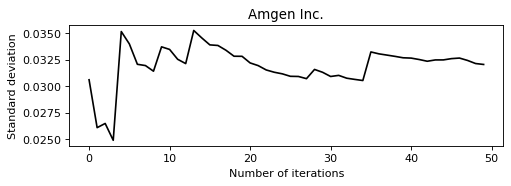

In [32]:
plt.figure(figsize=(7, 2), dpi=80)
plt.plot(predstd, color = 'black')
plt.title('Amgen Inc.')
plt.xlabel('Number of iterations')
plt.ylabel('Standard deviation')
plt.show()

Shaping the predictions

In [33]:
df_res = pd.DataFrame(list(map(np.ravel, predres)))
meanres = df_res.mean(axis=0)
meanres = np.array(meanres)
meanres = np.reshape(meanres, (meanres.shape[0], 1))

meanres20d = meanres[:20]
ym_test20d = ym_test[:20]

df_meanres20d = pd.DataFrame({'predictionsc': meanres20d[:, 0]})
df_ym_test20d = pd.DataFrame({'realsc': ym_test20d[:, 0]})

df_meanres20d['prediction'] = sc2.inverse_transform(df_meanres20d['predictionsc'].values.reshape(-1,1))
df_ym_test20d['real'] = sc2.inverse_transform(df_ym_test20d['realsc'].values.reshape(-1,1))

print(df_meanres20d)
print(df_ym_test20d)

    predictionsc    prediction
0       0.504488 -6.209178e-06
1       0.519125 -7.566844e-07
2       0.495796 -9.447515e-06
3       0.508659 -4.655497e-06
4       0.508192 -4.829380e-06
5       0.501901 -7.173227e-06
6       0.497790 -8.704719e-06
7       0.481487 -1.477812e-05
8       0.510016 -4.149788e-06
9       0.510314 -4.039007e-06
10      0.525352  1.563262e-06
11      0.512117 -3.367424e-06
12      0.476837 -1.651033e-05
13      0.468674 -1.955144e-05
14      0.535670  5.407087e-06
15      0.530218  3.376203e-06
16      0.483327 -1.409267e-05
17      0.498933 -8.278745e-06
18      0.506291 -5.537523e-06
19      0.487689 -1.246782e-05
      realsc      real
0   0.599902  0.000029
1   0.570401  0.000018
2   0.516246 -0.000002
3   0.586375  0.000024
4   0.535891  0.000005
5   0.580186  0.000022
6   0.431340 -0.000033
7   0.532355  0.000004
8   0.493705 -0.000010
9   0.458640 -0.000023
10  0.530763  0.000004
11  0.626834  0.000039
12  0.624975  0.000039
13  0.647796  0.000047
14  

Visualization of the results

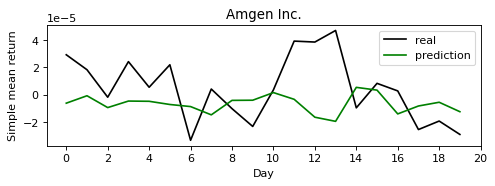

In [34]:
plt.figure(figsize=(7, 2), dpi=80)
plt.plot(df_ym_test20d['real'], color='black', label='real')
plt.plot(df_meanres20d['prediction'], color='green', label='prediction')
plt.xticks(np.arange(0, 20+1, 2.0))
plt.title('Amgen Inc.')
plt.xlabel('Day')
plt.ylabel('Simple mean return')
plt.legend()
plt.show()

Mean squared error of the results

In [35]:
diff_res = np.subtract(df_ym_test20d['real'], df_meanres20d['prediction'])
sq_res = np.square(diff_res)
mseres = sq_res.mean()

print(mseres)

7.747264449654919e-10


In [36]:
diff_res = np.subtract(df_ym_test20d['realsc'], df_meanres20d['predictionsc'])
sq_res = np.square(diff_res)
mseres_sc = sq_res.mean()

print(mseres_sc)

0.005582200623282301


Saving the results and the model

In [37]:
df_meanres20d.to_csv(r'C:\Users\nmart\Documents\Office\ZU\S8\Bachelor-Thesis\Nils_Test_Daten\Nils_Test_Daten\Finales\CNN3_res_AMGN.csv', index = False)

In [38]:
model.save('models/CNN3_AMGN')

INFO:tensorflow:Assets written to: models/CNN3_AMGN\assets
